# MSIN0097 Individual Assignment

## Importing, Split & EDA

### Import

In [104]:
import pandas as pd

In [106]:
# Path to your TSV file
tsv_file = "adult.tsv"

# Path to save the CSV file
csv_file = "adult.csv"

# Read the TSV file
df = pd.read_csv(tsv_file, sep='\t')

# Save the DataFrame to a CSV file
df.to_csv(csv_file, index=False)

print(f"TSV file '{tsv_file}' has been converted to CSV file '{csv_file}'.")

TSV file 'adult.tsv' has been converted to CSV file 'adult.csv'.


In [108]:
# Load the CSV file
df = pd.read_csv("adult.csv")

# Display first few rows
df.head()

age  workclass    fnlwgt  education  education-num  marital-status  \
0  39.0          7   77516.0          9           13.0               4   
1  50.0          6   83311.0          9           13.0               2   
2  38.0          4  215646.0         11            9.0               0   
3  53.0          4  234721.0          1            7.0               2   
4  28.0          4  338409.0          9           13.0               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1        2174.0           0.0   
1           4             0     4    1           0.0           0.0   
2           6             1     4    1           0.0           0.0   
3           6             0     2    1           0.0           0.0   
4          10             5     2    0           0.0           0.0   

   hours-per-week  native-country  target  
0            40.0              39       1  
1            13.0              39       1  
2            40.0              39       1  
3            40.0              39       1  
4            40.0               5       1

In [110]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   workclass       48842 non-null  int64  
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  int64  
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  int64  
 6   occupation      48842 non-null  int64  
 7   relationship    48842 non-null  int64  
 8   race            48842 non-null  int64  
 9   sex             48842 non-null  int64  
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  int64  
 14  target          48842 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 5.6 MB


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

### Split (Stratified)

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'target' is the column you want to stratify by.

# Normal Split (without stratification)
df_train_normal, df_test_normal = train_test_split(df, test_size=0.2, random_state=42)

# Stratified Split (preserving the proportion of 'target' in both train and test sets)
df_train_stratified, df_test_stratified = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])

# Output to check the shapes of the splits
print("Normal Split - Training set shape:", df_train_normal.shape)
print("Normal Split - Test set shape:", df_test_normal.shape)
print("Stratified Split - Training set shape:", df_train_stratified.shape)
print("Stratified Split - Test set shape:", df_test_stratified.shape)

Normal Split - Training set shape: (39073, 15)
Normal Split - Test set shape: (9769, 15)
Stratified Split - Training set shape: (39073, 15)
Stratified Split - Test set shape: (9769, 15)


In [58]:
diff = df_train_normal["target"].value_counts() - df_train_stratified["target"].value_counts()
print(diff)

target
1    17
0   -17
Name: count, dtype: int64


In [60]:
df_train = df_train_stratified
df_test = df_test_stratified
df_train_xg = df_train
df_test_xg = df_test

### EDA

In [63]:
df_train.describe()

age     workclass        fnlwgt     education  education-num  \
count  39073.000000  39073.000000  3.907300e+04  39073.000000   39073.000000   
mean      38.669772      3.870345  1.892195e+05     10.287104      10.076344   
std       13.708968      1.467704  1.055685e+05      3.859112       2.575385   
min       17.000000      0.000000  1.349200e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.173630e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.777920e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.368520e+05     12.000000      12.000000   
max       90.000000      8.000000  1.490400e+06     15.000000      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    39073.000000  39073.000000  39073.000000  39073.000000  39073.000000   
mean         2.614798      6.593530      1.442019      3.665779      0.667648   
std          1.507381      4.240892      1.601188      0.849411      0.471063   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          2.000000      3.000000      0.000000      4.000000      0.000000   
50%          2.000000      7.000000      1.000000      4.000000      1.000000   
75%          4.000000     10.000000      3.000000      4.000000      1.000000   
max          6.000000     14.000000      5.000000      4.000000      1.000000   

       capital-gain  capital-loss  hours-per-week  native-country  \
count  39073.000000  39073.000000    39073.000000    39073.000000   
mean    1078.242802     87.715763       40.432165       36.748368   
std     7456.720951    403.146614       12.437994        7.787034   
min        0.000000      0.000000        1.000000        0.000000   
25%        0.000000      0.000000       40.000000       39.000000   
50%        0.000000      0.000000       40.000000       39.000000   
75%        0.000000      0.000000       45.000000       39.000000   
max    99999.000000   4356.000000       99.000000       41.000000   

             target  
count  39073.000000  
mean       0.760730  
std        0.426643  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

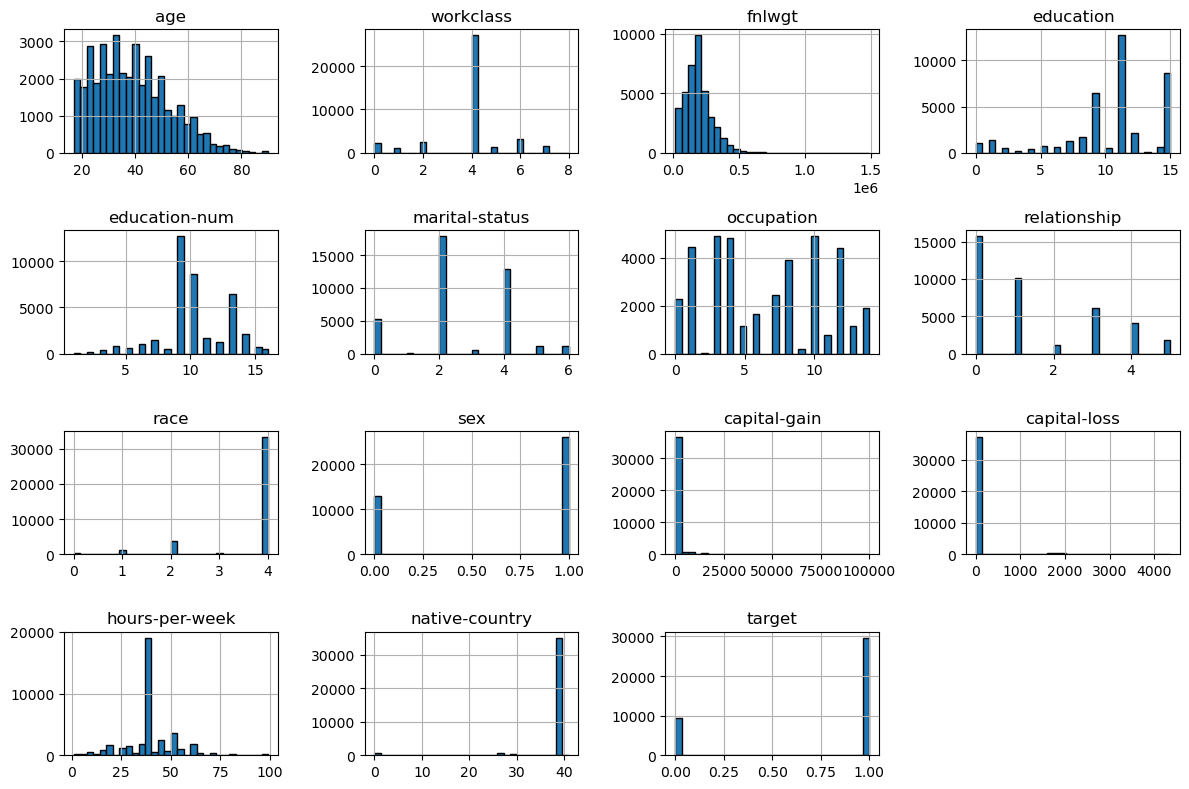

In [65]:
import matplotlib.pyplot as plt

# Select only numerical columns
num_cols = df_train.select_dtypes(include=['number'])

# Plot histograms for all numerical features
num_cols.hist(figsize=(12, 8), bins=30, edgecolor='black')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

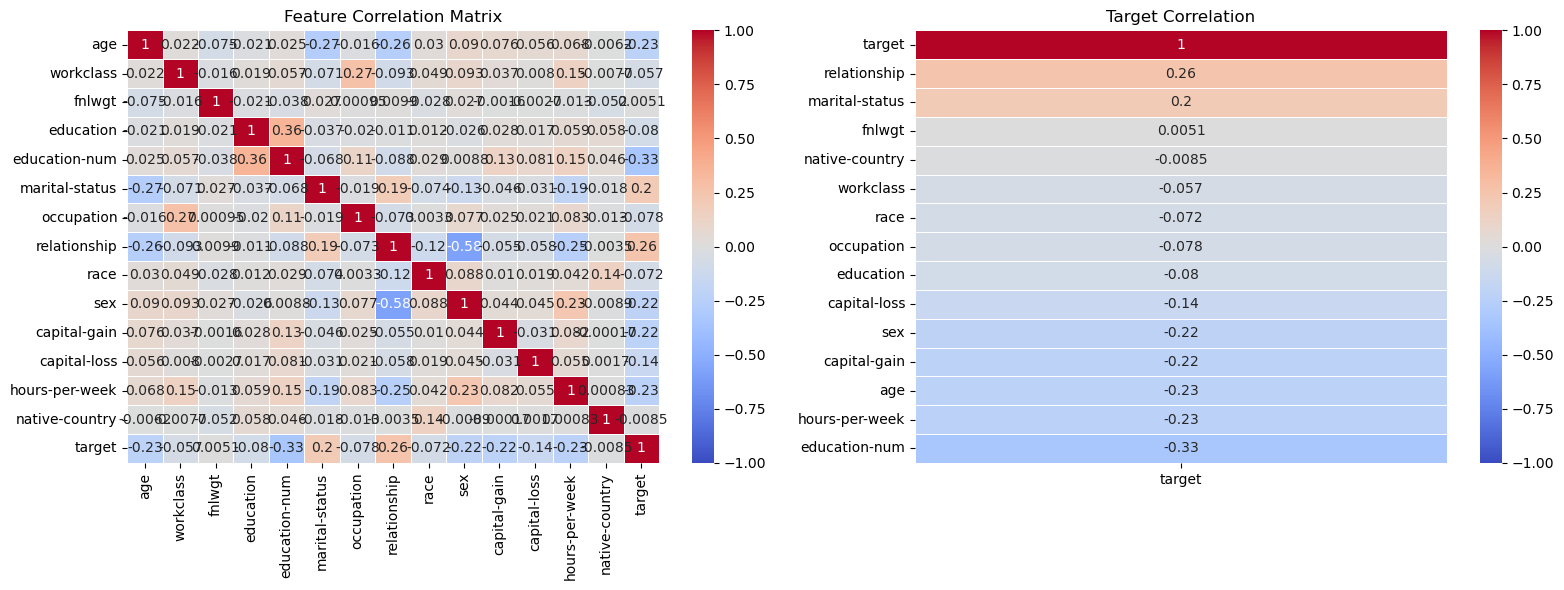

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_train.corr()

# Set up the subplot layout
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Full correlation heatmap
sns.heatmap(correlation_matrix, ax=axes[0], annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
axes[0].set_title("Feature Correlation Matrix")

# Target-variable correlation heatmap
sns.heatmap(correlation_matrix[['target']].sort_values(by='target', ascending=False), 
            ax=axes[1], annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
axes[1].set_title("Target Correlation")

plt.tight_layout()
plt.show()

In [67]:
import numpy as np

def detect_outliers_iqr(df, threshold=1.5):
    outlier_columns = []
    
    for col in df.select_dtypes(include=['float64', 'int64']).columns:  # Only numerical columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        
        if outliers > 0:
            outlier_columns.append(col)
            print(f"Column '{col}' has {outliers} outliers.")

    return outlier_columns

# Get list of columns with outliers
outlier_columns = detect_outliers_iqr(df_train)
print("\nColumns with outliers:", outlier_columns)

Column 'age' has 185 outliers.
Column 'workclass' has 11967 outliers.
Column 'fnlwgt' has 1186 outliers.
Column 'education' has 3647 outliers.
Column 'education-num' has 1446 outliers.
Column 'race' has 5695 outliers.
Column 'capital-gain' has 3198 outliers.
Column 'capital-loss' has 1829 outliers.
Column 'hours-per-week' has 10814 outliers.
Column 'native-country' has 3996 outliers.
Column 'target' has 9349 outliers.

Columns with outliers: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'race', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']


### Feature Engineering

In [70]:
df_train.drop("fnlwgt", inplace=True, axis=1)
df_test.drop("fnlwgt", inplace=True, axis=1)

In [71]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named 'df'
scaler = MinMaxScaler()

# Apply the scaler to the DataFrame
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)

In [74]:
df['target'].value_counts(normalize=True)

target
1    0.760718
0    0.239282
Name: proportion, dtype: float64

### Winsorisation

In [78]:
from scipy.stats.mstats import winsorize

# List of numerical features with outliers
num_features = ['age', 'workclass', 'education', 'education-num', 'race', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']

# Apply Winsorization ONLY on the training set
for col in num_features:
    df_train[col] = winsorize(df_train[col], limits=[0.01, 0.01])  # Caps extreme values

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate features (X) and target variable (y)
X_train = df_train.drop(columns=['target'])
y_train = df_train['target']

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert back to DataFrame for consistency
df_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
df_train_resampled['target'] = y_train_resampled

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(df_train_resampled['target'].value_counts(normalize=True))

## Training Base Models 

### Simple Models

In [84]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train_xg and df_test_xg are already defined
# Splitting into features and target variable
X_train = df_train_xg.drop(columns=['target'])
y_train = df_train_xg['target']
X_test = df_test_xg.drop(columns=['target'])
y_test = df_test_xg['target']

# Define the Logistic Regression classifier
logreg_model = LogisticRegression(
    solver='liblinear',  # Use 'liblinear' solver for binary classification
    max_iter=100
)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8243
F1 Score: 0.8916
Precision: 0.8402
Recall: 0.9497

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.43      0.54      2338
           1       0.84      0.95      0.89      7431

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.71      9769
weighted avg       0.81      0.82      0.81      9769



In [85]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train_xg and df_test_xg are already defined
# Splitting into features and target variable
X_train = df_train_xg.drop(columns=['target'])
y_train = df_train_xg['target']
X_test = df_test_xg.drop(columns=['target'])
y_test = df_test_xg['target']

# Define the Decision Tree classifier
dt_model = DecisionTreeClassifier(
    criterion='gini',  # Use 'gini' for the Gini impurity measure, or 'entropy' for information gain
    max_depth=6,       # Set the maximum depth of the tree (you can adjust this)
    random_state=42    # Set random state for reproducibility
)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8533
F1 Score: 0.9080
Precision: 0.8680
Recall: 0.9520

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.54      0.64      2338
           1       0.87      0.95      0.91      7431

    accuracy                           0.85      9769
   macro avg       0.82      0.75      0.77      9769
weighted avg       0.85      0.85      0.84      9769



In [87]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train_xg and df_test_xg are already defined
# Splitting into features and target variable
X_train = df_train_xg.drop(columns=['target'])
y_train = df_train_xg['target']
X_test = df_test_xg.drop(columns=['target'])
y_test = df_test_xg['target']

# Define the Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    criterion='gini',        # Use Gini impurity (can also use 'entropy')
    max_depth=6,             # Maximum depth of the tree (can adjust)
    random_state=42          # Set random state for reproducibility
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8535
F1 Score: 0.9082
Precision: 0.8677
Recall: 0.9526

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.54      0.64      2338
           1       0.87      0.95      0.91      7431

    accuracy                           0.85      9769
   macro avg       0.82      0.75      0.77      9769
weighted avg       0.85      0.85      0.84      9769



### Training (XGBoost)

In [87]:
import warnings
warnings.filterwarnings('ignore')

Accuracy: 0.8741
F1 Score: 0.9192
Precision: 0.8976
Recall: 0.9420

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.66      0.71      2338
           1       0.90      0.94      0.92      7431

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.87      0.87      9769



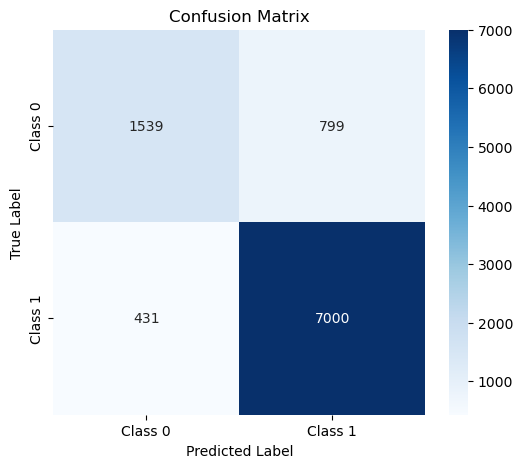

<Figure size 1000x800 with 0 Axes>

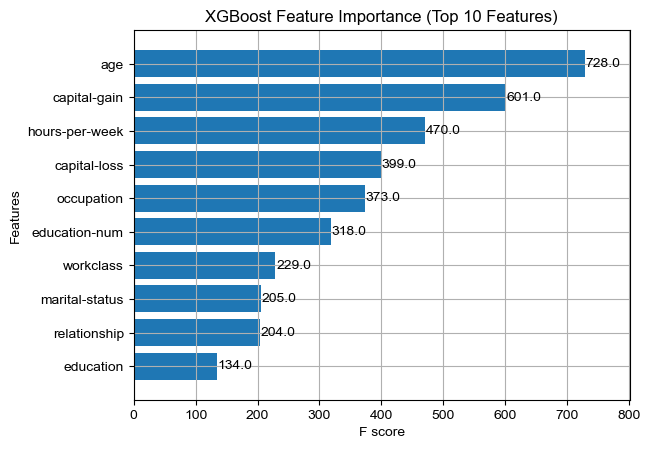

In [89]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train_xg and df_test_xg are already defined
# Splitting into features and target variable
X_train = df_train_xg.drop(columns=['target'])
y_train = df_train_xg['target']
X_test = df_test_xg.drop(columns=['target'])
y_test = df_test_xg['target']

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",  # Change this if it's a multi-class problem
    eval_metric="logloss",
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot feature importance using xgb.plot_importance with Seaborn styling
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_model, 
                    importance_type="weight", 
                    max_num_features=10, 
                    height=0.8, 
                    title="XGBoost Feature Importance (Top 10 Features)")

# Apply Seaborn style for better aesthetics
sns.set(style="whitegrid")  # Set the Seaborn style for the plot

# Display the plot
plt.show()

### Feature Importance

In [268]:
# Above

## Training (Neural Networks)

### With Default Parameters

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - accuracy: 0.8050 - loss: 0.4006 - val_accuracy: 0.8529 - val_loss: 0.3199
Epoch 2/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8504 - loss: 0.3206 - val_accuracy: 0.8551 - val_loss: 0.3161
Epoch 3/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8523 - loss: 0.3163 - val_accuracy: 0.8540 - val_loss: 0.3143
Epoch 4/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8525 - loss: 0.3139 - val_accuracy: 0.8538 - val_loss: 0.3131
Epoch 5/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8535 - loss: 0.3121 - val_accuracy: 0.8543 - val_loss: 0.3127
Epoch 6/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.8543 - loss: 0.3106 - val_accuracy: 0.8540 - val_loss: 0.3122
Epoch 7/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8547 - loss: 0.3094 - val_accuracy: 0.8545 - val_loss: 0.3118
Epoch 8/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.8549 - loss: 0.30

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
Accuracy: 0.8552
F1 Score: 0.9084
Precision: 0.8750
Recall: 0.9446

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.57      0.65      2338
         1.0       0.87      0.94      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769



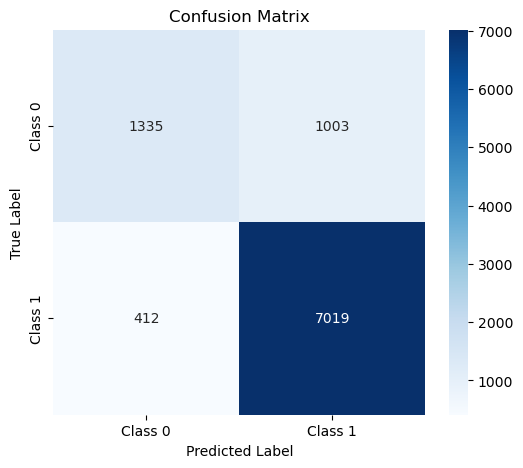

In [113]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Save the model
model.save("neural_network_model.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Choosing Best Epoch

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1143/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.8030 - loss: 0.4039
Epoch 1: val_loss improved from inf to 0.31987, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step - accuracy: 0.8050 - loss: 0.4006 - val_accuracy: 0.8529 - val_loss: 0.3199
Epoch 2/30
1157/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.8505 - loss: 0.3205
Epoch 2: val_loss improved from 0.31987 to 0.31607, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8504 - loss: 0.3206 - val_accuracy: 0.8551 - val_loss: 0.3161
Epoch 3/30
1158/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.8524 - loss: 0.3162
Epoch 3: val_loss improved from 0.31607 to 0.31428, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8523 - loss: 0.3163 - val_accuracy: 0.8540 - val_loss: 0.3143
Epoch 4/30
1161/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.8525 - loss: 0.3138
Epoch 4: val_loss improved from 0.31428 to 0.31309, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8525 - loss: 0.3139 - val_accuracy: 0.8538 - val_loss: 0.3131
Epoch 5/30
1161/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.8535 - loss: 0.3120
Epoch 5: val_loss improved from 0.31309 to 0.31269, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8535 - loss: 0.3121 - val_accuracy: 0.8543 - val_loss: 0.3127
Epoch 6/30
1160/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.8544 - loss: 0.3105
Epoch 6: val_loss improved from 0.31269 to 0.31221, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8543 - loss: 0.3106 - val_accuracy: 0.8540 - val_loss: 0.3122
Epoch 7/30
1159/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.8548 - loss: 0.3093
Epoch 7: val_loss improved from 0.31221 to 0.31183, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8547 - loss: 0.3094 - val_accuracy: 0.8545 - val_loss: 0.3118
Epoch 8/30
1130/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.8550 - loss: 0.3082
Epoch 8: val_loss improved from 0.31183 to 0.31174, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.8549 - loss: 0.3084 - val_accuracy: 0.8543 - val_loss: 0.3117
Epoch 9/30
1132/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.8550 - loss: 0.3073
Epoch 9: val_loss improved from 0.31174 to 0.31160, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.8549 - loss: 0.3075 - val_accuracy: 0.8548 - val_loss: 0.3116
Epoch 10/30
1150/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.8557 - loss: 0.3065
Epoch 10: val_loss did not improve from 0.31160
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.8556 - loss: 0.3066 - val_accuracy: 0.8553 - val_loss: 0.3117
Epoch 11/30
1149/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.8559 - loss: 0.3056
Epoch 11: val_loss improved from 0.31160 to 0.31151, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.8558 - loss: 0.3058 - val_accuracy: 0.8554 - val_loss: 0.3115
Epoch 12/30
1147/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.8562 - loss: 0.3049
Epoch 12: val_loss improved from 0.31151 to 0.31125, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8561 - loss: 0.3050 - val_accuracy: 0.8549 - val_loss: 0.3113
Epoch 13/30
1145/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.8573 - loss: 0.3042
Epoch 13: val_loss improved from 0.31125 to 0.31123, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8572 - loss: 0.3043 - val_accuracy: 0.8554 - val_loss: 0.3112
Epoch 14/30
1148/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.8571 - loss: 0.3034
Epoch 14: val_loss did not improve from 0.31123
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8570 - loss: 0.3035 - val_accuracy: 0.8557 - val_loss: 0.3113
Epoch 15/30
1145/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.8571 - loss: 0.3027
Epoch 15: val_loss improved from 0.31123 to 0.31119, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8570 - loss: 0.3029 - val_accuracy: 0.8561 - val_loss: 0.3112
Epoch 16/30
1138/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.8578 - loss: 0.3020
Epoch 16: val_loss improved from 0.31119 to 0.31106, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.8577 - loss: 0.3022 - val_accuracy: 0.8552 - val_loss: 0.3111
Epoch 17/30
1146/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.8583 - loss: 0.3014
Epoch 17: val_loss improved from 0.31106 to 0.31106, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8582 - loss: 0.3016 - val_accuracy: 0.8556 - val_loss: 0.3111
Epoch 18/30
1143/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.8581 - loss: 0.3009
Epoch 18: val_loss improved from 0.31106 to 0.31103, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8581 - loss: 0.3011 - val_accuracy: 0.8553 - val_loss: 0.3110
Epoch 19/30
1146/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.8580 - loss: 0.3004
Epoch 19: val_loss did not improve from 0.31103
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8579 - loss: 0.3005 - val_accuracy: 0.8552 - val_loss: 0.3111
Epoch 20/30
1145/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.8576 - loss: 0.2998
Epoch 20: val_loss did not improve from 0.31103
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8576 - loss: 0.2999 - val_accuracy: 0.8560 - val_loss: 0.3110
Epoch 21/30
1140/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.8574 - loss: 0.2994
Epoch 21: val_loss did not improve from 0.31103
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8573 - loss: 0.2995 - val_accuracy: 0.8557 - val_loss: 0.3114
Epoch 22/30
1142/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.8582 - loss: 0.2989
Epoch 22

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step
Accuracy: 0.8553
F1 Score: 0.9087
Precision: 0.8738
Recall: 0.9464

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.57      0.65      2338
         1.0       0.87      0.95      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769



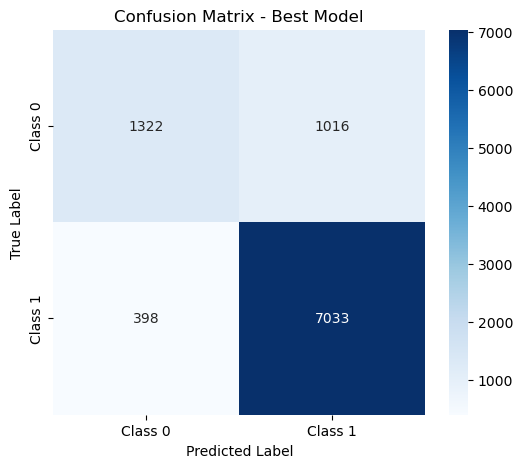

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model")
plt.show()

### Hyperparameter Tuning I

#### Layers - 4

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1138/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.8284 - loss: 0.3718
Epoch 1: val_loss improved from inf to 0.31886, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - accuracy: 0.8291 - loss: 0.3697 - val_accuracy: 0.8514 - val_loss: 0.3189
Epoch 2/30
1190/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.8507 - loss: 0.3197
Epoch 2: val_loss improved from 0.31886 to 0.31563, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.8507 - loss: 0.3197 - val_accuracy: 0.8539 - val_loss: 0.3156
Epoch 3/30
1185/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8520 - loss: 0.3158
Epoch 3: val_loss improved from 0.31563 to 0.31475, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8520 - loss: 0.3159 - val_accuracy: 0.8553 - val_loss: 0.3148
Epoch 4/30
1188/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.8525 - loss: 0.3136
Epoch 4: val_loss improved from 0.31475 to 0.31445, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8525 - loss: 0.3136 - val_accuracy: 0.8549 - val_loss: 0.3145
Epoch 5/30
1182/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.8536 - loss: 0.3118
Epoch 5: val_loss improved from 0.31445 to 0.31386, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8535 - loss: 0.3119 - val_accuracy: 0.8545 - val_loss: 0.3139
Epoch 6/30
1193/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.8541 - loss: 0.3102
Epoch 6: val_loss improved from 0.31386 to 0.31343, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.8541 - loss: 0.3103 - val_accuracy: 0.8560 - val_loss: 0.3134
Epoch 7/30
1189/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8537 - loss: 0.3086
Epoch 7: val_loss improved from 0.31343 to 0.31278, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8537 - loss: 0.3087 - val_accuracy: 0.8565 - val_loss: 0.3128
Epoch 8/30
1185/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8555 - loss: 0.3069
Epoch 8: val_loss did not improve from 0.31278
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8555 - loss: 0.3070 - val_accuracy: 0.8544 - val_loss: 0.3133
Epoch 9/30
1169/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.8557 - loss: 0.3051
Epoch 9: val_loss did not improve from 0.31278
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.8557 - loss: 0.3052 - val_accuracy: 0.8548 - val_loss: 0.3133
Epoch 10/30
1119/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.8569 - loss: 0.3034
Epoch 10: val_loss did not improve from 0.31278
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8568 - loss: 0.3035 - val_accuracy: 0.8549 - val_loss: 0.3134
Epoch 11/30
1178/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8572 - loss: 0.3022
Epoch 11: va

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step
Accuracy: 0.8565
F1 Score: 0.9098
Precision: 0.8718
Recall: 0.9512

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.56      0.65      2338
         1.0       0.87      0.95      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



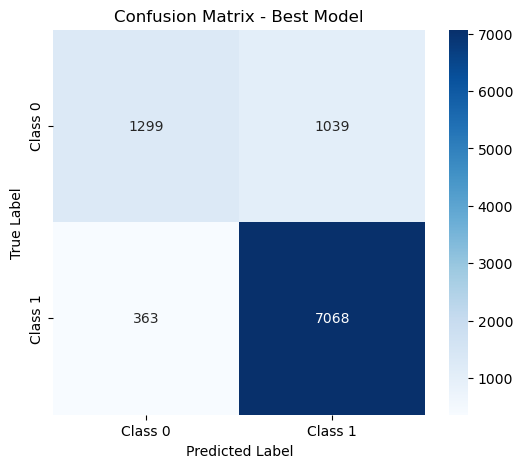

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model")
plt.show()

#### Layers - 5

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1207/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.8316 - loss: 0.3626
Epoch 1: val_loss improved from inf to 0.31839, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - accuracy: 0.8318 - loss: 0.3623 - val_accuracy: 0.8531 - val_loss: 0.3184
Epoch 2/30
1196/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8514 - loss: 0.3201
Epoch 2: val_loss improved from 0.31839 to 0.31598, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.8514 - loss: 0.3201 - val_accuracy: 0.8534 - val_loss: 0.3160
Epoch 3/30
1180/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.8529 - loss: 0.3161
Epoch 3: val_loss improved from 0.31598 to 0.31459, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step - accuracy: 0.8529 - loss: 0.3162 - val_accuracy: 0.8541 - val_loss: 0.3146
Epoch 4/30
1131/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8544 - loss: 0.3134
Epoch 4: val_loss did not improve from 0.31459
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.8543 - loss: 0.3136 - val_accuracy: 0.8543 - val_loss: 0.3147
Epoch 5/30
1175/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.8546 - loss: 0.3112
Epoch 5: val_loss improved from 0.31459 to 0.31423, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - accuracy: 0.8545 - loss: 0.3113 - val_accuracy: 0.8557 - val_loss: 0.3142
Epoch 6/30
1179/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.8560 - loss: 0.3087
Epoch 6: val_loss did not improve from 0.31423
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.8560 - loss: 0.3088 - val_accuracy: 0.8558 - val_loss: 0.3143
Epoch 7/30
1171/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8570 - loss: 0.3064
Epoch 7: val_loss improved from 0.31423 to 0.31313, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.8569 - loss: 0.3065 - val_accuracy: 0.8551 - val_loss: 0.3131
Epoch 8/30
1172/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8581 - loss: 0.3043
Epoch 8: val_loss did not improve from 0.31313
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - accuracy: 0.8580 - loss: 0.3044 - val_accuracy: 0.8529 - val_loss: 0.3141
Epoch 9/30
1173/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8587 - loss: 0.3017
Epoch 9: val_loss did not improve from 0.31313
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - accuracy: 0.8587 - loss: 0.3018 - val_accuracy: 0.8540 - val_loss: 0.3158
Epoch 10/30
1171/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.8600 - loss: 0.2995
Epoch 10: val_loss did not improve from 0.31313
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - accuracy: 0.8599 - loss: 0.2996 - val_accuracy: 0.8534 - val_loss: 0.3163
Epoch 11/30
1169/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.8607 - loss: 0.2970
Epoch 11: va

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
Accuracy: 0.8551
F1 Score: 0.9091
Precision: 0.8693
Recall: 0.9526

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.54      0.64      2338
         1.0       0.87      0.95      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



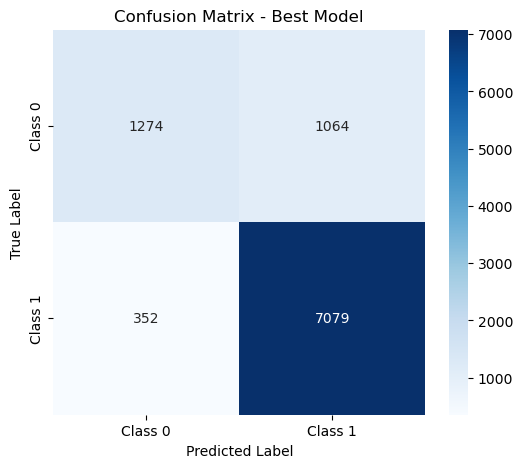

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(248, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(124, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model")
plt.show()

#### Layers - 5 (Optimal)

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1197/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8319 - loss: 0.3634
Epoch 1: val_loss improved from inf to 0.31800, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.8321 - loss: 0.3629 - val_accuracy: 0.8535 - val_loss: 0.3180
Epoch 2/30
1194/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.8505 - loss: 0.3207
Epoch 2: val_loss improved from 0.31800 to 0.31592, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.8504 - loss: 0.3208 - val_accuracy: 0.8548 - val_loss: 0.3159
Epoch 3/30
1190/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.8530 - loss: 0.3164
Epoch 3: val_loss improved from 0.31592 to 0.31433, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.8530 - loss: 0.3165 - val_accuracy: 0.8537 - val_loss: 0.3143
Epoch 4/30
1191/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.8545 - loss: 0.3135
Epoch 4: val_loss improved from 0.31433 to 0.31368, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - accuracy: 0.8544 - loss: 0.3135 - val_accuracy: 0.8548 - val_loss: 0.3137
Epoch 5/30
1172/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8545 - loss: 0.3110
Epoch 5: val_loss improved from 0.31368 to 0.31321, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.8545 - loss: 0.3111 - val_accuracy: 0.8563 - val_loss: 0.3132
Epoch 6/30
1187/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.8555 - loss: 0.3087
Epoch 6: val_loss improved from 0.31321 to 0.31193, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - accuracy: 0.8554 - loss: 0.3088 - val_accuracy: 0.8568 - val_loss: 0.3119
Epoch 7/30
1164/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.8568 - loss: 0.3065
Epoch 7: val_loss did not improve from 0.31193
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - accuracy: 0.8567 - loss: 0.3067 - val_accuracy: 0.8555 - val_loss: 0.3121
Epoch 8/30
1185/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.8578 - loss: 0.3042
Epoch 8: val_loss improved from 0.31193 to 0.31148, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.8578 - loss: 0.3043 - val_accuracy: 0.8562 - val_loss: 0.3115
Epoch 9/30
1173/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.8594 - loss: 0.3020
Epoch 9: val_loss did not improve from 0.31148
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - accuracy: 0.8593 - loss: 0.3021 - val_accuracy: 0.8569 - val_loss: 0.3121
Epoch 10/30
1176/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8599 - loss: 0.2997
Epoch 10: val_loss did not improve from 0.31148
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.8598 - loss: 0.2997 - val_accuracy: 0.8559 - val_loss: 0.3118
Epoch 11/30
1127/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.8612 - loss: 0.2971
Epoch 11: val_loss did not improve from 0.31148
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.8611 - loss: 0.2972 - val_accuracy: 0.8555 - val_loss: 0.3159
Epoch 12/30
1142/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.8628 - loss: 0.2952
Epoch 12: 

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
Accuracy: 0.8562
F1 Score: 0.9100
Precision: 0.8682
Recall: 0.9560

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.54      0.64      2338
         1.0       0.87      0.96      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



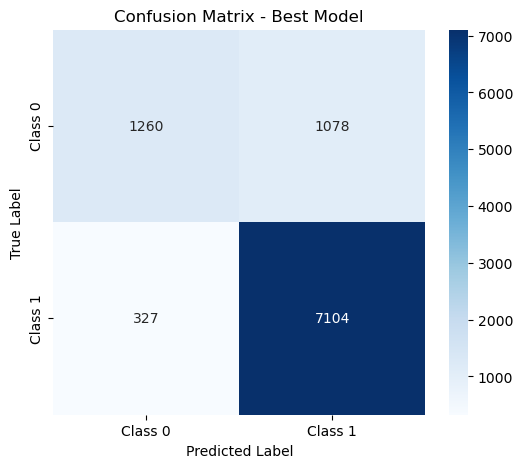

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(248, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(128, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model")
plt.show()

#### Layers - 6

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8350 - loss: 0.3552
Epoch 1: val_loss improved from inf to 0.31936, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8350 - loss: 0.3552 - val_accuracy: 0.8527 - val_loss: 0.3194
Epoch 2/30
1216/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.8515 - loss: 0.3222
Epoch 2: val_loss improved from 0.31936 to 0.31727, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8514 - loss: 0.3222 - val_accuracy: 0.8534 - val_loss: 0.3173
Epoch 3/30
1188/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8524 - loss: 0.3177
Epoch 3: val_loss improved from 0.31727 to 0.31603, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.8524 - loss: 0.3178 - val_accuracy: 0.8544 - val_loss: 0.3160
Epoch 4/30
1192/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.8543 - loss: 0.3152
Epoch 4: val_loss did not improve from 0.31603
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8543 - loss: 0.3153 - val_accuracy: 0.8528 - val_loss: 0.3170
Epoch 5/30
1195/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.8541 - loss: 0.3132
Epoch 5: val_loss did not improve from 0.31603
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.8541 - loss: 0.3132 - val_accuracy: 0.8511 - val_loss: 0.3197
Epoch 6/30
1217/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.8543 - loss: 0.3109
Epoch 6: val_loss did not improve from 0.31603
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.8543 - loss: 0.3109 - val_accuracy: 0.8542 - val_loss: 0.3176
Epoch 7/30
1198/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.8565 - loss: 0.3096
Epoch 7: val_loss

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
Accuracy: 0.8544
F1 Score: 0.9090
Precision: 0.8670
Recall: 0.9552

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.53      0.64      2338
         1.0       0.87      0.96      0.91      7431

    accuracy                           0.85      9769
   macro avg       0.83      0.74      0.77      9769
weighted avg       0.85      0.85      0.84      9769



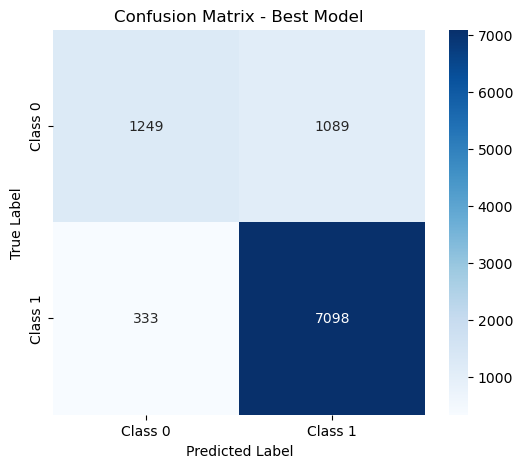

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(256, activation='relu'),  # Hidden layer
    layers.Dense(128, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model")
plt.show()

#### Layers - 7

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1184/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8353 - loss: 0.3573
Epoch 1: val_loss improved from inf to 0.31810, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8355 - loss: 0.3567 - val_accuracy: 0.8551 - val_loss: 0.3181
Epoch 2/30
1192/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.8507 - loss: 0.3224
Epoch 2: val_loss improved from 0.31810 to 0.31615, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.8506 - loss: 0.3224 - val_accuracy: 0.8534 - val_loss: 0.3161
Epoch 3/30
1178/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.8530 - loss: 0.3180
Epoch 3: val_loss did not improve from 0.31615
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - accuracy: 0.8529 - loss: 0.3181 - val_accuracy: 0.8529 - val_loss: 0.3169
Epoch 4/30
1194/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.8538 - loss: 0.3158
Epoch 4: val_loss improved from 0.31615 to 0.31588, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 0.8538 - loss: 0.3159 - val_accuracy: 0.8556 - val_loss: 0.3159
Epoch 5/30
1197/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.8549 - loss: 0.3134
Epoch 5: val_loss improved from 0.31588 to 0.31515, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.8549 - loss: 0.3134 - val_accuracy: 0.8548 - val_loss: 0.3152
Epoch 6/30
1193/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.8541 - loss: 0.3114
Epoch 6: val_loss improved from 0.31515 to 0.31430, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.8541 - loss: 0.3114 - val_accuracy: 0.8537 - val_loss: 0.3143
Epoch 7/30
1198/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8563 - loss: 0.3092
Epoch 7: val_loss did not improve from 0.31430
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8563 - loss: 0.3092 - val_accuracy: 0.8542 - val_loss: 0.3154
Epoch 8/30
1207/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8558 - loss: 0.3071
Epoch 8: val_loss did not improve from 0.31430
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8558 - loss: 0.3072 - val_accuracy: 0.8563 - val_loss: 0.3147
Epoch 9/30
1182/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.8569 - loss: 0.3045
Epoch 9: val_loss did not improve from 0.31430
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 0.8568 - loss: 0.3046 - val_accuracy: 0.8543 - val_loss: 0.3148
Epoch 10/30
1184/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.8583 - loss: 0.3029
Epoch 10: val_loss

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
Accuracy: 0.8537
F1 Score: 0.9088
Precision: 0.8646
Recall: 0.9576

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.52      0.63      2338
         1.0       0.86      0.96      0.91      7431

    accuracy                           0.85      9769
   macro avg       0.83      0.74      0.77      9769
weighted avg       0.85      0.85      0.84      9769



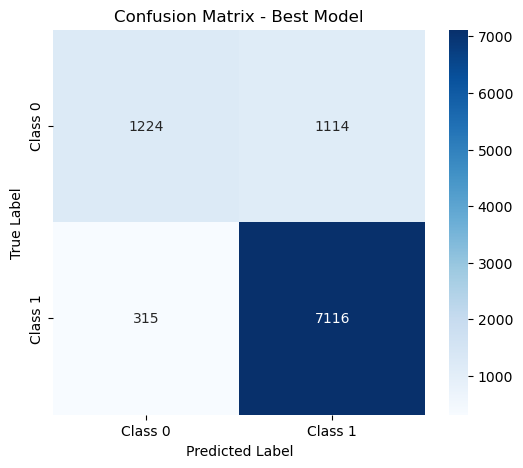

In [125]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(256, activation='relu'),  # Hidden layer
    layers.Dense(128, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(16, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model")
plt.show()

#### Layers - 8

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1221/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8338 - loss: 0.3585
Epoch 1: val_loss improved from inf to 0.32716, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8338 - loss: 0.3584 - val_accuracy: 0.8521 - val_loss: 0.3272
Epoch 2/30
1220/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8504 - loss: 0.3241
Epoch 2: val_loss improved from 0.32716 to 0.31893, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8504 - loss: 0.3241 - val_accuracy: 0.8552 - val_loss: 0.3189
Epoch 3/30
1215/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8540 - loss: 0.3197
Epoch 3: val_loss improved from 0.31893 to 0.31770, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8540 - loss: 0.3198 - val_accuracy: 0.8548 - val_loss: 0.3177
Epoch 4/30
1217/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8533 - loss: 0.3171
Epoch 4: val_loss did not improve from 0.31770
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8533 - loss: 0.3171 - val_accuracy: 0.8538 - val_loss: 0.3206
Epoch 5/30
1213/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8536 - loss: 0.3151
Epoch 5: val_loss improved from 0.31770 to 0.31583, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8536 - loss: 0.3151 - val_accuracy: 0.8572 - val_loss: 0.3158
Epoch 6/30
1215/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8552 - loss: 0.3125
Epoch 6: val_loss improved from 0.31583 to 0.31468, saving model to best_mlp.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8552 - loss: 0.3125 - val_accuracy: 0.8551 - val_loss: 0.3147
Epoch 7/30
1203/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8569 - loss: 0.3099
Epoch 7: val_loss did not improve from 0.31468
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8568 - loss: 0.3100 - val_accuracy: 0.8573 - val_loss: 0.3193
Epoch 8/30
1215/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8571 - loss: 0.3090
Epoch 8: val_loss did not improve from 0.31468
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8571 - loss: 0.3090 - val_accuracy: 0.8576 - val_loss: 0.3165
Epoch 9/30
1206/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8570 - loss: 0.3065
Epoch 9: val_loss did not improve from 0.31468
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8570 - loss: 0.3065 - val_accuracy: 0.8596 - val_loss: 0.3184
Epoch 10/30
1213/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8569 - loss: 0.3053
Epoch 10: val_loss did not imp

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
Accuracy: 0.8551
F1 Score: 0.9089
Precision: 0.8710
Recall: 0.9502

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.55      0.65      2338
         1.0       0.87      0.95      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.82      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



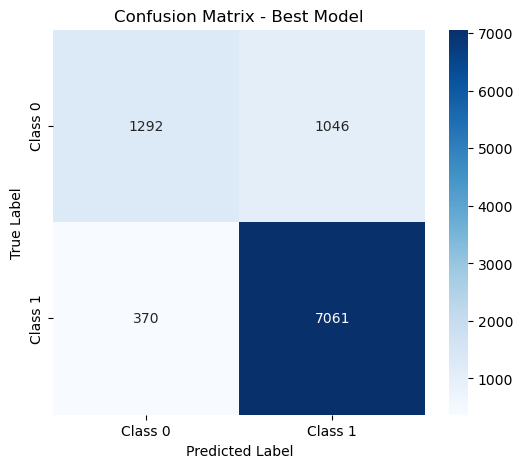

In [127]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(1028, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(512, activation='relu'),  # Hidden layer
    layers.Dense(256, activation='relu'),  # Hidden layer
    layers.Dense(128, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(16, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model")
plt.show()

### Optimisers (Exploring 5)


Training model with SGD optimizer...


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Performance of SGD:
Accuracy: 0.8549
F1 Score: 0.9094
Precision: 0.8661
Recall: 0.9573

Training model with RMSprop optimizer...


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Performance of RMSprop:
Accuracy: 0.8564
F1 Score: 0.9103
Precision: 0.8668
Recall: 0.9586

Training model with Adam optimizer...


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Performance of Adam:
Accuracy: 0.8551
F1 Score: 0.9091
Precision: 0.8693
Recall: 0.9526

Training model with Adamax optimizer...


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Performance of Adamax:
Accuracy: 0.8533
F1 Score: 0.9084
Precision: 0.8653
Recall: 0.9560

Training model with Nadam optimizer...


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step



Performance of Nadam:
Accuracy: 0.8548
F1 Score: 0.9091
Precision: 0.8680
Recall: 0.9542

Optimizer Performance Summary:
         accuracy  f1_score precision    recall             model_file
SGD      0.854949  0.909428  0.866082  0.957341      best_model_SGD.h5
RMSprop  0.856382  0.910346  0.866756  0.958552  best_model_RMSprop.h5
Adam     0.855052  0.909079  0.869336  0.952631     best_model_Adam.h5
Adamax   0.853311  0.908382  0.865286  0.955995   best_model_Adamax.h5
Nadam    0.854847  0.909103  0.868038  0.954246    best_model_Nadam.h5

Best Optimizer: RMSprop
Best Model File: best_model_RMSprop.h5
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step

Final Model Performance:
Optimizer: RMSprop
Accuracy: 0.8564
F1 Score: 0.9103
Precision: 0.8668
Recall: 0.9586

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.53      0.64      2338
         1.0       0.87      0.96      0.91      7431

    accuracy                           0.86  

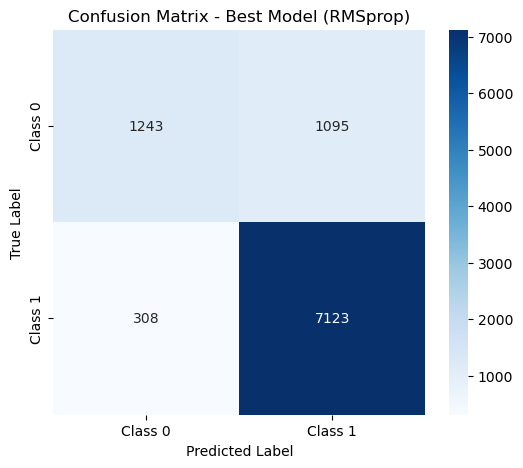

In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define optimizers to test
optimizers = {
    "SGD": keras.optimizers.SGD(learning_rate=0.01),
    "RMSprop": keras.optimizers.RMSprop(learning_rate=0.001),
    "Adam": keras.optimizers.Adam(learning_rate=0.001),
    "Adamax": keras.optimizers.Adamax(learning_rate=0.002),
    "Nadam": keras.optimizers.Nadam(learning_rate=0.002),
}

# Store results
results = {}

for opt_name, optimizer in optimizers.items():
    # Set seed for reproducibility
    SEED = 42
    np.random.seed(SEED)
    random.seed(SEED)
    tf.random.set_seed(SEED)
    
    print(f"\nTraining model with {opt_name} optimizer...")

    # Define Neural Network
    model = keras.Sequential([
        layers.Dense(248, activation='relu', input_shape=(X_train.shape[1],)),  
        layers.Dense(124, activation='relu'),  
        layers.Dense(64, activation='relu'),  
        layers.Dense(32, activation='relu'),  
        layers.Dense(1, activation='sigmoid')  
    ])

    # Compile the model with the optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Define ModelCheckpoint to save the best model
    checkpoint = ModelCheckpoint(f"best_model_{opt_name}.h5", monitor='val_loss', save_best_only=True, verbose=0)

    # Train the model
    history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=0, callbacks=[checkpoint])

    # Load the best model for this optimizer
    model = keras.models.load_model(f"best_model_{opt_name}.h5")

    # Make predictions
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Store results
    results[opt_name] = {
        "accuracy": accuracy, 
        "f1_score": f1, 
        "precision": precision, 
        "recall": recall,
        "model_file": f"best_model_{opt_name}.h5"
    }
    
    # Print individual model metrics
    print(f"\nPerformance of {opt_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
# Display results as a DataFrame
print("\nOptimizer Performance Summary:")
print(results_df)

# Identify the best optimizer based on accuracy
best_optimizer = max(results, key=lambda opt: results[opt]["accuracy"])
best_model_file = results[best_optimizer]["model_file"]

print(f"\nBest Optimizer: {best_optimizer}")
print(f"Best Model File: {best_model_file}")

# Load the best model
best_model = keras.models.load_model(best_model_file)

# Make final predictions
y_pred_prob_best = best_model.predict(X_test)
y_pred_best = (y_pred_prob_best > 0.5).astype(int).flatten()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Print final evaluation metrics
print("\nFinal Model Performance:")
print(f"Optimizer: {best_optimizer}")
print(f"Accuracy: {results[best_optimizer]['accuracy']:.4f}")
print(f"F1 Score: {results[best_optimizer]['f1_score']:.4f}")
print(f"Precision: {results[best_optimizer]['precision']:.4f}")
print(f"Recall: {results[best_optimizer]['recall']:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - Best Model ({best_optimizer})")
plt.show()

#### Best Optimiser

Epoch 1/30
1163/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8358 - loss: 0.3560
Epoch 1: val_loss improved from inf to 0.33047, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - accuracy: 0.8361 - loss: 0.3551 - val_accuracy: 0.8543 - val_loss: 0.3305
Epoch 2/30
1116/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.8499 - loss: 0.3224
Epoch 2: val_loss improved from 0.33047 to 0.32873, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.8498 - loss: 0.3226 - val_accuracy: 0.8553 - val_loss: 0.3287
Epoch 3/30
1094/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8524 - loss: 0.3189
Epoch 3: val_loss improved from 0.32873 to 0.32713, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.8522 - loss: 0.3191 - val_accuracy: 0.8564 - val_loss: 0.3271
Epoch 4/30
1150/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8532 - loss: 0.3171
Epoch 4: val_loss did not improve from 0.32713
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.8531 - loss: 0.3172 - val_accuracy: 0.8566 - val_loss: 0.3308
Epoch 5/30
1139/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8548 - loss: 0.3158
Epoch 5: val_loss did not improve from 0.32713
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.8547 - loss: 0.3160 - val_accuracy: 0.8563 - val_loss: 0.3306
Epoch 6/30
1161/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8553 - loss: 0.3141
Epoch 6: val_loss did not improve from 0.32713
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.8552 - loss: 0.3142 - val_accuracy: 0.8561 - val_loss: 0.3320
Epoch 7/30
1159/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.8557 - loss: 0.3132
Epoch 7: val_lo

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
Accuracy: 0.8564
F1 Score: 0.9103
Precision: 0.8668
Recall: 0.9586

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.53      0.64      2338
         1.0       0.87      0.96      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.77      9769
weighted avg       0.85      0.86      0.85      9769



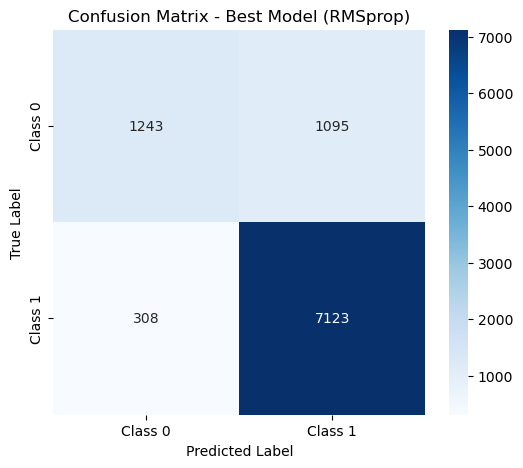

In [242]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(248, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(124, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model with RMSprop optimizer
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),  # RMSprop optimizer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp_rmsprop.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp_rmsprop.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model (RMSprop)")
plt.show()

Epoch 1/30
1154/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.8357 - loss: 0.3562
Epoch 1: val_loss improved from inf to 0.33047, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.8361 - loss: 0.3551 - val_accuracy: 0.8543 - val_loss: 0.3305
Epoch 2/30
1147/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8499 - loss: 0.3225
Epoch 2: val_loss improved from 0.33047 to 0.32873, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.8498 - loss: 0.3226 - val_accuracy: 0.8553 - val_loss: 0.3287
Epoch 3/30
1149/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8523 - loss: 0.3190
Epoch 3: val_loss improved from 0.32873 to 0.32713, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.8522 - loss: 0.3191 - val_accuracy: 0.8564 - val_loss: 0.3271
Epoch 4/30
1146/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8532 - loss: 0.3171
Epoch 4: val_loss did not improve from 0.32713
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.8531 - loss: 0.3172 - val_accuracy: 0.8566 - val_loss: 0.3308
Epoch 5/30
1142/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8548 - loss: 0.3158
Epoch 5: val_loss did not improve from 0.32713
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.8547 - loss: 0.3160 - val_accuracy: 0.8563 - val_loss: 0.3306
Epoch 6/30
1140/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8553 - loss: 0.3140
Epoch 6: val_loss did not improve from 0.32713
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.8552 - loss: 0.3142 - val_accuracy: 0.8561 - val_loss: 0.3320
Epoch 7/30
1140/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8557 - loss: 0.3132
Epoch 7: val_lo

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
Accuracy: 0.8564
F1 Score: 0.9103
Precision: 0.8668
Recall: 0.9586

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.53      0.64      2338
         1.0       0.87      0.96      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.77      9769
weighted avg       0.85      0.86      0.85      9769



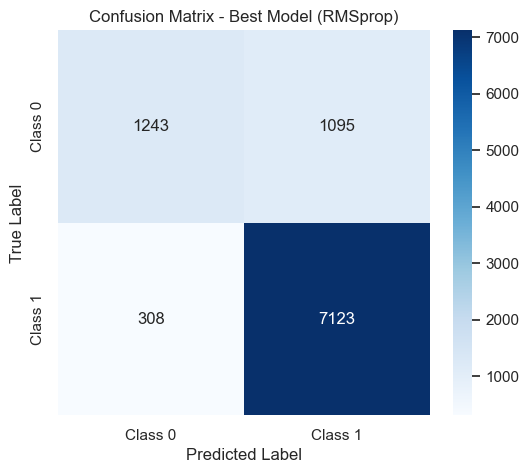

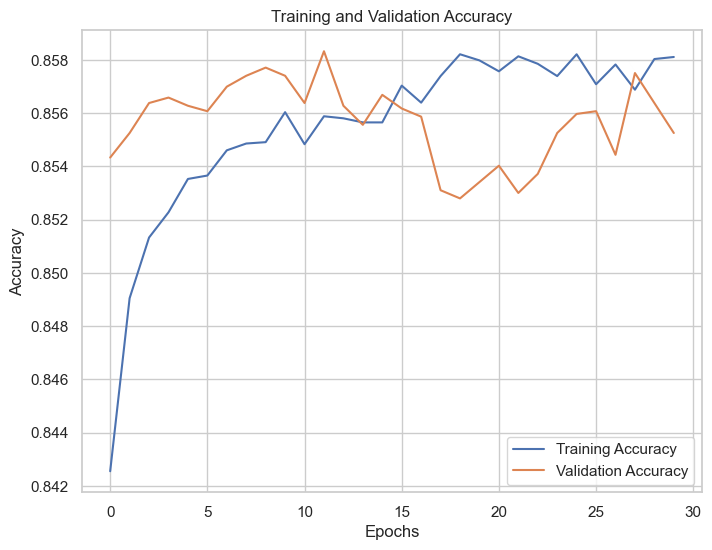

In [101]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(248, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(124, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model with RMSprop optimizer
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),  # RMSprop optimizer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp_rmsprop.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp_rmsprop.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model (RMSprop)")
plt.show()

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

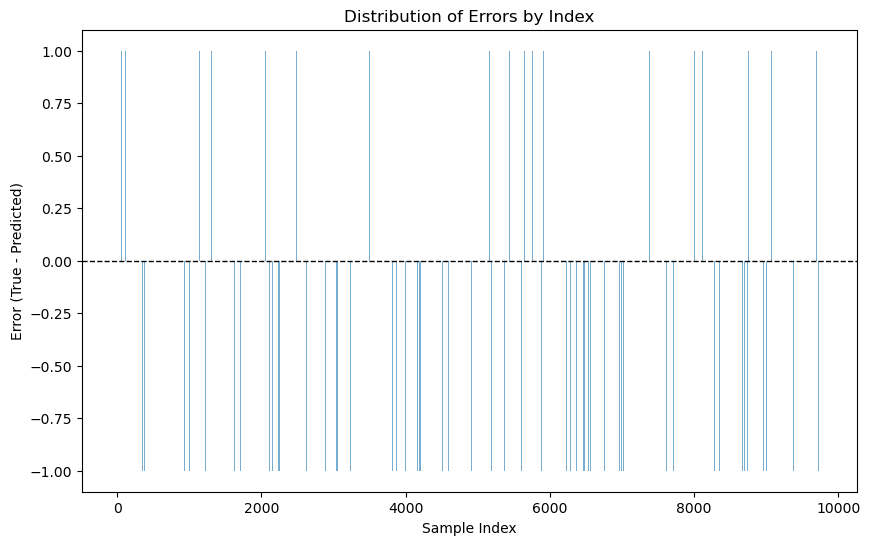

In [88]:
# Calculate the errors (True - Predicted)
errors = y_test - y_pred

# Bar chart to show error distribution by sample index
plt.figure(figsize=(10, 6))
plt.bar(range(len(errors)), errors, alpha=0.6)
plt.title('Distribution of Errors by Index')
plt.xlabel('Sample Index')
plt.ylabel('Error (True - Predicted)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Line at y=0 for reference
plt.show()

### PCA/Important Features

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1178/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8363 - loss: 0.3559
Epoch 1: val_loss improved from inf to 0.32404, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.8365 - loss: 0.3552 - val_accuracy: 0.8542 - val_loss: 0.3240
Epoch 2/30
1186/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8496 - loss: 0.3214
Epoch 2: val_loss improved from 0.32404 to 0.32216, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.8496 - loss: 0.3215 - val_accuracy: 0.8542 - val_loss: 0.3222
Epoch 3/30
1192/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.8513 - loss: 0.3193
Epoch 3: val_loss improved from 0.32216 to 0.32056, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8512 - loss: 0.3193 - val_accuracy: 0.8543 - val_loss: 0.3206
Epoch 4/30
1186/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8505 - loss: 0.3178
Epoch 4: val_loss improved from 0.32056 to 0.32009, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.8505 - loss: 0.3179 - val_accuracy: 0.8537 - val_loss: 0.3201
Epoch 5/30
1191/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.8518 - loss: 0.3166
Epoch 5: val_loss improved from 0.32009 to 0.31935, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8517 - loss: 0.3167 - val_accuracy: 0.8554 - val_loss: 0.3194
Epoch 6/30
1191/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.8524 - loss: 0.3161
Epoch 6: val_loss did not improve from 0.31935
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.8523 - loss: 0.3161 - val_accuracy: 0.8541 - val_loss: 0.3204
Epoch 7/30
1190/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.8533 - loss: 0.3154
Epoch 7: val_loss did not improve from 0.31935
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.8532 - loss: 0.3155 - val_accuracy: 0.8552 - val_loss: 0.3208
Epoch 8/30
1187/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8532 - loss: 0.3150
Epoch 8: val_loss did not improve from 0.31935
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8532 - loss: 0.3150 - val_accuracy: 0.8544 - val_loss: 0.3223
Epoch 9/30
1163/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.8533 - loss: 0.3146
Epoch 9: val_lo

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step
Accuracy: 0.8554
F1 Score: 0.9095
Precision: 0.8681
Recall: 0.9549

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.54      0.64      2338
         1.0       0.87      0.95      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



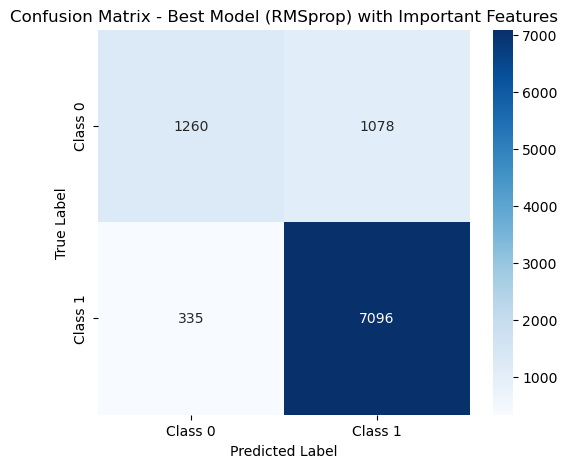

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Define the selected important features
important_features = [
    'relationship', 'education-num', 'marital-status', 'capital-gain', 
    'capital-loss', 'occupation', 'age', 'hours-per-week'
]

# Splitting features and target variable using only important features
X_train = df_train[important_features].values
y_train = df_train['target'].values
X_test = df_test[important_features].values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model with RMSprop optimizer
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp_rmsprop.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp_rmsprop.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model (RMSprop) with Important Features")
plt.show()

## Hyperparameter Tuning II

### 30 Epochs & 32 per Batch

In [109]:
# This is the current model found with 'Best Optimiser'

### 60 Epochs & 16 per Batch

Epoch 1/60


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2408/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8132 - loss: 0.4080
Epoch 1: val_loss improved from inf to 0.32668, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.8135 - loss: 0.4073 - val_accuracy: 0.8494 - val_loss: 0.3267
Epoch 2/60
2330/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.8492 - loss: 0.3246
Epoch 2: val_loss improved from 0.32668 to 0.32248, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.8492 - loss: 0.3247 - val_accuracy: 0.8542 - val_loss: 0.3225
Epoch 3/60
2360/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.8510 - loss: 0.3197
Epoch 3: val_loss improved from 0.32248 to 0.31967, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - accuracy: 0.8509 - loss: 0.3197 - val_accuracy: 0.8560 - val_loss: 0.3197
Epoch 4/60
2396/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8522 - loss: 0.3171
Epoch 4: val_loss improved from 0.31967 to 0.31828, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.8522 - loss: 0.3171 - val_accuracy: 0.8555 - val_loss: 0.3183
Epoch 5/60
2344/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8536 - loss: 0.3153
Epoch 5: val_loss improved from 0.31828 to 0.31765, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.8536 - loss: 0.3154 - val_accuracy: 0.8569 - val_loss: 0.3177
Epoch 6/60
2322/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.8547 - loss: 0.3139
Epoch 6: val_loss improved from 0.31765 to 0.31732, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.8546 - loss: 0.3140 - val_accuracy: 0.8576 - val_loss: 0.3173
Epoch 7/60
2364/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8556 - loss: 0.3129
Epoch 7: val_loss improved from 0.31732 to 0.31673, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 423us/step - accuracy: 0.8556 - loss: 0.3129 - val_accuracy: 0.8579 - val_loss: 0.3167
Epoch 8/60
2343/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8554 - loss: 0.3120
Epoch 8: val_loss improved from 0.31673 to 0.31670, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.8553 - loss: 0.3121 - val_accuracy: 0.8569 - val_loss: 0.3167
Epoch 9/60
2435/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.8560 - loss: 0.3115
Epoch 9: val_loss did not improve from 0.31670
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.8560 - loss: 0.3115 - val_accuracy: 0.8571 - val_loss: 0.3168
Epoch 10/60
2361/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8559 - loss: 0.3107
Epoch 10: val_loss improved from 0.31670 to 0.31658, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - accuracy: 0.8558 - loss: 0.3108 - val_accuracy: 0.8568 - val_loss: 0.3166
Epoch 11/60
2441/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8560 - loss: 0.3101
Epoch 11: val_loss did not improve from 0.31658
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.8560 - loss: 0.3101 - val_accuracy: 0.8573 - val_loss: 0.3166
Epoch 12/60
2370/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8572 - loss: 0.3095
Epoch 12: val_loss did not improve from 0.31658
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.8572 - loss: 0.3096 - val_accuracy: 0.8574 - val_loss: 0.3169
Epoch 13/60
2363/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8565 - loss: 0.3094
Epoch 13: val_loss did not improve from 0.31658
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - accuracy: 0.8564 - loss: 0.3095 - val_accuracy: 0.8568 - val_loss: 0.3174
Epoch 14/60
2369/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.8573 - loss: 0.3092
Epoch 14

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
Accuracy: 0.8568
F1 Score: 0.9102
Precision: 0.8700
Recall: 0.9544

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.55      0.65      2338
         1.0       0.87      0.95      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



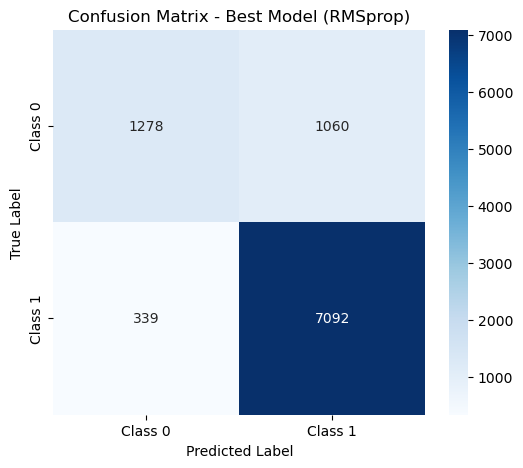

In [102]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(248, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(124, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model with RMSprop optimizer
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),  # RMSprop optimizer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp_rmsprop.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=60, batch_size=16, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp_rmsprop.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model (RMSprop)")
plt.show()

### 60 Epochs & 32 per Batch

Epoch 1/60


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1133/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8024 - loss: 0.4354
Epoch 1: val_loss improved from inf to 0.33085, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 512us/step - accuracy: 0.8042 - loss: 0.4311 - val_accuracy: 0.8474 - val_loss: 0.3308
Epoch 2/60
1152/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.8477 - loss: 0.3270
Epoch 2: val_loss improved from 0.33085 to 0.32293, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.8477 - loss: 0.3270 - val_accuracy: 0.8518 - val_loss: 0.3229
Epoch 3/60
1158/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.8512 - loss: 0.3203
Epoch 3: val_loss improved from 0.32293 to 0.32011, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - accuracy: 0.8511 - loss: 0.3204 - val_accuracy: 0.8536 - val_loss: 0.3201
Epoch 4/60
1109/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8526 - loss: 0.3169
Epoch 4: val_loss improved from 0.32011 to 0.31840, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.8524 - loss: 0.3172 - val_accuracy: 0.8551 - val_loss: 0.3184
Epoch 5/60
1136/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8533 - loss: 0.3147
Epoch 5: val_loss improved from 0.31840 to 0.31691, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.8532 - loss: 0.3149 - val_accuracy: 0.8559 - val_loss: 0.3169
Epoch 6/60
1158/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.8536 - loss: 0.3129
Epoch 6: val_loss improved from 0.31691 to 0.31566, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.8535 - loss: 0.3130 - val_accuracy: 0.8573 - val_loss: 0.3157
Epoch 7/60
1152/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8544 - loss: 0.3114
Epoch 7: val_loss improved from 0.31566 to 0.31487, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.8543 - loss: 0.3115 - val_accuracy: 0.8567 - val_loss: 0.3149
Epoch 8/60
1152/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8550 - loss: 0.3100
Epoch 8: val_loss improved from 0.31487 to 0.31413, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.8550 - loss: 0.3102 - val_accuracy: 0.8570 - val_loss: 0.3141
Epoch 9/60
1146/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8556 - loss: 0.3088
Epoch 9: val_loss improved from 0.31413 to 0.31359, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.8555 - loss: 0.3090 - val_accuracy: 0.8580 - val_loss: 0.3136
Epoch 10/60
1156/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8560 - loss: 0.3078
Epoch 10: val_loss improved from 0.31359 to 0.31321, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.8560 - loss: 0.3080 - val_accuracy: 0.8583 - val_loss: 0.3132
Epoch 11/60
1156/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8563 - loss: 0.3069
Epoch 11: val_loss improved from 0.31321 to 0.31317, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.8562 - loss: 0.3070 - val_accuracy: 0.8578 - val_loss: 0.3132
Epoch 12/60
1121/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8569 - loss: 0.3060
Epoch 12: val_loss did not improve from 0.31317
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.8567 - loss: 0.3062 - val_accuracy: 0.8577 - val_loss: 0.3132
Epoch 13/60
1103/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.8572 - loss: 0.3052
Epoch 13: val_loss did not improve from 0.31317
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - accuracy: 0.8571 - loss: 0.3055 - val_accuracy: 0.8587 - val_loss: 0.3132
Epoch 14/60
1152/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.8576 - loss: 0.3046
Epoch 14: val_loss did not improve from 0.31317
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.8575 - loss: 0.3048 - val_accuracy: 0.8587 - val_loss: 0.3134
Epoch 15/60
1152/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8582 - loss: 0.3040
Epoch 15

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step
Accuracy: 0.8578
F1 Score: 0.9109
Precision: 0.8703
Recall: 0.9555

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.55      0.65      2338
         1.0       0.87      0.96      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



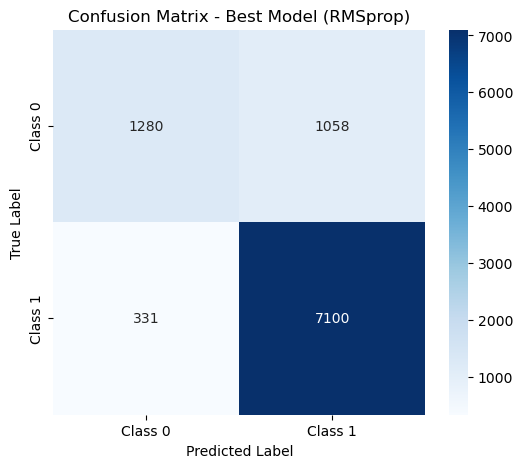

In [120]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(248, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(124, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model with RMSprop optimizer
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),  # RMSprop optimizer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp_rmsprop.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp_rmsprop.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model (RMSprop)")
plt.show()

### Learning Rate - 0.0001

In [124]:
# This is the current model found with 'Best Optimiser'

### Learning Rate - 0.001

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1128/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8356 - loss: 0.3566
Epoch 1: val_loss improved from inf to 0.33047, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.8361 - loss: 0.3551 - val_accuracy: 0.8543 - val_loss: 0.3305
Epoch 2/30
1127/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8499 - loss: 0.3224
Epoch 2: val_loss improved from 0.33047 to 0.32873, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.8498 - loss: 0.3226 - val_accuracy: 0.8553 - val_loss: 0.3287
Epoch 3/30
1120/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.8523 - loss: 0.3189
Epoch 3: val_loss improved from 0.32873 to 0.32713, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.8522 - loss: 0.3191 - val_accuracy: 0.8564 - val_loss: 0.3271
Epoch 4/30
1128/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8532 - loss: 0.3170
Epoch 4: val_loss did not improve from 0.32713
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.8531 - loss: 0.3172 - val_accuracy: 0.8566 - val_loss: 0.3308
Epoch 5/30
1131/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8548 - loss: 0.3158
Epoch 5: val_loss did not improve from 0.32713
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.8547 - loss: 0.3160 - val_accuracy: 0.8563 - val_loss: 0.3306
Epoch 6/30
1107/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.8554 - loss: 0.3139
Epoch 6: val_loss did not improve from 0.32713
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.8552 - loss: 0.3142 - val_accuracy: 0.8561 - val_loss: 0.3320
Epoch 7/30
1131/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8557 - loss: 0.3132
Epoch 7: val_lo

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step
Accuracy: 0.8564
F1 Score: 0.9103
Precision: 0.8668
Recall: 0.9586

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.53      0.64      2338
         1.0       0.87      0.96      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.77      9769
weighted avg       0.85      0.86      0.85      9769



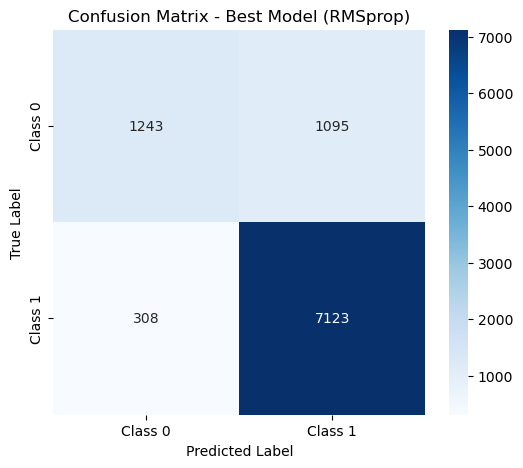

In [126]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(248, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(124, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model with RMSprop optimizer
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),  # RMSprop optimizer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp_rmsprop.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp_rmsprop.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model (RMSprop)")
plt.show()

### Learning Rate - 0.00001

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1220/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.7348 - loss: 0.6058
Epoch 1: val_loss improved from inf to 0.45423, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 0.7349 - loss: 0.6057 - val_accuracy: 0.7797 - val_loss: 0.4542
Epoch 2/30
1202/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.7934 - loss: 0.4324
Epoch 2: val_loss improved from 0.45423 to 0.38533, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.7936 - loss: 0.4321 - val_accuracy: 0.8320 - val_loss: 0.3853
Epoch 3/30
1203/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.8333 - loss: 0.3792
Epoch 3: val_loss improved from 0.38533 to 0.36432, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.8333 - loss: 0.3791 - val_accuracy: 0.8376 - val_loss: 0.3643
Epoch 4/30
1103/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.8379 - loss: 0.3616
Epoch 4: val_loss improved from 0.36432 to 0.35428, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 0.8376 - loss: 0.3616 - val_accuracy: 0.8394 - val_loss: 0.3543
Epoch 5/30
1103/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.8398 - loss: 0.3523
Epoch 5: val_loss improved from 0.35428 to 0.34712, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - accuracy: 0.8394 - loss: 0.3524 - val_accuracy: 0.8415 - val_loss: 0.3471
Epoch 6/30
1219/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8420 - loss: 0.3456
Epoch 6: val_loss improved from 0.34712 to 0.34150, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.8420 - loss: 0.3456 - val_accuracy: 0.8422 - val_loss: 0.3415
Epoch 7/30
1107/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8444 - loss: 0.3400
Epoch 7: val_loss improved from 0.34150 to 0.33694, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.8440 - loss: 0.3402 - val_accuracy: 0.8433 - val_loss: 0.3369
Epoch 8/30
1111/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8457 - loss: 0.3356
Epoch 8: val_loss improved from 0.33694 to 0.33327, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.8454 - loss: 0.3358 - val_accuracy: 0.8452 - val_loss: 0.3333
Epoch 9/30
1218/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8463 - loss: 0.3322
Epoch 9: val_loss improved from 0.33327 to 0.33038, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.8463 - loss: 0.3322 - val_accuracy: 0.8469 - val_loss: 0.3304
Epoch 10/30
1112/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8481 - loss: 0.3291
Epoch 10: val_loss improved from 0.33038 to 0.32810, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.8478 - loss: 0.3294 - val_accuracy: 0.8480 - val_loss: 0.3281
Epoch 11/30
1105/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.8482 - loss: 0.3269
Epoch 11: val_loss improved from 0.32810 to 0.32633, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 487us/step - accuracy: 0.8480 - loss: 0.3271 - val_accuracy: 0.8483 - val_loss: 0.3263
Epoch 12/30
1107/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8484 - loss: 0.3251
Epoch 12: val_loss improved from 0.32633 to 0.32495, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 487us/step - accuracy: 0.8482 - loss: 0.3253 - val_accuracy: 0.8487 - val_loss: 0.3250
Epoch 13/30
1110/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8492 - loss: 0.3237
Epoch 13: val_loss improved from 0.32495 to 0.32387, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.8490 - loss: 0.3239 - val_accuracy: 0.8500 - val_loss: 0.3239
Epoch 14/30
1107/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8495 - loss: 0.3225
Epoch 14: val_loss improved from 0.32387 to 0.32300, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.8493 - loss: 0.3227 - val_accuracy: 0.8509 - val_loss: 0.3230
Epoch 15/30
1108/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8502 - loss: 0.3215
Epoch 15: val_loss improved from 0.32300 to 0.32227, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.8500 - loss: 0.3218 - val_accuracy: 0.8514 - val_loss: 0.3223
Epoch 16/30
1106/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8508 - loss: 0.3207
Epoch 16: val_loss improved from 0.32227 to 0.32167, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 487us/step - accuracy: 0.8505 - loss: 0.3210 - val_accuracy: 0.8528 - val_loss: 0.3217
Epoch 17/30
1216/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.8504 - loss: 0.3202
Epoch 17: val_loss improved from 0.32167 to 0.32113, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - accuracy: 0.8504 - loss: 0.3202 - val_accuracy: 0.8531 - val_loss: 0.3211
Epoch 18/30
1219/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8502 - loss: 0.3196
Epoch 18: val_loss improved from 0.32113 to 0.32066, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.8502 - loss: 0.3196 - val_accuracy: 0.8535 - val_loss: 0.3207
Epoch 19/30
1166/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.8507 - loss: 0.3189
Epoch 19: val_loss improved from 0.32066 to 0.32022, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.8506 - loss: 0.3190 - val_accuracy: 0.8537 - val_loss: 0.3202
Epoch 20/30
1110/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8507 - loss: 0.3182
Epoch 20: val_loss improved from 0.32022 to 0.31982, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.8506 - loss: 0.3185 - val_accuracy: 0.8543 - val_loss: 0.3198
Epoch 21/30
1111/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8511 - loss: 0.3178
Epoch 21: val_loss improved from 0.31982 to 0.31944, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.8510 - loss: 0.3180 - val_accuracy: 0.8541 - val_loss: 0.3194
Epoch 22/30
1109/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8514 - loss: 0.3173
Epoch 22: val_loss improved from 0.31944 to 0.31909, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.8513 - loss: 0.3176 - val_accuracy: 0.8545 - val_loss: 0.3191
Epoch 23/30
1111/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8519 - loss: 0.3169
Epoch 23: val_loss improved from 0.31909 to 0.31876, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.8518 - loss: 0.3171 - val_accuracy: 0.8549 - val_loss: 0.3188
Epoch 24/30
1109/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8519 - loss: 0.3165
Epoch 24: val_loss improved from 0.31876 to 0.31846, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.8518 - loss: 0.3167 - val_accuracy: 0.8545 - val_loss: 0.3185
Epoch 25/30
1111/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8522 - loss: 0.3161
Epoch 25: val_loss improved from 0.31846 to 0.31818, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.8521 - loss: 0.3163 - val_accuracy: 0.8544 - val_loss: 0.3182
Epoch 26/30
1111/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8525 - loss: 0.3157
Epoch 26: val_loss improved from 0.31818 to 0.31790, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.8524 - loss: 0.3160 - val_accuracy: 0.8544 - val_loss: 0.3179
Epoch 27/30
1111/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8526 - loss: 0.3154
Epoch 27: val_loss improved from 0.31790 to 0.31765, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.8524 - loss: 0.3156 - val_accuracy: 0.8546 - val_loss: 0.3177
Epoch 28/30
1110/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8528 - loss: 0.3150
Epoch 28: val_loss improved from 0.31765 to 0.31743, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step - accuracy: 0.8527 - loss: 0.3153 - val_accuracy: 0.8549 - val_loss: 0.3174
Epoch 29/30
1195/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8529 - loss: 0.3149
Epoch 29: val_loss improved from 0.31743 to 0.31719, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.8529 - loss: 0.3150 - val_accuracy: 0.8553 - val_loss: 0.3172
Epoch 30/30
1214/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.8530 - loss: 0.3146
Epoch 30: val_loss improved from 0.31719 to 0.31696, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.8529 - loss: 0.3146 - val_accuracy: 0.8554 - val_loss: 0.3170


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
Accuracy: 0.8554
F1 Score: 0.9079
Precision: 0.8804
Recall: 0.9372

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.66      2338
         1.0       0.88      0.94      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



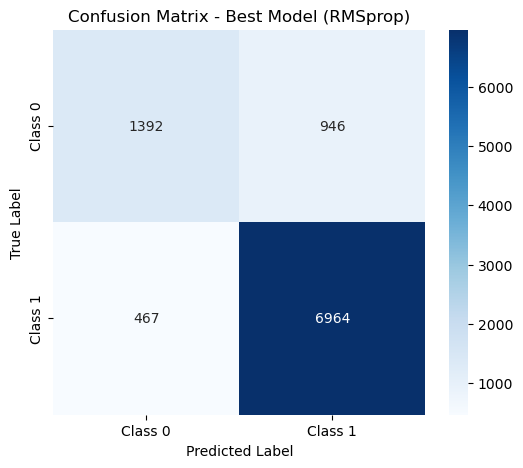

In [128]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(248, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(124, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model with RMSprop optimizer
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.00001),  # RMSprop optimizer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp_rmsprop.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp_rmsprop.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model (RMSprop)")
plt.show()

### For Curiosity (100/32/0.00001)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2388/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.7458 - loss: 0.5717
Epoch 1: val_loss improved from inf to 0.40422, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.7463 - loss: 0.5701 - val_accuracy: 0.8112 - val_loss: 0.4042
Epoch 2/100
2401/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8226 - loss: 0.3901
Epoch 2: val_loss improved from 0.40422 to 0.36432, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.8227 - loss: 0.3899 - val_accuracy: 0.8379 - val_loss: 0.3643
Epoch 3/100
2402/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8380 - loss: 0.3607
Epoch 3: val_loss improved from 0.36432 to 0.35158, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8380 - loss: 0.3607 - val_accuracy: 0.8403 - val_loss: 0.3516
Epoch 4/100
2402/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8407 - loss: 0.3492
Epoch 4: val_loss improved from 0.35158 to 0.34303, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.8406 - loss: 0.3492 - val_accuracy: 0.8423 - val_loss: 0.3430
Epoch 5/100
2403/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8437 - loss: 0.3412
Epoch 5: val_loss improved from 0.34303 to 0.33670, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8436 - loss: 0.3412 - val_accuracy: 0.8437 - val_loss: 0.3367
Epoch 6/100
2405/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8456 - loss: 0.3352
Epoch 6: val_loss improved from 0.33670 to 0.33204, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8456 - loss: 0.3352 - val_accuracy: 0.8459 - val_loss: 0.3320
Epoch 7/100
2404/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8468 - loss: 0.3308
Epoch 7: val_loss improved from 0.33204 to 0.32872, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8467 - loss: 0.3308 - val_accuracy: 0.8474 - val_loss: 0.3287
Epoch 8/100
2402/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8480 - loss: 0.3276
Epoch 8: val_loss improved from 0.32872 to 0.32633, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.8479 - loss: 0.3276 - val_accuracy: 0.8481 - val_loss: 0.3263
Epoch 9/100
2375/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8484 - loss: 0.3252
Epoch 9: val_loss improved from 0.32633 to 0.32462, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.8483 - loss: 0.3253 - val_accuracy: 0.8495 - val_loss: 0.3246
Epoch 10/100
2348/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8495 - loss: 0.3235
Epoch 10: val_loss improved from 0.32462 to 0.32337, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.8494 - loss: 0.3236 - val_accuracy: 0.8504 - val_loss: 0.3234
Epoch 11/100
2402/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8497 - loss: 0.3223
Epoch 11: val_loss improved from 0.32337 to 0.32240, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8497 - loss: 0.3223 - val_accuracy: 0.8514 - val_loss: 0.3224
Epoch 12/100
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.8503 - loss: 0.3213
Epoch 12: val_loss improved from 0.32240 to 0.32164, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - accuracy: 0.8503 - loss: 0.3213 - val_accuracy: 0.8529 - val_loss: 0.3216
Epoch 13/100
2380/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8504 - loss: 0.3203
Epoch 13: val_loss improved from 0.32164 to 0.32103, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8504 - loss: 0.3204 - val_accuracy: 0.8533 - val_loss: 0.3210
Epoch 14/100
2403/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8507 - loss: 0.3196
Epoch 14: val_loss improved from 0.32103 to 0.32048, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8507 - loss: 0.3197 - val_accuracy: 0.8531 - val_loss: 0.3205
Epoch 15/100
2352/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8510 - loss: 0.3189
Epoch 15: val_loss improved from 0.32048 to 0.32003, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.8510 - loss: 0.3190 - val_accuracy: 0.8535 - val_loss: 0.3200
Epoch 16/100
2404/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8510 - loss: 0.3184
Epoch 16: val_loss improved from 0.32003 to 0.31962, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.8510 - loss: 0.3185 - val_accuracy: 0.8538 - val_loss: 0.3196
Epoch 17/100
2353/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8517 - loss: 0.3178
Epoch 17: val_loss improved from 0.31962 to 0.31924, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.8516 - loss: 0.3179 - val_accuracy: 0.8538 - val_loss: 0.3192
Epoch 18/100
2389/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8521 - loss: 0.3174
Epoch 18: val_loss improved from 0.31924 to 0.31889, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8520 - loss: 0.3174 - val_accuracy: 0.8539 - val_loss: 0.3189
Epoch 19/100
2368/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8521 - loss: 0.3169
Epoch 19: val_loss improved from 0.31889 to 0.31857, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.8521 - loss: 0.3169 - val_accuracy: 0.8538 - val_loss: 0.3186
Epoch 20/100
2391/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8523 - loss: 0.3165
Epoch 20: val_loss improved from 0.31857 to 0.31829, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.8523 - loss: 0.3165 - val_accuracy: 0.8540 - val_loss: 0.3183
Epoch 21/100
2373/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8529 - loss: 0.3160
Epoch 21: val_loss improved from 0.31829 to 0.31806, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8529 - loss: 0.3161 - val_accuracy: 0.8545 - val_loss: 0.3181
Epoch 22/100
2376/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8532 - loss: 0.3156
Epoch 22: val_loss improved from 0.31806 to 0.31783, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8531 - loss: 0.3157 - val_accuracy: 0.8542 - val_loss: 0.3178
Epoch 23/100
2349/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8535 - loss: 0.3152
Epoch 23: val_loss improved from 0.31783 to 0.31762, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.8534 - loss: 0.3153 - val_accuracy: 0.8542 - val_loss: 0.3176
Epoch 24/100
2379/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8537 - loss: 0.3149
Epoch 24: val_loss improved from 0.31762 to 0.31742, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8536 - loss: 0.3150 - val_accuracy: 0.8544 - val_loss: 0.3174
Epoch 25/100
2356/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8539 - loss: 0.3145
Epoch 25: val_loss improved from 0.31742 to 0.31720, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.8538 - loss: 0.3146 - val_accuracy: 0.8548 - val_loss: 0.3172
Epoch 26/100
2373/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8542 - loss: 0.3142
Epoch 26: val_loss improved from 0.31720 to 0.31698, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8541 - loss: 0.3143 - val_accuracy: 0.8553 - val_loss: 0.3170
Epoch 27/100
2398/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8543 - loss: 0.3139
Epoch 27: val_loss improved from 0.31698 to 0.31676, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.8543 - loss: 0.3140 - val_accuracy: 0.8554 - val_loss: 0.3168
Epoch 28/100
2408/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8546 - loss: 0.3136
Epoch 28: val_loss improved from 0.31676 to 0.31657, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.8546 - loss: 0.3137 - val_accuracy: 0.8558 - val_loss: 0.3166
Epoch 29/100
2345/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8546 - loss: 0.3133
Epoch 29: val_loss improved from 0.31657 to 0.31638, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.8545 - loss: 0.3134 - val_accuracy: 0.8554 - val_loss: 0.3164
Epoch 30/100
2346/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8545 - loss: 0.3130
Epoch 30: val_loss improved from 0.31638 to 0.31620, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.8544 - loss: 0.3131 - val_accuracy: 0.8556 - val_loss: 0.3162
Epoch 31/100
2395/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8545 - loss: 0.3128
Epoch 31: val_loss improved from 0.31620 to 0.31603, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.8545 - loss: 0.3128 - val_accuracy: 0.8549 - val_loss: 0.3160
Epoch 32/100
2399/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8548 - loss: 0.3125
Epoch 32: val_loss improved from 0.31603 to 0.31585, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.8548 - loss: 0.3126 - val_accuracy: 0.8552 - val_loss: 0.3158
Epoch 33/100
2393/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8547 - loss: 0.3122
Epoch 33: val_loss improved from 0.31585 to 0.31568, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.8547 - loss: 0.3123 - val_accuracy: 0.8552 - val_loss: 0.3157
Epoch 34/100
2322/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.8549 - loss: 0.3119
Epoch 34: val_loss improved from 0.31568 to 0.31552, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - accuracy: 0.8547 - loss: 0.3120 - val_accuracy: 0.8553 - val_loss: 0.3155
Epoch 35/100
2403/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8548 - loss: 0.3118
Epoch 35: val_loss improved from 0.31552 to 0.31536, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.8548 - loss: 0.3118 - val_accuracy: 0.8562 - val_loss: 0.3154
Epoch 36/100
2398/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8548 - loss: 0.3115
Epoch 36: val_loss improved from 0.31536 to 0.31520, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.8548 - loss: 0.3116 - val_accuracy: 0.8560 - val_loss: 0.3152
Epoch 37/100
2356/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8552 - loss: 0.3112
Epoch 37: val_loss improved from 0.31520 to 0.31507, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.8551 - loss: 0.3113 - val_accuracy: 0.8561 - val_loss: 0.3151
Epoch 38/100
2378/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8551 - loss: 0.3110
Epoch 38: val_loss improved from 0.31507 to 0.31496, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.8550 - loss: 0.3111 - val_accuracy: 0.8560 - val_loss: 0.3150
Epoch 39/100
2414/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8550 - loss: 0.3109
Epoch 39: val_loss improved from 0.31496 to 0.31485, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.8550 - loss: 0.3109 - val_accuracy: 0.8562 - val_loss: 0.3149
Epoch 40/100
2400/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8550 - loss: 0.3107
Epoch 40: val_loss improved from 0.31485 to 0.31475, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.8549 - loss: 0.3107 - val_accuracy: 0.8564 - val_loss: 0.3148
Epoch 41/100
2410/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8550 - loss: 0.3105
Epoch 41: val_loss improved from 0.31475 to 0.31465, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8549 - loss: 0.3105 - val_accuracy: 0.8571 - val_loss: 0.3147
Epoch 42/100
2407/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8551 - loss: 0.3103
Epoch 42: val_loss improved from 0.31465 to 0.31455, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8551 - loss: 0.3103 - val_accuracy: 0.8571 - val_loss: 0.3145
Epoch 43/100
2398/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8552 - loss: 0.3101
Epoch 43: val_loss improved from 0.31455 to 0.31443, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.8552 - loss: 0.3102 - val_accuracy: 0.8572 - val_loss: 0.3144
Epoch 44/100
2367/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8555 - loss: 0.3099
Epoch 44: val_loss improved from 0.31443 to 0.31433, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.8554 - loss: 0.3100 - val_accuracy: 0.8574 - val_loss: 0.3143
Epoch 45/100
2393/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8554 - loss: 0.3098
Epoch 45: val_loss improved from 0.31433 to 0.31425, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.8554 - loss: 0.3098 - val_accuracy: 0.8577 - val_loss: 0.3142
Epoch 46/100
2372/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8553 - loss: 0.3096
Epoch 46: val_loss improved from 0.31425 to 0.31416, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.8553 - loss: 0.3097 - val_accuracy: 0.8578 - val_loss: 0.3142
Epoch 47/100
2429/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.8553 - loss: 0.3095
Epoch 47: val_loss improved from 0.31416 to 0.31409, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.8553 - loss: 0.3095 - val_accuracy: 0.8577 - val_loss: 0.3141
Epoch 48/100
2327/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.8553 - loss: 0.3092
Epoch 48: val_loss improved from 0.31409 to 0.31404, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - accuracy: 0.8552 - loss: 0.3094 - val_accuracy: 0.8576 - val_loss: 0.3140
Epoch 49/100
2319/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.8554 - loss: 0.3091
Epoch 49: val_loss improved from 0.31404 to 0.31397, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.8554 - loss: 0.3092 - val_accuracy: 0.8573 - val_loss: 0.3140
Epoch 50/100
2373/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8555 - loss: 0.3090
Epoch 50: val_loss improved from 0.31397 to 0.31394, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.8555 - loss: 0.3091 - val_accuracy: 0.8573 - val_loss: 0.3139
Epoch 51/100
2349/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8555 - loss: 0.3088
Epoch 51: val_loss improved from 0.31394 to 0.31390, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.8555 - loss: 0.3089 - val_accuracy: 0.8570 - val_loss: 0.3139
Epoch 52/100
2406/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.8557 - loss: 0.3087
Epoch 52: val_loss improved from 0.31390 to 0.31385, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - accuracy: 0.8557 - loss: 0.3088 - val_accuracy: 0.8571 - val_loss: 0.3139
Epoch 53/100
2335/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.8562 - loss: 0.3085
Epoch 53: val_loss improved from 0.31385 to 0.31381, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - accuracy: 0.8562 - loss: 0.3086 - val_accuracy: 0.8568 - val_loss: 0.3138
Epoch 54/100
2375/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8560 - loss: 0.3084
Epoch 54: val_loss improved from 0.31381 to 0.31376, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - accuracy: 0.8560 - loss: 0.3085 - val_accuracy: 0.8571 - val_loss: 0.3138
Epoch 55/100
2358/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.8561 - loss: 0.3083
Epoch 55: val_loss improved from 0.31376 to 0.31374, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.8561 - loss: 0.3084 - val_accuracy: 0.8571 - val_loss: 0.3137
Epoch 56/100
2317/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.8564 - loss: 0.3081
Epoch 56: val_loss improved from 0.31374 to 0.31370, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - accuracy: 0.8563 - loss: 0.3083 - val_accuracy: 0.8575 - val_loss: 0.3137
Epoch 57/100
2362/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8565 - loss: 0.3080
Epoch 57: val_loss improved from 0.31370 to 0.31368, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.8565 - loss: 0.3081 - val_accuracy: 0.8575 - val_loss: 0.3137
Epoch 58/100
2311/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8567 - loss: 0.3079
Epoch 58: val_loss improved from 0.31368 to 0.31368, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.8567 - loss: 0.3080 - val_accuracy: 0.8578 - val_loss: 0.3137
Epoch 59/100
2358/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.8565 - loss: 0.3078
Epoch 59: val_loss improved from 0.31368 to 0.31368, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.8564 - loss: 0.3079 - val_accuracy: 0.8580 - val_loss: 0.3137
Epoch 60/100
2393/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8565 - loss: 0.3078
Epoch 60: val_loss improved from 0.31368 to 0.31365, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.8565 - loss: 0.3078 - val_accuracy: 0.8583 - val_loss: 0.3136
Epoch 61/100
2353/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.8564 - loss: 0.3076
Epoch 61: val_loss improved from 0.31365 to 0.31360, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.8563 - loss: 0.3077 - val_accuracy: 0.8587 - val_loss: 0.3136
Epoch 62/100
2422/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8567 - loss: 0.3076
Epoch 62: val_loss improved from 0.31360 to 0.31357, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.8567 - loss: 0.3076 - val_accuracy: 0.8587 - val_loss: 0.3136
Epoch 63/100
2395/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8571 - loss: 0.3074
Epoch 63: val_loss improved from 0.31357 to 0.31354, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.8571 - loss: 0.3075 - val_accuracy: 0.8590 - val_loss: 0.3135
Epoch 64/100
2403/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8572 - loss: 0.3073
Epoch 64: val_loss improved from 0.31354 to 0.31350, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.8572 - loss: 0.3074 - val_accuracy: 0.8591 - val_loss: 0.3135
Epoch 65/100
2394/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8570 - loss: 0.3072
Epoch 65: val_loss improved from 0.31350 to 0.31348, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.8570 - loss: 0.3072 - val_accuracy: 0.8594 - val_loss: 0.3135
Epoch 66/100
2409/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8570 - loss: 0.3071
Epoch 66: val_loss improved from 0.31348 to 0.31344, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8569 - loss: 0.3071 - val_accuracy: 0.8595 - val_loss: 0.3134
Epoch 67/100
2403/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8570 - loss: 0.3070
Epoch 67: val_loss improved from 0.31344 to 0.31340, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8570 - loss: 0.3070 - val_accuracy: 0.8598 - val_loss: 0.3134
Epoch 68/100
2402/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8573 - loss: 0.3069
Epoch 68: val_loss improved from 0.31340 to 0.31338, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.8573 - loss: 0.3069 - val_accuracy: 0.8597 - val_loss: 0.3134
Epoch 69/100
2405/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8574 - loss: 0.3068
Epoch 69: val_loss improved from 0.31338 to 0.31338, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8574 - loss: 0.3069 - val_accuracy: 0.8599 - val_loss: 0.3134
Epoch 70/100
2354/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8573 - loss: 0.3067
Epoch 70: val_loss improved from 0.31338 to 0.31335, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.8573 - loss: 0.3068 - val_accuracy: 0.8599 - val_loss: 0.3134
Epoch 71/100
2386/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8573 - loss: 0.3066
Epoch 71: val_loss improved from 0.31335 to 0.31335, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.8573 - loss: 0.3067 - val_accuracy: 0.8600 - val_loss: 0.3133
Epoch 72/100
2351/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8577 - loss: 0.3065
Epoch 72: val_loss improved from 0.31335 to 0.31333, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.8576 - loss: 0.3066 - val_accuracy: 0.8600 - val_loss: 0.3133
Epoch 73/100
2403/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8575 - loss: 0.3065
Epoch 73: val_loss did not improve from 0.31333
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.8575 - loss: 0.3065 - val_accuracy: 0.8602 - val_loss: 0.3133
Epoch 74/100
2405/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8577 - loss: 0.3064
Epoch 74: val_loss did not improve from 0.31333
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.8577 - loss: 0.3064 - val_accuracy: 0.8600 - val_loss: 0.3133
Epoch 75/100
2408/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8576 - loss: 0.3063
Epoch 75: val_loss did not improve from 0.31333
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.8576 - loss: 0.3063 - val_accuracy: 0.8598 - val_loss: 0.3134
Epoch 76/100
2364/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8578 - loss: 0.3062
Epoc

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
Accuracy: 0.8600
F1 Score: 0.9112
Precision: 0.8798
Recall: 0.9450

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.59      0.67      2338
         1.0       0.88      0.94      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



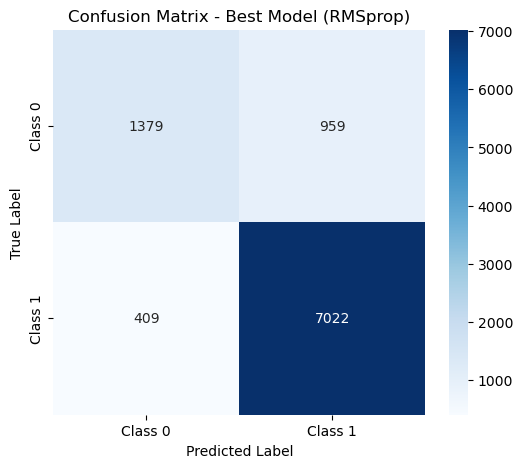

In [74]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(248, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(124, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model with RMSprop optimizer
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.00001),  # RMSprop optimizer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp_rmsprop.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp_rmsprop.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model (RMSprop)")
plt.show()

Epoch 1/200


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1168/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.7339 - loss: 0.6084
Epoch 1: val_loss improved from inf to 0.45423, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - accuracy: 0.7349 - loss: 0.6057 - val_accuracy: 0.7797 - val_loss: 0.4542
Epoch 2/200
1166/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.7931 - loss: 0.4329
Epoch 2: val_loss improved from 0.45423 to 0.38533, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.7936 - loss: 0.4321 - val_accuracy: 0.8320 - val_loss: 0.3853
Epoch 3/200
1161/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8334 - loss: 0.3793
Epoch 3: val_loss improved from 0.38533 to 0.36432, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.8333 - loss: 0.3791 - val_accuracy: 0.8376 - val_loss: 0.3643
Epoch 4/200
1161/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8377 - loss: 0.3616
Epoch 4: val_loss improved from 0.36432 to 0.35428, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.8376 - loss: 0.3616 - val_accuracy: 0.8394 - val_loss: 0.3543
Epoch 5/200
1150/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8396 - loss: 0.3523
Epoch 5: val_loss improved from 0.35428 to 0.34712, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.8394 - loss: 0.3524 - val_accuracy: 0.8415 - val_loss: 0.3471
Epoch 6/200
1220/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8420 - loss: 0.3456
Epoch 6: val_loss improved from 0.34712 to 0.34150, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - accuracy: 0.8420 - loss: 0.3456 - val_accuracy: 0.8422 - val_loss: 0.3415
Epoch 7/200
1162/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8442 - loss: 0.3401
Epoch 7: val_loss improved from 0.34150 to 0.33694, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.8440 - loss: 0.3402 - val_accuracy: 0.8433 - val_loss: 0.3369
Epoch 8/200
1164/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.8455 - loss: 0.3357
Epoch 8: val_loss improved from 0.33694 to 0.33327, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.8454 - loss: 0.3358 - val_accuracy: 0.8452 - val_loss: 0.3333
Epoch 9/200
1162/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8464 - loss: 0.3321
Epoch 9: val_loss improved from 0.33327 to 0.33038, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.8463 - loss: 0.3322 - val_accuracy: 0.8469 - val_loss: 0.3304
Epoch 10/200
1155/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.8480 - loss: 0.3292
Epoch 10: val_loss improved from 0.33038 to 0.32810, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.8478 - loss: 0.3294 - val_accuracy: 0.8480 - val_loss: 0.3281
Epoch 11/200
1154/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8481 - loss: 0.3270
Epoch 11: val_loss improved from 0.32810 to 0.32633, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.8480 - loss: 0.3271 - val_accuracy: 0.8483 - val_loss: 0.3263
Epoch 12/200
1153/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8483 - loss: 0.3252
Epoch 12: val_loss improved from 0.32633 to 0.32495, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.8482 - loss: 0.3253 - val_accuracy: 0.8487 - val_loss: 0.3250
Epoch 13/200
1144/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8491 - loss: 0.3237
Epoch 13: val_loss improved from 0.32495 to 0.32387, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.8490 - loss: 0.3239 - val_accuracy: 0.8500 - val_loss: 0.3239
Epoch 14/200
1147/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8495 - loss: 0.3226
Epoch 14: val_loss improved from 0.32387 to 0.32300, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.8493 - loss: 0.3227 - val_accuracy: 0.8509 - val_loss: 0.3230
Epoch 15/200
1149/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8501 - loss: 0.3216
Epoch 15: val_loss improved from 0.32300 to 0.32227, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - accuracy: 0.8500 - loss: 0.3218 - val_accuracy: 0.8514 - val_loss: 0.3223
Epoch 16/200
1144/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8507 - loss: 0.3208
Epoch 16: val_loss improved from 0.32227 to 0.32167, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.8505 - loss: 0.3210 - val_accuracy: 0.8528 - val_loss: 0.3217
Epoch 17/200
1146/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8505 - loss: 0.3201
Epoch 17: val_loss improved from 0.32167 to 0.32113, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.8504 - loss: 0.3202 - val_accuracy: 0.8531 - val_loss: 0.3211
Epoch 18/200
1138/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8503 - loss: 0.3194
Epoch 18: val_loss improved from 0.32113 to 0.32066, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.8502 - loss: 0.3196 - val_accuracy: 0.8535 - val_loss: 0.3207
Epoch 19/200
1144/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8507 - loss: 0.3188
Epoch 19: val_loss improved from 0.32066 to 0.32022, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.8506 - loss: 0.3190 - val_accuracy: 0.8537 - val_loss: 0.3202
Epoch 20/200
1145/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8507 - loss: 0.3183
Epoch 20: val_loss improved from 0.32022 to 0.31982, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.8506 - loss: 0.3185 - val_accuracy: 0.8543 - val_loss: 0.3198
Epoch 21/200
1139/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8511 - loss: 0.3178
Epoch 21: val_loss improved from 0.31982 to 0.31944, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.8510 - loss: 0.3180 - val_accuracy: 0.8541 - val_loss: 0.3194
Epoch 22/200
1142/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8514 - loss: 0.3174
Epoch 22: val_loss improved from 0.31944 to 0.31909, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.8513 - loss: 0.3176 - val_accuracy: 0.8545 - val_loss: 0.3191
Epoch 23/200
1141/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8518 - loss: 0.3170
Epoch 23: val_loss improved from 0.31909 to 0.31876, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.8518 - loss: 0.3171 - val_accuracy: 0.8549 - val_loss: 0.3188
Epoch 24/200
1139/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8519 - loss: 0.3165
Epoch 24: val_loss improved from 0.31876 to 0.31846, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.8518 - loss: 0.3167 - val_accuracy: 0.8545 - val_loss: 0.3185
Epoch 25/200
1139/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8522 - loss: 0.3162
Epoch 25: val_loss improved from 0.31846 to 0.31818, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.8521 - loss: 0.3163 - val_accuracy: 0.8544 - val_loss: 0.3182
Epoch 26/200
1135/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8525 - loss: 0.3158
Epoch 26: val_loss improved from 0.31818 to 0.31790, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.8524 - loss: 0.3160 - val_accuracy: 0.8544 - val_loss: 0.3179
Epoch 27/200
1134/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8525 - loss: 0.3154
Epoch 27: val_loss improved from 0.31790 to 0.31765, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.8524 - loss: 0.3156 - val_accuracy: 0.8546 - val_loss: 0.3177
Epoch 28/200
1140/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8528 - loss: 0.3151
Epoch 28: val_loss improved from 0.31765 to 0.31743, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.8527 - loss: 0.3153 - val_accuracy: 0.8549 - val_loss: 0.3174
Epoch 29/200
1134/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8530 - loss: 0.3148
Epoch 29: val_loss improved from 0.31743 to 0.31719, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.8529 - loss: 0.3150 - val_accuracy: 0.8553 - val_loss: 0.3172
Epoch 30/200
1137/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8531 - loss: 0.3145
Epoch 30: val_loss improved from 0.31719 to 0.31696, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.8529 - loss: 0.3146 - val_accuracy: 0.8554 - val_loss: 0.3170
Epoch 31/200
1135/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8536 - loss: 0.3141
Epoch 31: val_loss improved from 0.31696 to 0.31675, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.8534 - loss: 0.3143 - val_accuracy: 0.8553 - val_loss: 0.3168
Epoch 32/200
1135/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8536 - loss: 0.3139
Epoch 32: val_loss improved from 0.31675 to 0.31655, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.8535 - loss: 0.3140 - val_accuracy: 0.8554 - val_loss: 0.3165
Epoch 33/200
1218/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8534 - loss: 0.3137
Epoch 33: val_loss improved from 0.31655 to 0.31633, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.8534 - loss: 0.3138 - val_accuracy: 0.8560 - val_loss: 0.3163
Epoch 34/200
1132/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8538 - loss: 0.3133
Epoch 34: val_loss improved from 0.31633 to 0.31612, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.8536 - loss: 0.3135 - val_accuracy: 0.8562 - val_loss: 0.3161
Epoch 35/200
1134/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8538 - loss: 0.3130
Epoch 35: val_loss improved from 0.31612 to 0.31593, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.8537 - loss: 0.3132 - val_accuracy: 0.8558 - val_loss: 0.3159
Epoch 36/200
1134/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8538 - loss: 0.3127
Epoch 36: val_loss improved from 0.31593 to 0.31575, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.8537 - loss: 0.3129 - val_accuracy: 0.8556 - val_loss: 0.3157
Epoch 37/200
1136/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8538 - loss: 0.3125
Epoch 37: val_loss improved from 0.31575 to 0.31556, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.8537 - loss: 0.3126 - val_accuracy: 0.8556 - val_loss: 0.3156
Epoch 38/200
1133/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8539 - loss: 0.3122
Epoch 38: val_loss improved from 0.31556 to 0.31539, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.8538 - loss: 0.3124 - val_accuracy: 0.8559 - val_loss: 0.3154
Epoch 39/200
1133/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8543 - loss: 0.3119
Epoch 39: val_loss improved from 0.31539 to 0.31523, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.8542 - loss: 0.3121 - val_accuracy: 0.8556 - val_loss: 0.3152
Epoch 40/200
1131/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8547 - loss: 0.3117
Epoch 40: val_loss improved from 0.31523 to 0.31506, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.8545 - loss: 0.3119 - val_accuracy: 0.8556 - val_loss: 0.3151
Epoch 41/200
1136/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8550 - loss: 0.3115
Epoch 41: val_loss improved from 0.31506 to 0.31490, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.8549 - loss: 0.3116 - val_accuracy: 0.8558 - val_loss: 0.3149
Epoch 42/200
1131/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8552 - loss: 0.3112
Epoch 42: val_loss improved from 0.31490 to 0.31474, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.8550 - loss: 0.3114 - val_accuracy: 0.8559 - val_loss: 0.3147
Epoch 43/200
1127/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8547 - loss: 0.3110
Epoch 43: val_loss improved from 0.31474 to 0.31460, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.8546 - loss: 0.3112 - val_accuracy: 0.8559 - val_loss: 0.3146
Epoch 44/200
1212/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8550 - loss: 0.3109
Epoch 44: val_loss improved from 0.31460 to 0.31444, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.8550 - loss: 0.3109 - val_accuracy: 0.8558 - val_loss: 0.3144
Epoch 45/200
1130/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8551 - loss: 0.3105
Epoch 45: val_loss improved from 0.31444 to 0.31430, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.8550 - loss: 0.3107 - val_accuracy: 0.8558 - val_loss: 0.3143
Epoch 46/200
1125/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8551 - loss: 0.3103
Epoch 46: val_loss improved from 0.31430 to 0.31418, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.8549 - loss: 0.3105 - val_accuracy: 0.8562 - val_loss: 0.3142
Epoch 47/200
1129/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8552 - loss: 0.3101
Epoch 47: val_loss improved from 0.31418 to 0.31406, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.8550 - loss: 0.3103 - val_accuracy: 0.8560 - val_loss: 0.3141
Epoch 48/200
1121/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.8553 - loss: 0.3099
Epoch 48: val_loss improved from 0.31406 to 0.31394, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.8551 - loss: 0.3101 - val_accuracy: 0.8561 - val_loss: 0.3139
Epoch 49/200
1119/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.8554 - loss: 0.3096
Epoch 49: val_loss improved from 0.31394 to 0.31383, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - accuracy: 0.8552 - loss: 0.3099 - val_accuracy: 0.8565 - val_loss: 0.3138
Epoch 50/200
1115/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.8558 - loss: 0.3094
Epoch 50: val_loss improved from 0.31383 to 0.31373, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.8556 - loss: 0.3097 - val_accuracy: 0.8565 - val_loss: 0.3137
Epoch 51/200
1116/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.8557 - loss: 0.3092
Epoch 51: val_loss improved from 0.31373 to 0.31364, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.8555 - loss: 0.3095 - val_accuracy: 0.8564 - val_loss: 0.3136
Epoch 52/200
1106/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.8557 - loss: 0.3090
Epoch 52: val_loss improved from 0.31364 to 0.31355, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 487us/step - accuracy: 0.8555 - loss: 0.3093 - val_accuracy: 0.8566 - val_loss: 0.3135
Epoch 53/200
1127/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8557 - loss: 0.3089
Epoch 53: val_loss improved from 0.31355 to 0.31346, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.8555 - loss: 0.3091 - val_accuracy: 0.8564 - val_loss: 0.3135
Epoch 54/200
1125/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8559 - loss: 0.3087
Epoch 54: val_loss improved from 0.31346 to 0.31336, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.8557 - loss: 0.3089 - val_accuracy: 0.8566 - val_loss: 0.3134
Epoch 55/200
1114/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.8558 - loss: 0.3085
Epoch 55: val_loss improved from 0.31336 to 0.31327, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - accuracy: 0.8556 - loss: 0.3087 - val_accuracy: 0.8569 - val_loss: 0.3133
Epoch 56/200
1113/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.8556 - loss: 0.3083
Epoch 56: val_loss improved from 0.31327 to 0.31319, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.8554 - loss: 0.3085 - val_accuracy: 0.8569 - val_loss: 0.3132
Epoch 57/200
1106/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.8557 - loss: 0.3081
Epoch 57: val_loss improved from 0.31319 to 0.31311, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - accuracy: 0.8555 - loss: 0.3084 - val_accuracy: 0.8573 - val_loss: 0.3131
Epoch 58/200
1126/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8558 - loss: 0.3080
Epoch 58: val_loss improved from 0.31311 to 0.31303, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.8556 - loss: 0.3082 - val_accuracy: 0.8571 - val_loss: 0.3130
Epoch 59/200
1121/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.8559 - loss: 0.3078
Epoch 59: val_loss improved from 0.31303 to 0.31295, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.8557 - loss: 0.3080 - val_accuracy: 0.8572 - val_loss: 0.3130
Epoch 60/200
1218/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.8556 - loss: 0.3079
Epoch 60: val_loss improved from 0.31295 to 0.31288, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.8555 - loss: 0.3079 - val_accuracy: 0.8575 - val_loss: 0.3129
Epoch 61/200
1204/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.8555 - loss: 0.3077
Epoch 61: val_loss improved from 0.31288 to 0.31281, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - accuracy: 0.8555 - loss: 0.3077 - val_accuracy: 0.8575 - val_loss: 0.3128
Epoch 62/200
1116/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.8558 - loss: 0.3073
Epoch 62: val_loss improved from 0.31281 to 0.31274, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - accuracy: 0.8556 - loss: 0.3075 - val_accuracy: 0.8581 - val_loss: 0.3127
Epoch 63/200
1126/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8557 - loss: 0.3072
Epoch 63: val_loss improved from 0.31274 to 0.31267, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.8556 - loss: 0.3074 - val_accuracy: 0.8584 - val_loss: 0.3127
Epoch 64/200
1131/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8559 - loss: 0.3070
Epoch 64: val_loss improved from 0.31267 to 0.31261, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.8557 - loss: 0.3072 - val_accuracy: 0.8588 - val_loss: 0.3126
Epoch 65/200
1130/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8560 - loss: 0.3069
Epoch 65: val_loss improved from 0.31261 to 0.31254, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.8559 - loss: 0.3071 - val_accuracy: 0.8591 - val_loss: 0.3125
Epoch 66/200
1122/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.8562 - loss: 0.3067
Epoch 66: val_loss improved from 0.31254 to 0.31248, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.8560 - loss: 0.3069 - val_accuracy: 0.8594 - val_loss: 0.3125
Epoch 67/200
1129/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8561 - loss: 0.3066
Epoch 67: val_loss improved from 0.31248 to 0.31242, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.8559 - loss: 0.3068 - val_accuracy: 0.8594 - val_loss: 0.3124
Epoch 68/200
1192/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.8561 - loss: 0.3066
Epoch 68: val_loss improved from 0.31242 to 0.31236, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.8561 - loss: 0.3066 - val_accuracy: 0.8596 - val_loss: 0.3124
Epoch 69/200
1130/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8562 - loss: 0.3063
Epoch 69: val_loss improved from 0.31236 to 0.31231, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.8561 - loss: 0.3065 - val_accuracy: 0.8596 - val_loss: 0.3123
Epoch 70/200
1125/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8564 - loss: 0.3061
Epoch 70: val_loss improved from 0.31231 to 0.31226, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.8563 - loss: 0.3063 - val_accuracy: 0.8599 - val_loss: 0.3123
Epoch 71/200
1132/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8563 - loss: 0.3060
Epoch 71: val_loss improved from 0.31226 to 0.31221, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.8562 - loss: 0.3062 - val_accuracy: 0.8601 - val_loss: 0.3122
Epoch 72/200
1107/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8565 - loss: 0.3058
Epoch 72: val_loss improved from 0.31221 to 0.31216, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.8563 - loss: 0.3060 - val_accuracy: 0.8602 - val_loss: 0.3122
Epoch 73/200
1105/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.8567 - loss: 0.3056
Epoch 73: val_loss improved from 0.31216 to 0.31212, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - accuracy: 0.8565 - loss: 0.3059 - val_accuracy: 0.8599 - val_loss: 0.3121
Epoch 74/200
1122/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.8568 - loss: 0.3055
Epoch 74: val_loss improved from 0.31212 to 0.31207, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.8566 - loss: 0.3058 - val_accuracy: 0.8600 - val_loss: 0.3121
Epoch 75/200
1219/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8567 - loss: 0.3056
Epoch 75: val_loss improved from 0.31207 to 0.31203, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.8567 - loss: 0.3056 - val_accuracy: 0.8598 - val_loss: 0.3120
Epoch 76/200
1122/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.8571 - loss: 0.3053
Epoch 76: val_loss improved from 0.31203 to 0.31199, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - accuracy: 0.8569 - loss: 0.3055 - val_accuracy: 0.8600 - val_loss: 0.3120
Epoch 77/200
1130/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8570 - loss: 0.3051
Epoch 77: val_loss improved from 0.31199 to 0.31195, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.8569 - loss: 0.3053 - val_accuracy: 0.8599 - val_loss: 0.3120
Epoch 78/200
1128/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8573 - loss: 0.3050
Epoch 78: val_loss improved from 0.31195 to 0.31192, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.8571 - loss: 0.3052 - val_accuracy: 0.8594 - val_loss: 0.3119
Epoch 79/200
1125/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8573 - loss: 0.3049
Epoch 79: val_loss improved from 0.31192 to 0.31188, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.8571 - loss: 0.3051 - val_accuracy: 0.8590 - val_loss: 0.3119
Epoch 80/200
1126/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8572 - loss: 0.3047
Epoch 80: val_loss improved from 0.31188 to 0.31185, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.8570 - loss: 0.3050 - val_accuracy: 0.8588 - val_loss: 0.3119
Epoch 81/200
1123/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8572 - loss: 0.3046
Epoch 81: val_loss improved from 0.31185 to 0.31181, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.8571 - loss: 0.3048 - val_accuracy: 0.8590 - val_loss: 0.3118
Epoch 82/200
1127/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8572 - loss: 0.3045
Epoch 82: val_loss improved from 0.31181 to 0.31178, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.8571 - loss: 0.3047 - val_accuracy: 0.8592 - val_loss: 0.3118
Epoch 83/200
1120/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.8573 - loss: 0.3044
Epoch 83: val_loss improved from 0.31178 to 0.31176, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.8571 - loss: 0.3046 - val_accuracy: 0.8590 - val_loss: 0.3118
Epoch 84/200
1217/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.8571 - loss: 0.3044
Epoch 84: val_loss improved from 0.31176 to 0.31172, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - accuracy: 0.8571 - loss: 0.3044 - val_accuracy: 0.8592 - val_loss: 0.3117
Epoch 85/200
1112/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8573 - loss: 0.3041
Epoch 85: val_loss improved from 0.31172 to 0.31170, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.8572 - loss: 0.3043 - val_accuracy: 0.8592 - val_loss: 0.3117
Epoch 86/200
1217/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8571 - loss: 0.3042
Epoch 86: val_loss improved from 0.31170 to 0.31168, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - accuracy: 0.8571 - loss: 0.3042 - val_accuracy: 0.8592 - val_loss: 0.3117
Epoch 87/200
1101/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.8570 - loss: 0.3038
Epoch 87: val_loss improved from 0.31168 to 0.31166, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - accuracy: 0.8569 - loss: 0.3041 - val_accuracy: 0.8592 - val_loss: 0.3117
Epoch 88/200
1203/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.8571 - loss: 0.3039
Epoch 88: val_loss improved from 0.31166 to 0.31163, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 0.8571 - loss: 0.3040 - val_accuracy: 0.8596 - val_loss: 0.3116
Epoch 89/200
1148/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.8571 - loss: 0.3037
Epoch 89: val_loss improved from 0.31163 to 0.31162, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.8571 - loss: 0.3038 - val_accuracy: 0.8596 - val_loss: 0.3116
Epoch 90/200
1152/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.8574 - loss: 0.3036
Epoch 90: val_loss improved from 0.31162 to 0.31160, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.8574 - loss: 0.3037 - val_accuracy: 0.8598 - val_loss: 0.3116
Epoch 91/200
1183/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.8576 - loss: 0.3035
Epoch 91: val_loss improved from 0.31160 to 0.31159, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.8575 - loss: 0.3036 - val_accuracy: 0.8603 - val_loss: 0.3116
Epoch 92/200
1187/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.8576 - loss: 0.3034
Epoch 92: val_loss improved from 0.31159 to 0.31157, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - accuracy: 0.8575 - loss: 0.3035 - val_accuracy: 0.8605 - val_loss: 0.3116
Epoch 93/200
1218/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8575 - loss: 0.3033
Epoch 93: val_loss improved from 0.31157 to 0.31156, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.8575 - loss: 0.3033 - val_accuracy: 0.8605 - val_loss: 0.3116
Epoch 94/200
1132/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8575 - loss: 0.3030
Epoch 94: val_loss improved from 0.31156 to 0.31155, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.8574 - loss: 0.3032 - val_accuracy: 0.8605 - val_loss: 0.3115
Epoch 95/200
1132/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8575 - loss: 0.3029
Epoch 95: val_loss improved from 0.31155 to 0.31154, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.8575 - loss: 0.3031 - val_accuracy: 0.8606 - val_loss: 0.3115
Epoch 96/200
1121/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.8575 - loss: 0.3028
Epoch 96: val_loss improved from 0.31154 to 0.31154, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.8575 - loss: 0.3030 - val_accuracy: 0.8606 - val_loss: 0.3115
Epoch 97/200
1131/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8576 - loss: 0.3027
Epoch 97: val_loss did not improve from 0.31154
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.8575 - loss: 0.3029 - val_accuracy: 0.8606 - val_loss: 0.3115
Epoch 98/200
1221/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.8576 - loss: 0.3028
Epoch 98: val_loss improved from 0.31154 to 0.31153, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.8576 - loss: 0.3028 - val_accuracy: 0.8609 - val_loss: 0.3115
Epoch 99/200
1107/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.8577 - loss: 0.3024
Epoch 99: val_loss improved from 0.31153 to 0.31152, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - accuracy: 0.8576 - loss: 0.3027 - val_accuracy: 0.8609 - val_loss: 0.3115
Epoch 100/200
1100/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.8579 - loss: 0.3023
Epoch 100: val_loss improved from 0.31152 to 0.31152, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - accuracy: 0.8578 - loss: 0.3026 - val_accuracy: 0.8611 - val_loss: 0.3115
Epoch 101/200
1186/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.8579 - loss: 0.3024
Epoch 101: val_loss improved from 0.31152 to 0.31150, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.8578 - loss: 0.3024 - val_accuracy: 0.8610 - val_loss: 0.3115
Epoch 102/200
1220/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.8579 - loss: 0.3023
Epoch 102: val_loss improved from 0.31150 to 0.31150, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.8579 - loss: 0.3023 - val_accuracy: 0.8611 - val_loss: 0.3115
Epoch 103/200
1133/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8581 - loss: 0.3020
Epoch 103: val_loss improved from 0.31150 to 0.31149, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.8581 - loss: 0.3022 - val_accuracy: 0.8610 - val_loss: 0.3115
Epoch 104/200
1105/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.8585 - loss: 0.3019
Epoch 104: val_loss improved from 0.31149 to 0.31148, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 487us/step - accuracy: 0.8584 - loss: 0.3021 - val_accuracy: 0.8611 - val_loss: 0.3115
Epoch 105/200
1110/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8585 - loss: 0.3018
Epoch 105: val_loss improved from 0.31148 to 0.31148, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.8585 - loss: 0.3020 - val_accuracy: 0.8611 - val_loss: 0.3115
Epoch 106/200
1132/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8586 - loss: 0.3017
Epoch 106: val_loss improved from 0.31148 to 0.31148, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.8585 - loss: 0.3019 - val_accuracy: 0.8611 - val_loss: 0.3115
Epoch 107/200
1115/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.8585 - loss: 0.3016
Epoch 107: val_loss did not improve from 0.31148
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.8584 - loss: 0.3018 - val_accuracy: 0.8610 - val_loss: 0.3115
Epoch 108/200
1131/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8586 - loss: 0.3015
Epoch 108: val_loss did not improve from 0.31148
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.8585 - loss: 0.3017 - val_accuracy: 0.8609 - val_loss: 0.3115
Epoch 109/200
1131/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8587 - loss: 0.3014
Epoch 109: val_loss did not improve from 0.31148
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.8586 - loss: 0.3016 - val_accuracy: 0.8611 - val_loss: 0.3115
Epoch 110/200
1115/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.8587 - loss: 0.30

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
Accuracy: 0.8611
F1 Score: 0.9117
Precision: 0.8830
Recall: 0.9423

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.60      0.68      2338
         1.0       0.88      0.94      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769



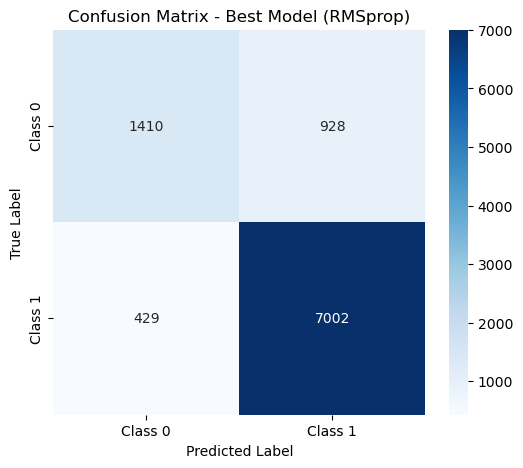

In [103]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(248, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(124, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model with RMSprop optimizer
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.00001),  # RMSprop optimizer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp_rmsprop.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp_rmsprop.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model (RMSprop)")
plt.show()

Epoch 1/200


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2440/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.7463 - loss: 0.5702
Epoch 1: val_loss improved from inf to 0.40422, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.7463 - loss: 0.5701 - val_accuracy: 0.8112 - val_loss: 0.4042
Epoch 2/200
2308/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.8224 - loss: 0.3904
Epoch 2: val_loss improved from 0.40422 to 0.36432, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.8227 - loss: 0.3899 - val_accuracy: 0.8379 - val_loss: 0.3643
Epoch 3/200
2441/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.8380 - loss: 0.3607
Epoch 3: val_loss improved from 0.36432 to 0.35158, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.8380 - loss: 0.3607 - val_accuracy: 0.8403 - val_loss: 0.3516
Epoch 4/200
2386/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8407 - loss: 0.3492
Epoch 4: val_loss improved from 0.35158 to 0.34303, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.8406 - loss: 0.3492 - val_accuracy: 0.8423 - val_loss: 0.3430
Epoch 5/200
2349/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.8438 - loss: 0.3412
Epoch 5: val_loss improved from 0.34303 to 0.33670, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - accuracy: 0.8436 - loss: 0.3412 - val_accuracy: 0.8437 - val_loss: 0.3367
Epoch 6/200
2344/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8457 - loss: 0.3352
Epoch 6: val_loss improved from 0.33670 to 0.33204, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.8456 - loss: 0.3352 - val_accuracy: 0.8459 - val_loss: 0.3320
Epoch 7/200
2408/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8468 - loss: 0.3308
Epoch 7: val_loss improved from 0.33204 to 0.32872, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8467 - loss: 0.3308 - val_accuracy: 0.8474 - val_loss: 0.3287
Epoch 8/200
2383/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8480 - loss: 0.3275
Epoch 8: val_loss improved from 0.32872 to 0.32633, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.8479 - loss: 0.3276 - val_accuracy: 0.8481 - val_loss: 0.3263
Epoch 9/200
2326/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8484 - loss: 0.3252
Epoch 9: val_loss improved from 0.32633 to 0.32462, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.8483 - loss: 0.3253 - val_accuracy: 0.8495 - val_loss: 0.3246
Epoch 10/200
2389/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8494 - loss: 0.3235
Epoch 10: val_loss improved from 0.32462 to 0.32337, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8494 - loss: 0.3236 - val_accuracy: 0.8504 - val_loss: 0.3234
Epoch 11/200
2350/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8498 - loss: 0.3222
Epoch 11: val_loss improved from 0.32337 to 0.32240, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.8497 - loss: 0.3223 - val_accuracy: 0.8514 - val_loss: 0.3224
Epoch 12/200
2387/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8503 - loss: 0.3212
Epoch 12: val_loss improved from 0.32240 to 0.32164, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8503 - loss: 0.3213 - val_accuracy: 0.8529 - val_loss: 0.3216
Epoch 13/200
2367/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8504 - loss: 0.3203
Epoch 13: val_loss improved from 0.32164 to 0.32103, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.8504 - loss: 0.3204 - val_accuracy: 0.8533 - val_loss: 0.3210
Epoch 14/200
2429/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8507 - loss: 0.3197
Epoch 14: val_loss improved from 0.32103 to 0.32048, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - accuracy: 0.8507 - loss: 0.3197 - val_accuracy: 0.8531 - val_loss: 0.3205
Epoch 15/200
2388/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8510 - loss: 0.3190
Epoch 15: val_loss improved from 0.32048 to 0.32003, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8510 - loss: 0.3190 - val_accuracy: 0.8535 - val_loss: 0.3200
Epoch 16/200
2379/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8510 - loss: 0.3184
Epoch 16: val_loss improved from 0.32003 to 0.31962, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.8510 - loss: 0.3185 - val_accuracy: 0.8538 - val_loss: 0.3196
Epoch 17/200
2375/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8516 - loss: 0.3178
Epoch 17: val_loss improved from 0.31962 to 0.31924, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.8516 - loss: 0.3179 - val_accuracy: 0.8538 - val_loss: 0.3192
Epoch 18/200
2357/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.8521 - loss: 0.3173
Epoch 18: val_loss improved from 0.31924 to 0.31889, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.8520 - loss: 0.3174 - val_accuracy: 0.8539 - val_loss: 0.3189
Epoch 19/200
2370/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8521 - loss: 0.3169
Epoch 19: val_loss improved from 0.31889 to 0.31857, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.8521 - loss: 0.3169 - val_accuracy: 0.8538 - val_loss: 0.3186
Epoch 20/200
2382/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8523 - loss: 0.3164
Epoch 20: val_loss improved from 0.31857 to 0.31829, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8523 - loss: 0.3165 - val_accuracy: 0.8540 - val_loss: 0.3183
Epoch 21/200
2385/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8529 - loss: 0.3160
Epoch 21: val_loss improved from 0.31829 to 0.31806, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8529 - loss: 0.3161 - val_accuracy: 0.8545 - val_loss: 0.3181
Epoch 22/200
2388/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8532 - loss: 0.3157
Epoch 22: val_loss improved from 0.31806 to 0.31783, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8531 - loss: 0.3157 - val_accuracy: 0.8542 - val_loss: 0.3178
Epoch 23/200
2385/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8535 - loss: 0.3153
Epoch 23: val_loss improved from 0.31783 to 0.31762, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.8534 - loss: 0.3153 - val_accuracy: 0.8542 - val_loss: 0.3176
Epoch 24/200
2383/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8537 - loss: 0.3149
Epoch 24: val_loss improved from 0.31762 to 0.31742, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8536 - loss: 0.3150 - val_accuracy: 0.8544 - val_loss: 0.3174
Epoch 25/200
2366/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8539 - loss: 0.3145
Epoch 25: val_loss improved from 0.31742 to 0.31720, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - accuracy: 0.8538 - loss: 0.3146 - val_accuracy: 0.8548 - val_loss: 0.3172
Epoch 26/200
2385/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8542 - loss: 0.3142
Epoch 26: val_loss improved from 0.31720 to 0.31698, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.8541 - loss: 0.3143 - val_accuracy: 0.8553 - val_loss: 0.3170
Epoch 27/200
2383/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8543 - loss: 0.3139
Epoch 27: val_loss improved from 0.31698 to 0.31676, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8543 - loss: 0.3140 - val_accuracy: 0.8554 - val_loss: 0.3168
Epoch 28/200
2390/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8546 - loss: 0.3136
Epoch 28: val_loss improved from 0.31676 to 0.31657, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.8546 - loss: 0.3137 - val_accuracy: 0.8558 - val_loss: 0.3166
Epoch 29/200
2410/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8545 - loss: 0.3133
Epoch 29: val_loss improved from 0.31657 to 0.31638, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.8545 - loss: 0.3134 - val_accuracy: 0.8554 - val_loss: 0.3164
Epoch 30/200
2387/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8544 - loss: 0.3130
Epoch 30: val_loss improved from 0.31638 to 0.31620, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8544 - loss: 0.3131 - val_accuracy: 0.8556 - val_loss: 0.3162
Epoch 31/200
2379/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8545 - loss: 0.3128
Epoch 31: val_loss improved from 0.31620 to 0.31603, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.8545 - loss: 0.3128 - val_accuracy: 0.8549 - val_loss: 0.3160
Epoch 32/200
2379/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8549 - loss: 0.3125
Epoch 32: val_loss improved from 0.31603 to 0.31585, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.8548 - loss: 0.3126 - val_accuracy: 0.8552 - val_loss: 0.3158
Epoch 33/200
2385/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8548 - loss: 0.3122
Epoch 33: val_loss improved from 0.31585 to 0.31568, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8547 - loss: 0.3123 - val_accuracy: 0.8552 - val_loss: 0.3157
Epoch 34/200
2380/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8548 - loss: 0.3120
Epoch 34: val_loss improved from 0.31568 to 0.31552, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8547 - loss: 0.3120 - val_accuracy: 0.8553 - val_loss: 0.3155
Epoch 35/200
2403/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8548 - loss: 0.3118
Epoch 35: val_loss improved from 0.31552 to 0.31536, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.8548 - loss: 0.3118 - val_accuracy: 0.8562 - val_loss: 0.3154
Epoch 36/200
2385/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8548 - loss: 0.3115
Epoch 36: val_loss improved from 0.31536 to 0.31520, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8548 - loss: 0.3116 - val_accuracy: 0.8560 - val_loss: 0.3152
Epoch 37/200
2390/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8551 - loss: 0.3113
Epoch 37: val_loss improved from 0.31520 to 0.31507, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8551 - loss: 0.3113 - val_accuracy: 0.8561 - val_loss: 0.3151
Epoch 38/200
2388/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8551 - loss: 0.3110
Epoch 38: val_loss improved from 0.31507 to 0.31496, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8550 - loss: 0.3111 - val_accuracy: 0.8560 - val_loss: 0.3150
Epoch 39/200
2389/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8550 - loss: 0.3108
Epoch 39: val_loss improved from 0.31496 to 0.31485, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.8550 - loss: 0.3109 - val_accuracy: 0.8562 - val_loss: 0.3149
Epoch 40/200
2345/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8550 - loss: 0.3106
Epoch 40: val_loss improved from 0.31485 to 0.31475, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.8549 - loss: 0.3107 - val_accuracy: 0.8564 - val_loss: 0.3148
Epoch 41/200
2387/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8550 - loss: 0.3105
Epoch 41: val_loss improved from 0.31475 to 0.31465, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.8549 - loss: 0.3105 - val_accuracy: 0.8571 - val_loss: 0.3147
Epoch 42/200
2393/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8551 - loss: 0.3103
Epoch 42: val_loss improved from 0.31465 to 0.31455, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.8551 - loss: 0.3103 - val_accuracy: 0.8571 - val_loss: 0.3145
Epoch 43/200
2393/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8552 - loss: 0.3101
Epoch 43: val_loss improved from 0.31455 to 0.31443, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.8552 - loss: 0.3102 - val_accuracy: 0.8572 - val_loss: 0.3144
Epoch 44/200
2396/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8555 - loss: 0.3099
Epoch 44: val_loss improved from 0.31443 to 0.31433, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.8554 - loss: 0.3100 - val_accuracy: 0.8574 - val_loss: 0.3143
Epoch 45/200
2383/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8554 - loss: 0.3098
Epoch 45: val_loss improved from 0.31433 to 0.31425, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8554 - loss: 0.3098 - val_accuracy: 0.8577 - val_loss: 0.3142
Epoch 46/200
2374/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8553 - loss: 0.3096
Epoch 46: val_loss improved from 0.31425 to 0.31416, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.8553 - loss: 0.3097 - val_accuracy: 0.8578 - val_loss: 0.3142
Epoch 47/200
2400/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8554 - loss: 0.3095
Epoch 47: val_loss improved from 0.31416 to 0.31409, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.8553 - loss: 0.3095 - val_accuracy: 0.8577 - val_loss: 0.3141
Epoch 48/200
2385/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8552 - loss: 0.3093
Epoch 48: val_loss improved from 0.31409 to 0.31404, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8552 - loss: 0.3094 - val_accuracy: 0.8576 - val_loss: 0.3140
Epoch 49/200
2378/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8554 - loss: 0.3091
Epoch 49: val_loss improved from 0.31404 to 0.31397, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.8554 - loss: 0.3092 - val_accuracy: 0.8573 - val_loss: 0.3140
Epoch 50/200
2385/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8555 - loss: 0.3090
Epoch 50: val_loss improved from 0.31397 to 0.31394, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8555 - loss: 0.3091 - val_accuracy: 0.8573 - val_loss: 0.3139
Epoch 51/200
2387/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8555 - loss: 0.3088
Epoch 51: val_loss improved from 0.31394 to 0.31390, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8555 - loss: 0.3089 - val_accuracy: 0.8570 - val_loss: 0.3139
Epoch 52/200
2417/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8557 - loss: 0.3087
Epoch 52: val_loss improved from 0.31390 to 0.31385, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.8557 - loss: 0.3088 - val_accuracy: 0.8571 - val_loss: 0.3139
Epoch 53/200
2355/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8562 - loss: 0.3085
Epoch 53: val_loss improved from 0.31385 to 0.31381, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.8562 - loss: 0.3086 - val_accuracy: 0.8568 - val_loss: 0.3138
Epoch 54/200
2360/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.8560 - loss: 0.3084
Epoch 54: val_loss improved from 0.31381 to 0.31376, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.8560 - loss: 0.3085 - val_accuracy: 0.8571 - val_loss: 0.3138
Epoch 55/200
2365/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8561 - loss: 0.3083
Epoch 55: val_loss improved from 0.31376 to 0.31374, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.8561 - loss: 0.3084 - val_accuracy: 0.8571 - val_loss: 0.3137
Epoch 56/200
2344/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8564 - loss: 0.3081
Epoch 56: val_loss improved from 0.31374 to 0.31370, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.8563 - loss: 0.3083 - val_accuracy: 0.8575 - val_loss: 0.3137
Epoch 57/200
2381/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8565 - loss: 0.3081
Epoch 57: val_loss improved from 0.31370 to 0.31368, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8565 - loss: 0.3081 - val_accuracy: 0.8575 - val_loss: 0.3137
Epoch 58/200
2351/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8567 - loss: 0.3079
Epoch 58: val_loss improved from 0.31368 to 0.31368, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - accuracy: 0.8567 - loss: 0.3080 - val_accuracy: 0.8578 - val_loss: 0.3137
Epoch 59/200
2414/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8564 - loss: 0.3079
Epoch 59: val_loss improved from 0.31368 to 0.31368, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.8564 - loss: 0.3079 - val_accuracy: 0.8580 - val_loss: 0.3137
Epoch 60/200
2361/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.8565 - loss: 0.3077
Epoch 60: val_loss improved from 0.31368 to 0.31365, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.8565 - loss: 0.3078 - val_accuracy: 0.8583 - val_loss: 0.3136
Epoch 61/200
2384/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8564 - loss: 0.3076
Epoch 61: val_loss improved from 0.31365 to 0.31360, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8563 - loss: 0.3077 - val_accuracy: 0.8587 - val_loss: 0.3136
Epoch 62/200
2383/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8567 - loss: 0.3075
Epoch 62: val_loss improved from 0.31360 to 0.31357, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8567 - loss: 0.3076 - val_accuracy: 0.8587 - val_loss: 0.3136
Epoch 63/200
2381/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8571 - loss: 0.3074
Epoch 63: val_loss improved from 0.31357 to 0.31354, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.8571 - loss: 0.3075 - val_accuracy: 0.8590 - val_loss: 0.3135
Epoch 64/200
2405/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8572 - loss: 0.3073
Epoch 64: val_loss improved from 0.31354 to 0.31350, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.8572 - loss: 0.3074 - val_accuracy: 0.8591 - val_loss: 0.3135
Epoch 65/200
2365/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8570 - loss: 0.3072
Epoch 65: val_loss improved from 0.31350 to 0.31348, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.8570 - loss: 0.3072 - val_accuracy: 0.8594 - val_loss: 0.3135
Epoch 66/200
2385/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8570 - loss: 0.3071
Epoch 66: val_loss improved from 0.31348 to 0.31344, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8569 - loss: 0.3071 - val_accuracy: 0.8595 - val_loss: 0.3134
Epoch 67/200
2370/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8570 - loss: 0.3070
Epoch 67: val_loss improved from 0.31344 to 0.31340, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.8570 - loss: 0.3070 - val_accuracy: 0.8598 - val_loss: 0.3134
Epoch 68/200
2379/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8574 - loss: 0.3069
Epoch 68: val_loss improved from 0.31340 to 0.31338, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.8573 - loss: 0.3069 - val_accuracy: 0.8597 - val_loss: 0.3134
Epoch 69/200
2385/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.8574 - loss: 0.3068
Epoch 69: val_loss improved from 0.31338 to 0.31338, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - accuracy: 0.8574 - loss: 0.3069 - val_accuracy: 0.8599 - val_loss: 0.3134
Epoch 70/200
2358/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8573 - loss: 0.3067
Epoch 70: val_loss improved from 0.31338 to 0.31335, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.8573 - loss: 0.3068 - val_accuracy: 0.8599 - val_loss: 0.3134
Epoch 71/200
2372/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8573 - loss: 0.3066
Epoch 71: val_loss improved from 0.31335 to 0.31335, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.8573 - loss: 0.3067 - val_accuracy: 0.8600 - val_loss: 0.3133
Epoch 72/200
2401/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8576 - loss: 0.3066
Epoch 72: val_loss improved from 0.31335 to 0.31333, saving model to best_mlp_rmsprop.h5


2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.8576 - loss: 0.3066 - val_accuracy: 0.8600 - val_loss: 0.3133
Epoch 73/200
2386/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8575 - loss: 0.3065
Epoch 73: val_loss did not improve from 0.31333
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.8575 - loss: 0.3065 - val_accuracy: 0.8602 - val_loss: 0.3133
Epoch 74/200
2369/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8577 - loss: 0.3063
Epoch 74: val_loss did not improve from 0.31333
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8577 - loss: 0.3064 - val_accuracy: 0.8600 - val_loss: 0.3133
Epoch 75/200
2383/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8576 - loss: 0.3063
Epoch 75: val_loss did not improve from 0.31333
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.8576 - loss: 0.3063 - val_accuracy: 0.8598 - val_loss: 0.3134
Epoch 76/200
2380/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8578 - loss: 0.3062
Epoc

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
Accuracy: 0.8600
F1 Score: 0.9112
Precision: 0.8798
Recall: 0.9450

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.59      0.67      2338
         1.0       0.88      0.94      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



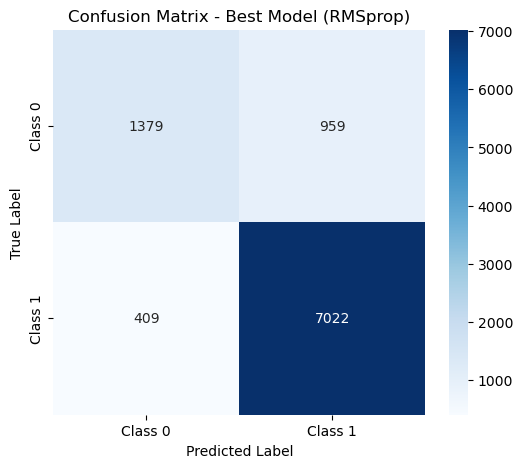

In [105]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(248, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(124, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model with RMSprop optimizer
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.00001),  # RMSprop optimizer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp_rmsprop.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp_rmsprop.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model (RMSprop)")
plt.show()

## Choosing the Best

In [136]:
import re
import pandas as pd
import json

# Load the current Jupyter Notebook as a JSON file
notebook_filename = "./MSIN0097.ipynb"  # Change this to your actual notebook filename
with open(notebook_filename, "r", encoding="utf-8") as file:
    notebook_content = json.load(file)

# Define regex pattern to extract Accuracy, F1 Score, Precision, and Recall values
metrics_pattern = re.compile(
    r"Accuracy:\s*([\d\.]+)|F1 Score:\s*([\d\.]+)|Precision:\s*([\d\.]+)|Recall:\s*([\d\.]+)", re.MULTILINE
)

# Storage for extracted metrics
results = []

# Iterate over all notebook cells
for cell_idx, cell in enumerate(notebook_content["cells"]):
    if cell["cell_type"] == "code":  # Only process code cells
        cell_output = ""
        
        # Extract all text from cell outputs
        for output in cell.get("outputs", []):
            if "text" in output:
                cell_output += "".join(output["text"])
            elif "data" in output and "text/plain" in output["data"]:
                cell_output += "".join(output["data"]["text/plain"])
        
        # Extract metrics using regex
        matches = metrics_pattern.findall(cell_output)
        accuracy, f1, precision, recall = None, None, None, None

        for match in matches:
            if match[0]: accuracy = float(match[0])
            if match[1]: f1 = float(match[1])
            if match[2]: precision = float(match[2])
            if match[3]: recall = float(match[3])

        # Store results if all values were found
        if accuracy is not None and f1 is not None and precision is not None and recall is not None:
            results.append({
                "Cell Index": cell_idx,
                "Accuracy": accuracy,
                "F1 Score": f1,
                "Precision": precision,
                "Recall": recall
            })

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Identify the best model for each metric
best_accuracy_model = df_results.loc[df_results["Accuracy"].idxmax()]
best_f1_model = df_results.loc[df_results["F1 Score"].idxmax()]
best_precision_model = df_results.loc[df_results["Precision"].idxmax()]
best_recall_model = df_results.loc[df_results["Recall"].idxmax()]

# Print best models for each metric
print("\n🏆 Best Models Based on Metrics:")
print(f"Best Accuracy Model (Cell {best_accuracy_model['Cell Index']}): Accuracy = {best_accuracy_model['Accuracy']:.4f}")
print(f"Best F1 Score Model (Cell {best_f1_model['Cell Index']}): F1 Score = {best_f1_model['F1 Score']:.4f}")
print(f"Best Precision Model (Cell {best_precision_model['Cell Index']}): Precision = {best_precision_model['Precision']:.4f}")
print(f"Best Recall Model (Cell {best_recall_model['Cell Index']}): Recall = {best_recall_model['Recall']:.4f}")


🏆 Best Models Based on Metrics:
Best Accuracy Model (Cell 23.0): Accuracy = 0.8741
Best F1 Score Model (Cell 70.0): F1 Score = 0.9193
Best Precision Model (Cell 23.0): Precision = 0.8976
Best Recall Model (Cell 43.0): Recall = 0.9586


In [162]:
import json
import re
import pandas as pd

def extract_metrics_from_notebook(notebook_path):
    # Load the Jupyter Notebook
    with open(notebook_path, 'r', encoding='utf-8') as f:
        notebook = json.load(f)
    
    # Regular expressions to match metric names and values
    metric_patterns = {
        "Accuracy": re.compile(r"Accuracy:\s*([\d.]+)", re.IGNORECASE),
        "F1 Score": re.compile(r"F1\s*Score:\s*([\d.]+)", re.IGNORECASE),
        "Precision": re.compile(r"Precision:\s*([\d.]+)", re.IGNORECASE),
        "Recall": re.compile(r"Recall:\s*([\d.]+)", re.IGNORECASE),
    }

    extracted_data = []

    # Scan through all notebook cells
    for cell in notebook.get("cells", []):
        if cell.get("cell_type") == "code":
            # Extract code output
            outputs = cell.get("outputs", [])
            for output in outputs:
                if "text" in output:
                    text_output = " ".join(output["text"])
                elif "data" in output and "text/plain" in output["data"]:
                    text_output = " ".join(output["data"]["text/plain"])
                else:
                    continue

                # Extract metric values
                row = {metric: None for metric in metric_patterns.keys()}
                for metric, pattern in metric_patterns.items():
                    match = pattern.search(text_output)
                    if match:
                        row[metric] = float(match.group(1))
                
                if any(row.values()):  # Only add if at least one metric is found
                    extracted_data.append(row)

    # Convert extracted data to DataFrame
    df = pd.DataFrame(extracted_data)

    return df

# Example usage
notebook_path = "./MSIN0097.ipynb"  # Replace with actual path
df_metrics = extract_metrics_from_notebook(notebook_path)

# Display the extracted metrics table
df_metrics.dropna(inplace=True)
df_metrics.reset_index(drop=True, inplace=True)

df_metrics

Accuracy  F1 Score  Precision  Recall
0     0.8741    0.9192     0.8976  0.9420
1     0.8552    0.9084     0.8750  0.9446
2     0.8553    0.9087     0.8738  0.9464
3     0.8565    0.9098     0.8718  0.9512
4     0.8551    0.9091     0.8693  0.9526
5     0.8562    0.9100     0.8682  0.9560
6     0.8544    0.9090     0.8670  0.9552
7     0.8551    0.9089     0.8710  0.9502
8     0.8549    0.9094     0.8661  0.9573
9     0.8564    0.9103     0.8668  0.9586
10    0.8551    0.9091     0.8693  0.9526
11    0.8533    0.9084     0.8653  0.9560
12    0.8548    0.9091     0.8680  0.9542
13    0.8564    0.9103     0.8668  0.9586
14    0.8554    0.9095     0.8681  0.9549
15    0.8568    0.9102     0.8700  0.9544
16    0.8578    0.9109     0.8703  0.9555
17    0.8564    0.9103     0.8668  0.9586
18    0.8554    0.9079     0.8804  0.9372
19    0.8600    0.9112     0.8798  0.9450
20    0.8611    0.9117     0.8830  0.9423
21    0.8600    0.9112     0.8798  0.9450
22    0.8736    0.9193     0.8933  0.9468
23    0.8730    0.9191     0.8916  0.9483
24    0.8736    0.9193     0.8933  0.9468
25    0.8736    0.9193     0.8933  0.9468
26    0.8738    0.9192     0.8960  0.9436
27    0.8736    0.9193     0.8933  0.9468
28    0.8686    0.9170     0.8823  0.9545

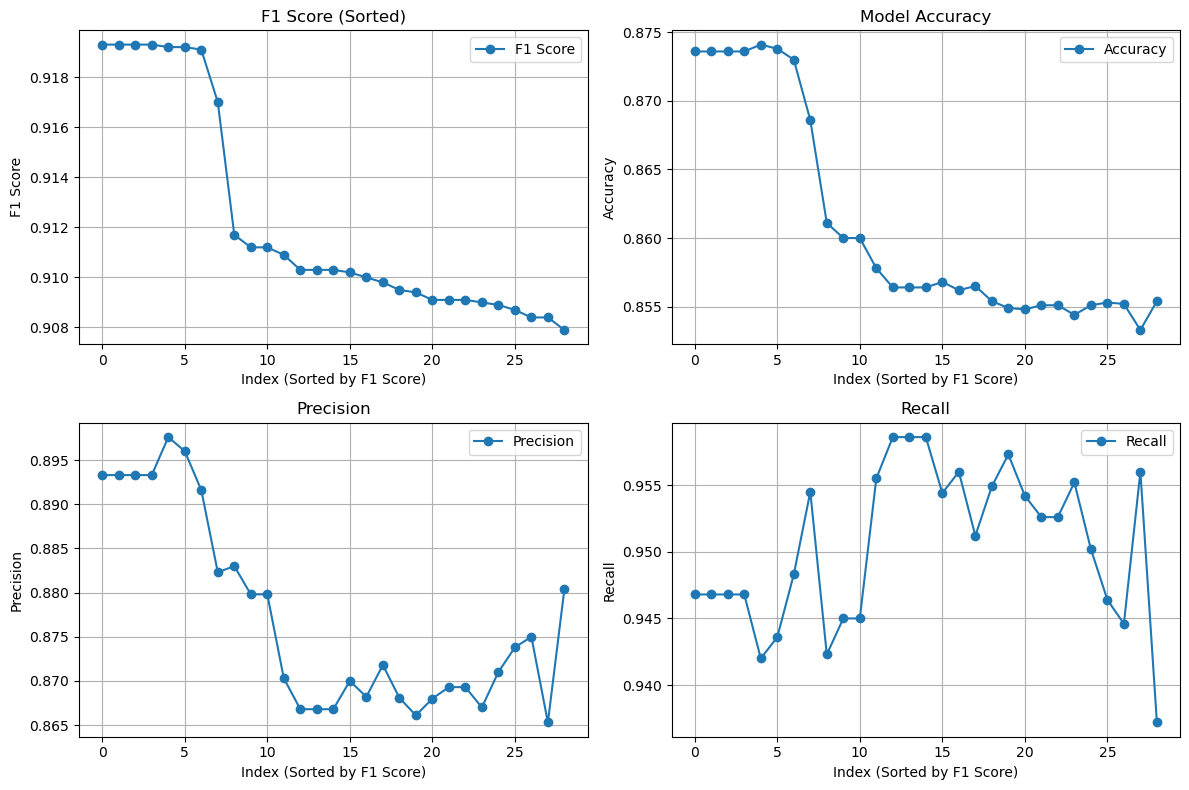

In [168]:
import matplotlib.pyplot as plt

def plot_sorted_metrics(df):
    # Sort DataFrame by F1 Score in descending order
    df_sorted = df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

    # Define metrics and their corresponding titles
    metrics = ["F1 Score", "Accuracy", "Precision", "Recall"]
    titles = ["F1 Score (Sorted)", "Model Accuracy", "Precision", "Recall"]

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid

    for ax, metric, title in zip(axes.flatten(), metrics, titles):
        ax.plot(df_sorted.index, df_sorted[metric], marker='o', linestyle='-', label=metric)
        ax.set_title(title)
        ax.set_xlabel("Index (Sorted by F1 Score)")
        ax.set_ylabel(metric)
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_sorted_metrics(df_metrics)

In [81]:
# pip install lightgbm

🔹 Loading dataset...

📌 Training Base Models with Stratified K-Fold...

🔄 Fold 1/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:33:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step

🔄 Fold 2/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:33:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step

🔄 Fold 3/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:34:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step

🔄 Fold 4/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:34:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step

🔄 Fold 5/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:34:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step

✅ Base Model Training Completed! ⏱ Total Time: 68.66 sec

🔹 Training Final XGBoost and MLP on Full Dataset...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:34:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step

🔹 Training Meta-Model (LightGBM)...
[LightGBM] [Info] Number of positive: 29724, number of negative: 9349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.760730 -> initscore=1.156685
[LightGBM] [Info] Start training from score 1.156685
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

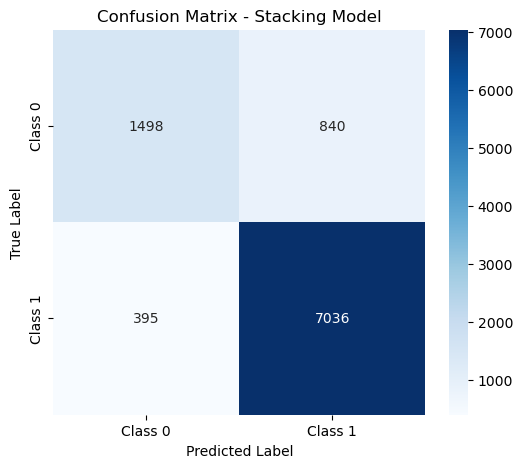


📊 Weighted Averaging Performance:
Accuracy: 0.8730
F1 Score: 0.9191
Precision: 0.8916
Recall: 0.9483

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.63      0.70      2338
         1.0       0.89      0.95      0.92      7431

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



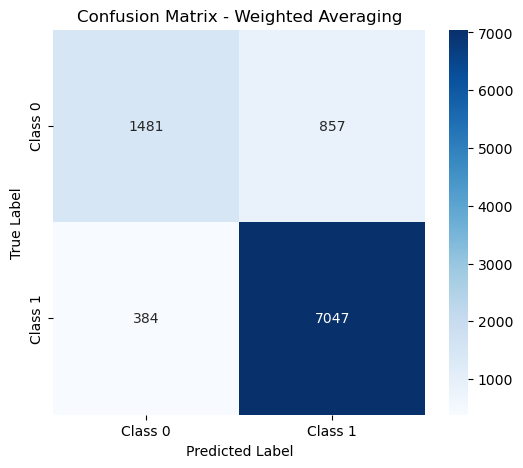


🔹 Selecting Best Model...
✅ Using Stacking Model for Final Prediction


In [83]:
import time
import xgboost as xgb
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Progress bar

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Load data
print("🔹 Loading dataset...")
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize OOF predictions
oof_train = np.zeros((X_train.shape[0], 2))  # Two models' predictions
oof_test = np.zeros((X_test.shape[0], 2))

# Store test predictions separately
xgb_test_preds = np.zeros(X_test.shape[0])
mlp_test_preds = np.zeros(X_test.shape[0])

# ---- 1. STRATIFIED K-FOLD FOR OOF PREDICTIONS ----
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

print("\n📌 Training Base Models with Stratified K-Fold...")
start_time = time.time()

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), 1):
    print(f"\n🔄 Fold {fold}/5...")

    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    # ---- Train XGBoost ----
    print("🚀 Training XGBoost...")
    xgb_model = xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6
    )
    xgb_model.fit(X_tr, y_tr)
    oof_train[val_idx, 0] = xgb_model.predict_proba(X_val)[:, 1]

    # ---- Train MLP (Neural Network) ----
    print("🧠 Training Neural Network (MLP)...")
    mlp_model = keras.Sequential([
        layers.Dense(248, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(124, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    mlp_model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    mlp_model.fit(X_tr, y_tr, epochs=30, batch_size=32, verbose=0, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    oof_train[val_idx, 1] = mlp_model.predict(X_val).flatten()

end_time = time.time()
print(f"\n✅ Base Model Training Completed! ⏱ Total Time: {end_time - start_time:.2f} sec")

# ---- Train Final Base Models on Full Train Set ----
print("\n🔹 Training Final XGBoost and MLP on Full Dataset...")
xgb_model.fit(X_train, y_train)
mlp_model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Store test predictions
xgb_test_preds = xgb_model.predict_proba(X_test)[:, 1]
mlp_test_preds = mlp_model.predict(X_test_scaled).flatten()

# Store in OOF Test
oof_test[:, 0] = xgb_test_preds
oof_test[:, 1] = mlp_test_preds

# ---- 2. TRAIN META-MODEL (LightGBM) ----
print("\n🔹 Training Meta-Model (LightGBM)...")
meta_model = LGBMClassifier(n_estimators=50, learning_rate=0.05, max_depth=3)
meta_model.fit(oof_train, y_train)

# Final Stacking Predictions
y_pred_prob = meta_model.predict_proba(oof_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

# ---- 3. Weighted Averaging (Backup) ----
print("\n🔹 Computing Weighted Averaging Model...")
weighted_pred_prob = 0.7 * xgb_test_preds + 0.3 * mlp_test_preds
weighted_pred = (weighted_pred_prob > 0.5).astype(int)

# ---- 4. EVALUATION FUNCTION ----
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"\n📊 {model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate Stacking Model
evaluate_model(y_test, y_pred, "Stacking Model")

# Evaluate Weighted Averaging Model
evaluate_model(y_test, weighted_pred, "Weighted Averaging")

# ---- 5. CHOOSE THE BEST MODEL ----
stacking_f1 = f1_score(y_test, y_pred)
weighted_f1 = f1_score(y_test, weighted_pred)

print("\n🔹 Selecting Best Model...")
if stacking_f1 > weighted_f1:
    print("✅ Using Stacking Model for Final Prediction")
    final_pred = y_pred
else:
    print("✅ Using Weighted Averaging Model for Final Prediction")
    final_pred = weighted_pred

In [116]:
# Interim Error Analysis


🔹 Running Error Analysis...

📊 Stacking Model Performance:
Accuracy: 0.8736
F1 Score: 0.9193
Precision: 0.8933
Recall: 0.9468

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.64      0.71      2338
         1.0       0.89      0.95      0.92      7431

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



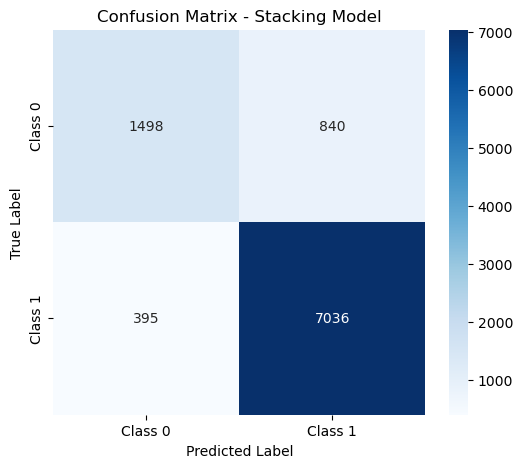

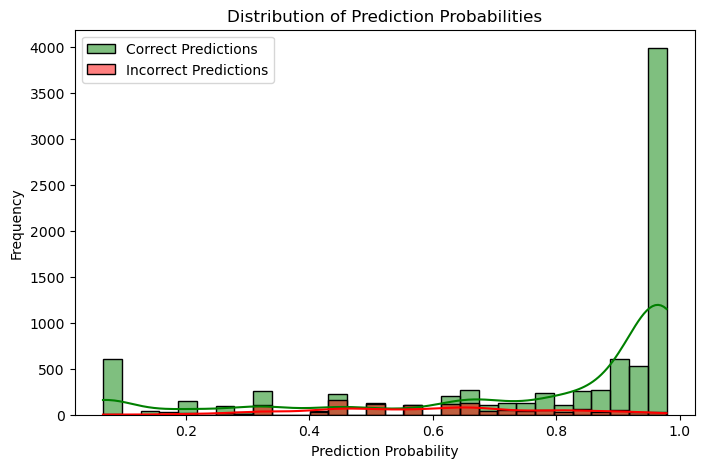

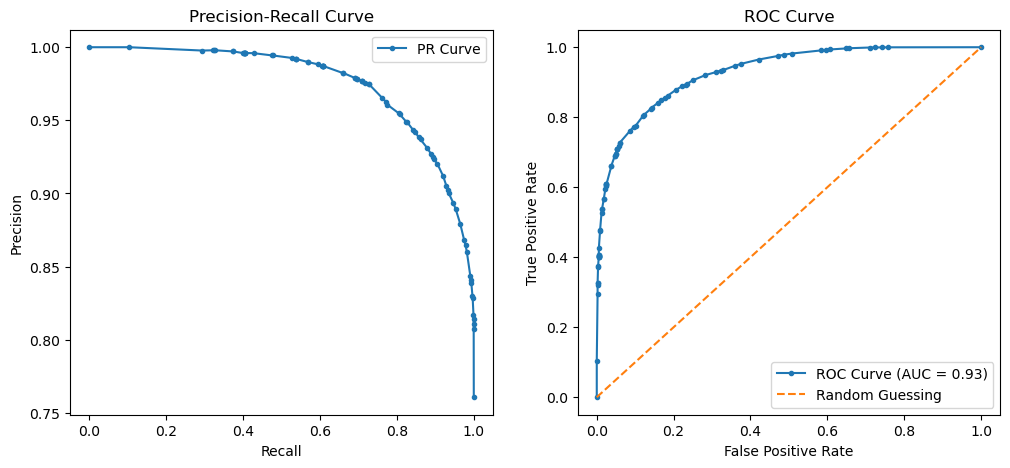


🔹 Optimal Decision Threshold: 0.492


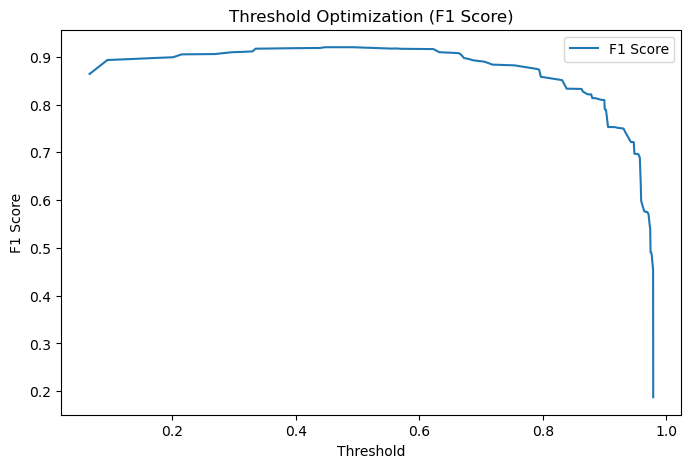


🔹 Running SHAP Analysis (Feature Importance)...


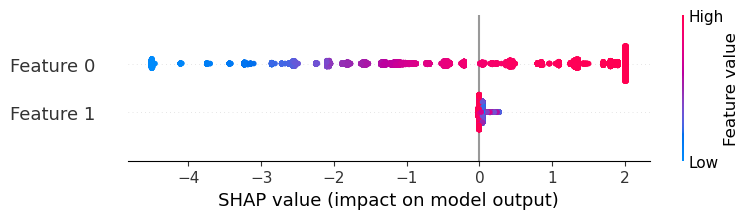

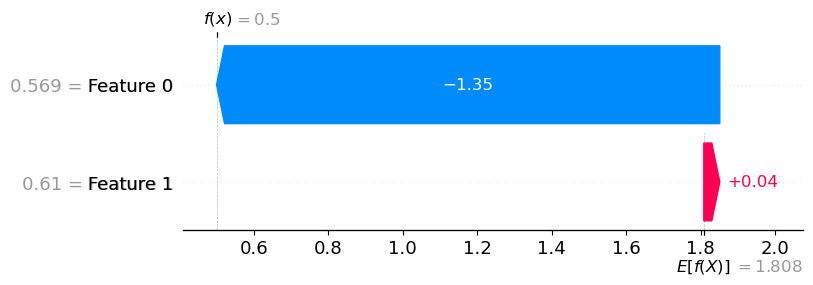

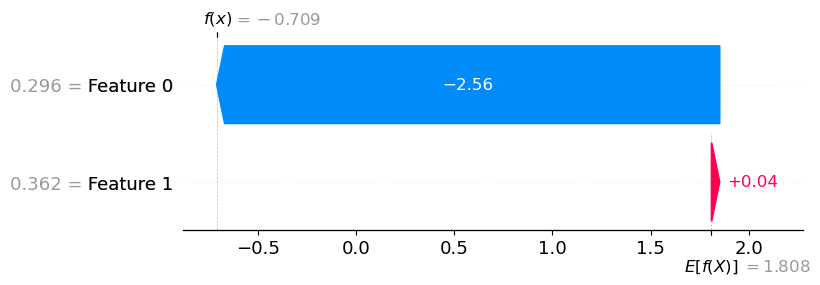

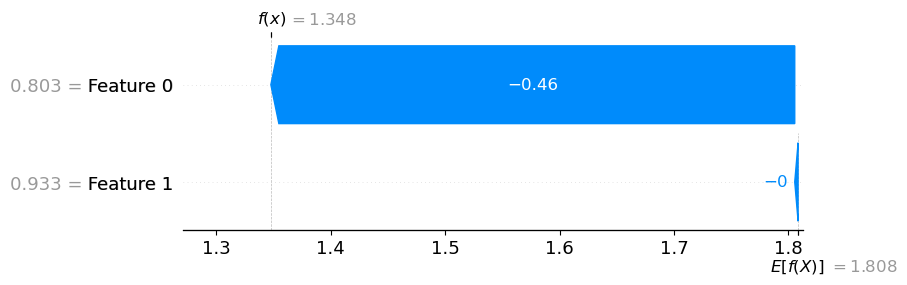

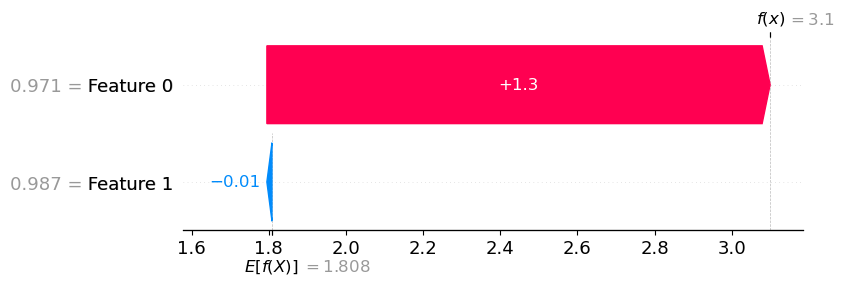

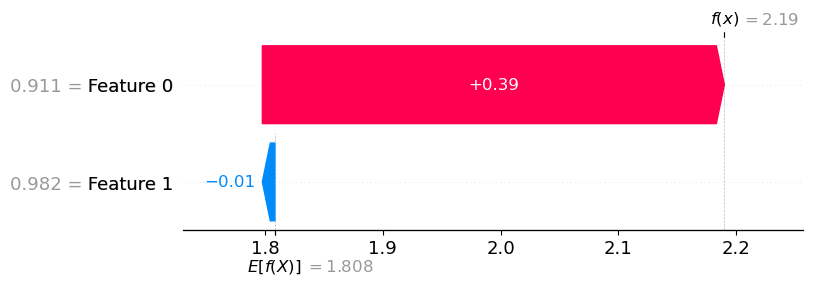


✅ Error Analysis Completed!


In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, 
    f1_score, precision_score, recall_score, precision_recall_curve, 
    roc_curve, auc, log_loss
)
from lightgbm import LGBMClassifier

# ---- 1. CONFUSION MATRIX ----
def plot_confusion_matrix(y_true, y_pred, model_name):
    """Plots confusion matrix with heatmap."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# ---- 2. CLASSIFICATION REPORT ----
def model_performance_metrics(y_true, y_pred, model_name):
    """Prints accuracy, precision, recall, and F1-score."""
    print(f"\n📊 {model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# ---- 3. ERROR DISTRIBUTION ANALYSIS ----
def plot_error_distribution(y_true, y_pred_prob):
    """Plots distribution of prediction probabilities for correct and incorrect predictions."""
    correct_preds = y_pred_prob[y_true == final_pred]
    incorrect_preds = y_pred_prob[y_true != final_pred]

    plt.figure(figsize=(8, 5))
    sns.histplot(correct_preds, bins=30, kde=True, color="green", label="Correct Predictions")
    sns.histplot(incorrect_preds, bins=30, kde=True, color="red", label="Incorrect Predictions")
    plt.xlabel("Prediction Probability")
    plt.ylabel("Frequency")
    plt.title("Distribution of Prediction Probabilities")
    plt.legend()
    plt.show()

# ---- 4. SHAP ANALYSIS (Feature Importance & Explainability) ----
def shap_analysis(model, X_test):
    """Computes and plots SHAP values for feature importance."""
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)

    # Summary Plot
    shap.summary_plot(shap_values, X_test)

    # Waterfall Plot (First 5 instances)
    for i in range(5):
        shap.waterfall_plot(shap_values[i])

# ---- 6. PRECISION-RECALL & ROC CURVE ----
def plot_pr_roc_curve(y_true, y_pred_prob):
    """Plots Precision-Recall and ROC curves."""
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(recalls, precisions, marker='.', label="PR Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    # ROC Curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, marker='.', label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    plt.show()

# ---- 7. THRESHOLD OPTIMIZATION ----
def optimize_threshold(y_true, y_pred_prob):
    """Finds optimal threshold balancing precision and recall."""
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred_prob)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)

    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    print(f"\n🔹 Optimal Decision Threshold: {optimal_threshold:.3f}")
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, f1_scores[:-1], label="F1 Score")
    plt.xlabel("Threshold")
    plt.ylabel("F1 Score")
    plt.title("Threshold Optimization (F1 Score)")
    plt.legend()
    plt.show()

    return optimal_threshold

# ---- 8. FINAL ERROR ANALYSIS EXECUTION ----
print("\n🔹 Running Error Analysis...")

# Evaluate Performance
model_performance_metrics(y_test, final_pred, "Stacking Model")
plot_confusion_matrix(y_test, final_pred, "Stacking Model")

# Error Distribution
plot_error_distribution(y_test, y_pred_prob)

# Precision-Recall & ROC
plot_pr_roc_curve(y_test, y_pred_prob)

# Threshold Optimization
optimal_threshold = optimize_threshold(y_test, y_pred_prob)

# SHAP Analysis (Feature Importance)
print("\n🔹 Running SHAP Analysis (Feature Importance)...")
shap_analysis(meta_model, oof_test)

print("\n✅ Error Analysis Completed!")

## Ensemble (Stacking)

🔹 Loading dataset...

📌 Training Base Models with Stratified K-Fold...

🔄 Fold 1/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step

🔄 Fold 2/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step

🔄 Fold 3/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step

🔄 Fold 4/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step

🔄 Fold 5/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step

✅ Base Model Training Completed! ⏱ Total Time: 69.16 sec

🔹 Training Final XGBoost and MLP on Full Dataset...
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step

🔹 Training Meta-Model (LightGBM)...
[LightGBM] [Info] Number of positive: 29724, number of negative: 9349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.00004

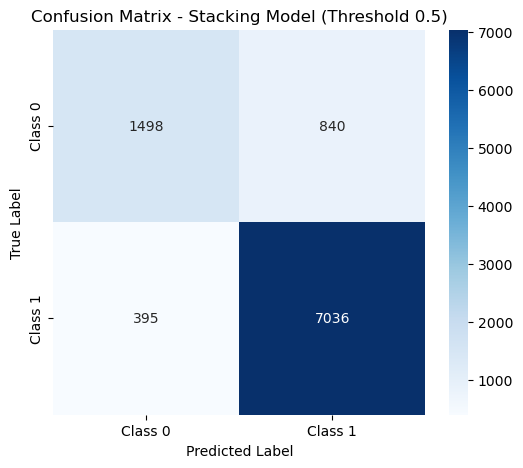

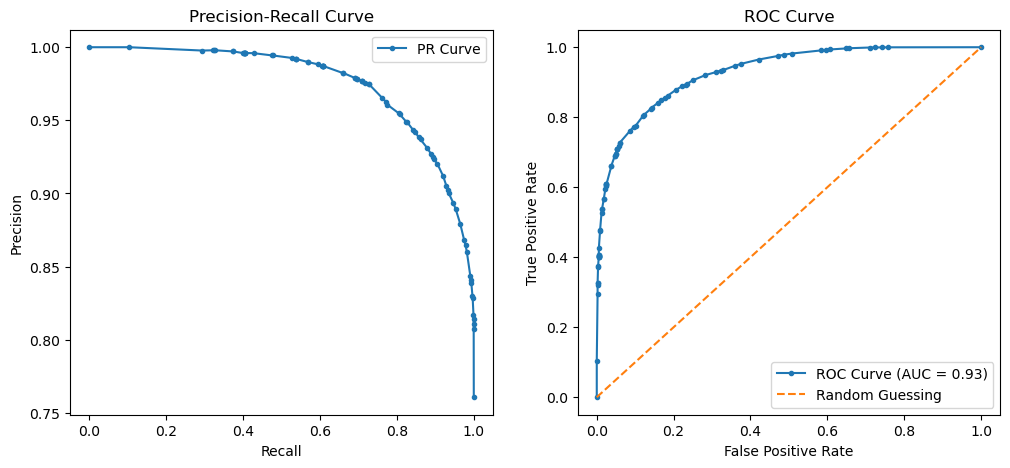


✅ Model retrained with optimized threshold (0.5) for better performance!


In [58]:
import time
import xgboost as xgb
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Progress bar

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Load data
print("🔹 Loading dataset...")
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize OOF predictions
oof_train = np.zeros((X_train.shape[0], 2))  # Two models' predictions
oof_test = np.zeros((X_test.shape[0], 2))

# Store test predictions separately
xgb_test_preds = np.zeros(X_test.shape[0])
mlp_test_preds = np.zeros(X_test.shape[0])

# ---- 1. STRATIFIED K-FOLD FOR OOF PREDICTIONS ----
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

print("\n📌 Training Base Models with Stratified K-Fold...")
start_time = time.time()

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), 1):
    print(f"\n🔄 Fold {fold}/5...")

    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    # ---- Train XGBoost ----
    print("🚀 Training XGBoost...")
    xgb_model = xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6
    )
    xgb_model.fit(X_tr, y_tr)
    oof_train[val_idx, 0] = xgb_model.predict_proba(X_val)[:, 1]

    # ---- Train MLP (Neural Network) ----
    print("🧠 Training Neural Network (MLP)...")
    mlp_model = keras.Sequential([
        layers.Dense(248, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(124, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    mlp_model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    mlp_model.fit(X_tr, y_tr, epochs=30, batch_size=32, verbose=0, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    oof_train[val_idx, 1] = mlp_model.predict(X_val).flatten()

end_time = time.time()
print(f"\n✅ Base Model Training Completed! ⏱ Total Time: {end_time - start_time:.2f} sec")

# ---- Train Final Base Models on Full Train Set ----
print("\n🔹 Training Final XGBoost and MLP on Full Dataset...")
xgb_model.fit(X_train, y_train)
mlp_model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Store test predictions
xgb_test_preds = xgb_model.predict_proba(X_test)[:, 1]
mlp_test_preds = mlp_model.predict(X_test_scaled).flatten()

# Store in OOF Test
oof_test[:, 0] = xgb_test_preds
oof_test[:, 1] = mlp_test_preds

# ---- 2. TRAIN META-MODEL (LightGBM) ----
print("\n🔹 Training Meta-Model (LightGBM)...")
meta_model = LGBMClassifier(n_estimators=50, learning_rate=0.05, max_depth=3)
meta_model.fit(oof_train, y_train)

# Final Stacking Predictions
y_pred_prob = meta_model.predict_proba(oof_test)[:, 1]

# ---- 3. Apply Optimized Threshold ----
optimal_threshold = 0.5
y_pred = (y_pred_prob > optimal_threshold).astype(int)

# ---- 4. Evaluation ----
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"\n📊 {model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate Stacking Model with Optimized Threshold
evaluate_model(y_test, y_pred, "Stacking Model (Threshold 0.5)")

# ---- 5. Precision-Recall and ROC Curve ----
def plot_pr_roc_curve(y_true, y_pred_prob):
    """Plots Precision-Recall and ROC curves."""
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(recalls, precisions, marker='.', label="PR Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    # ROC Curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, marker='.', label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    plt.show()

plot_pr_roc_curve(y_test, y_pred_prob)

print("\n✅ Model retrained with optimized threshold (0.5) for better performance!")

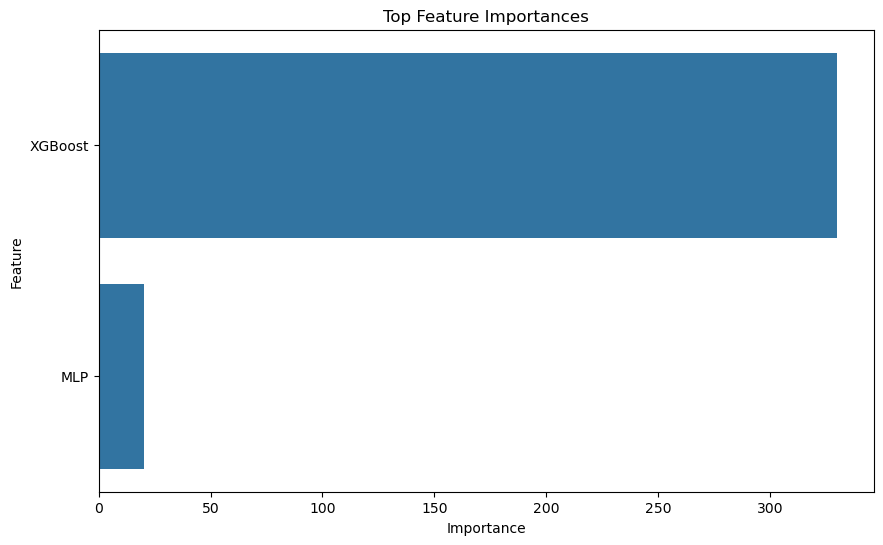

In [62]:
# Plot feature importance
def plot_feature_importance(model, feature_names, top_n=10):
    feature_importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Plot the top N important features
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
    plt.title("Top Feature Importances")
    plt.show()

# Feature importance from LightGBM model
plot_feature_importance(meta_model, ['XGBoost', 'MLP'], top_n=10)

In [64]:
# Analyze misclassifications
def analyze_misclassifications(X, y_true, y_pred, model_name):
    misclassified_idx = np.where(y_true != y_pred)[0]
    misclassified_samples = X[misclassified_idx]
    misclassified_labels = y_true[misclassified_idx]
    
    print(f"\n🔍 Misclassified samples by {model_name}:")
    print(f"Number of misclassifications: {len(misclassified_idx)}")
    print(f"Indices of misclassifications: {misclassified_idx}")
    
    # Display misclassified samples (first few)
    print("\nMisclassified Samples (First 5):")
    print(misclassified_samples[:5])
    print(f"True Labels (First 5): {misclassified_labels[:5]}")
    
    return misclassified_idx

misclassified_idx = analyze_misclassifications(X_test, y_test, y_pred, "Stacking Model")


🔍 Misclassified samples by Stacking Model:
Number of misclassifications: 1235
Indices of misclassifications: [   2    6   12 ... 9762 9765 9767]

Misclassified Samples (First 5):
[[0.60273973 0.625      0.73333333 0.53333333 0.33333333 0.28571429
  0.         1.         1.         0.         0.         0.19387755
  0.95121951]
 [0.38356164 0.5        0.6        0.8        0.66666667 0.07142857
  0.2        0.5        0.         0.         0.         0.39795918
  0.95121951]
 [0.54794521 0.5        0.73333333 0.53333333 0.33333333 1.
  0.         1.         1.         0.         0.         0.39795918
  0.95121951]
 [0.80821918 0.         0.73333333 0.53333333 0.33333333 0.
  0.         1.         1.         0.         0.         0.39795918
  0.04878049]
 [0.63013699 0.5        0.6        0.8        0.33333333 0.07142857
  0.         1.         1.         0.         0.         0.39795918
  0.95121951]]
True Labels (First 5): [0. 0. 0. 0. 1.]


### Exploring with Thresholds

🔹 Loading dataset...

📌 Training Base Models with Stratified K-Fold...

🔄 Fold 1/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step

🔄 Fold 2/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step

🔄 Fold 3/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step

🔄 Fold 4/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step

🔄 Fold 5/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step

✅ Base Model Training Completed! ⏱ Total Time: 69.08 sec

🔹 Training Final XGBoost and MLP on Full Dataset...
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step

🔹 Training Meta-Model (LightGBM)...
[LightGBM] [Info] Number of positive: 29724, number of negative: 9349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.00010

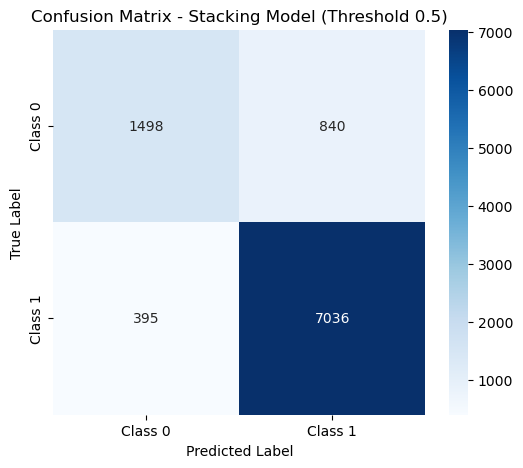

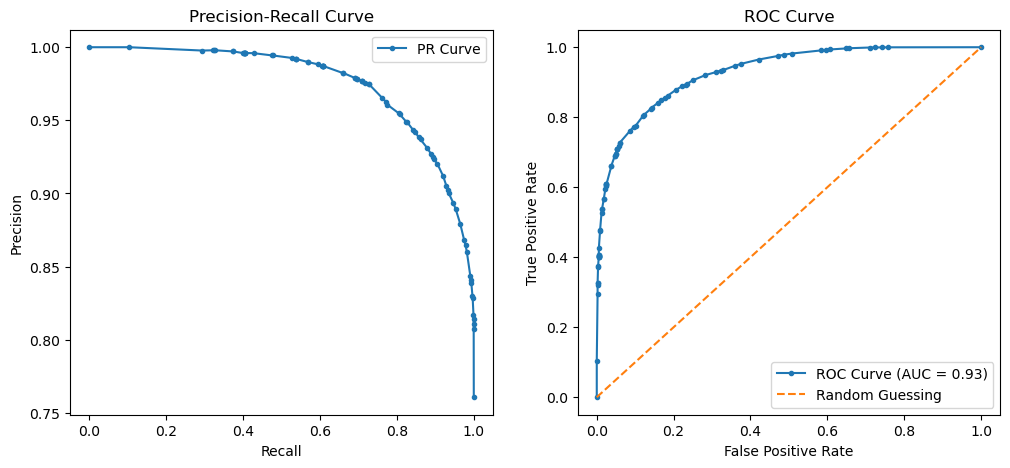


✅ Model retrained with optimized threshold (0.492) for better performance!


In [176]:
import time
import xgboost as xgb
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Progress bar

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Load data
print("🔹 Loading dataset...")
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize OOF predictions
oof_train = np.zeros((X_train.shape[0], 2))  # Two models' predictions
oof_test = np.zeros((X_test.shape[0], 2))

# Store test predictions separately
xgb_test_preds = np.zeros(X_test.shape[0])
mlp_test_preds = np.zeros(X_test.shape[0])

# ---- 1. STRATIFIED K-FOLD FOR OOF PREDICTIONS ----
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

print("\n📌 Training Base Models with Stratified K-Fold...")
start_time = time.time()

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), 1):
    print(f"\n🔄 Fold {fold}/5...")

    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    # ---- Train XGBoost ----
    print("🚀 Training XGBoost...")
    xgb_model = xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6
    )
    xgb_model.fit(X_tr, y_tr)
    oof_train[val_idx, 0] = xgb_model.predict_proba(X_val)[:, 1]

    # ---- Train MLP (Neural Network) ----
    print("🧠 Training Neural Network (MLP)...")
    mlp_model = keras.Sequential([
        layers.Dense(248, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(124, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    mlp_model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    mlp_model.fit(X_tr, y_tr, epochs=30, batch_size=32, verbose=0, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    oof_train[val_idx, 1] = mlp_model.predict(X_val).flatten()

end_time = time.time()
print(f"\n✅ Base Model Training Completed! ⏱ Total Time: {end_time - start_time:.2f} sec")

# ---- Train Final Base Models on Full Train Set ----
print("\n🔹 Training Final XGBoost and MLP on Full Dataset...")
xgb_model.fit(X_train, y_train)
mlp_model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Store test predictions
xgb_test_preds = xgb_model.predict_proba(X_test)[:, 1]
mlp_test_preds = mlp_model.predict(X_test_scaled).flatten()

# Store in OOF Test
oof_test[:, 0] = xgb_test_preds
oof_test[:, 1] = mlp_test_preds

# ---- 2. TRAIN META-MODEL (LightGBM) ----
print("\n🔹 Training Meta-Model (LightGBM)...")
meta_model = LGBMClassifier(n_estimators=50, learning_rate=0.05, max_depth=3)
meta_model.fit(oof_train, y_train)

# Final Stacking Predictions
y_pred_prob = meta_model.predict_proba(oof_test)[:, 1]

# ---- 3. Apply Optimized Threshold ----
optimal_threshold = 0.492
y_pred = (y_pred_prob > optimal_threshold).astype(int)

# ---- 4. Evaluation ----
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"\n📊 {model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate Stacking Model with Optimized Threshold
evaluate_model(y_test, y_pred, "Stacking Model (Threshold 0.5)")

# ---- 5. Precision-Recall and ROC Curve ----
def plot_pr_roc_curve(y_true, y_pred_prob):
    """Plots Precision-Recall and ROC curves."""
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(recalls, precisions, marker='.', label="PR Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    # ROC Curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, marker='.', label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    plt.show()

plot_pr_roc_curve(y_test, y_pred_prob)

print("\n✅ Model retrained with optimized threshold (0.492) for better performance!")

### Meta Learning Rate Change


📌 Training Base Models with Stratified K-Fold...

🔄 Fold 1/5...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:17:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step

🔄 Fold 2/5...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:18:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step

🔄 Fold 3/5...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:18:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step

🔄 Fold 4/5...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:18:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step

🔄 Fold 5/5...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:19:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step

✅ Base Model Training Completed! ⏱ Total Time: 97.54 sec


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:19:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step
[LightGBM] [Info] Number of positive: 29724, number of negative: 9349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.760730 -> initscore=1.156685
[LightGBM] [Info] Start training from score 1.156685
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

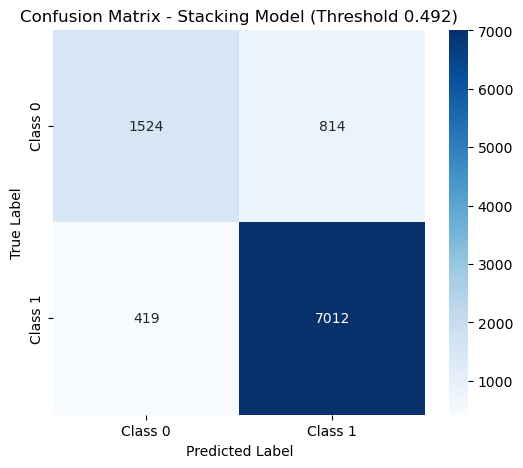

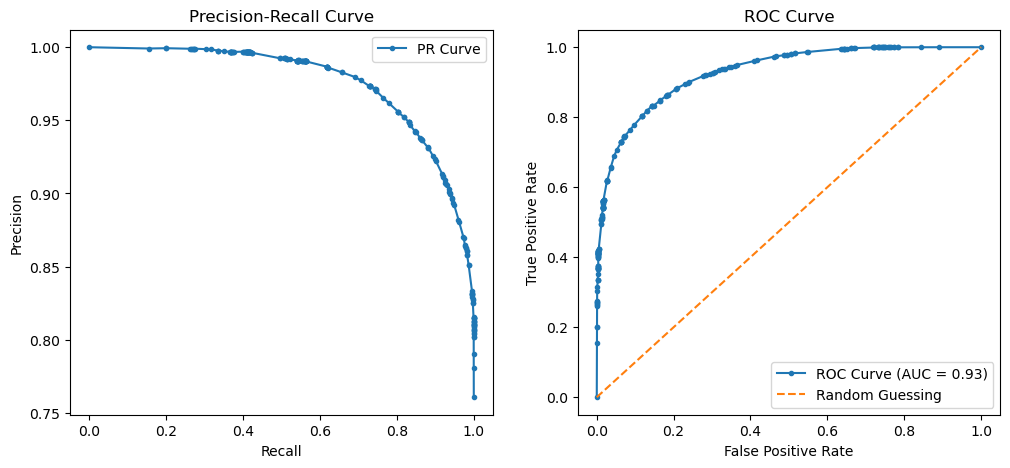


✅ Model retrained with optimized hyperparameters for better performance!


In [93]:
import time
import xgboost as xgb
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Load dataset (Replace 'df_train' and 'df_test' with actual data)
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize OOF predictions
oof_train = np.zeros((X_train.shape[0], 2))
oof_test = np.zeros((X_test.shape[0], 2))

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

print("\n📌 Training Base Models with Stratified K-Fold...")
start_time = time.time()

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), 1):
    print(f"\n🔄 Fold {fold}/5...")
    
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    # Train XGBoost
    xgb_model = xgb.XGBClassifier(
        objective="binary:logistic", eval_metric="logloss", use_label_encoder=False,
        n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=SEED
    )
    xgb_model.fit(X_tr, y_tr)
    oof_train[val_idx, 0] = xgb_model.predict_proba(X_val)[:, 1]

    # Train MLP
    mlp_model = keras.Sequential([
        layers.Dense(248, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(124, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    mlp_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy', metrics=['accuracy']
    )
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    mlp_model.fit(X_tr, y_tr, epochs=50, batch_size=32, verbose=0, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    oof_train[val_idx, 1] = mlp_model.predict(X_val).flatten()

end_time = time.time()
print(f"\n✅ Base Model Training Completed! ⏱ Total Time: {end_time - start_time:.2f} sec")

# Train Final Base Models on Full Dataset
xgb_model.fit(X_train, y_train)
mlp_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Store test predictions
oof_test[:, 0] = xgb_model.predict_proba(X_test)[:, 1]
oof_test[:, 1] = mlp_model.predict(X_test_scaled).flatten()

# Train Meta-Model (LightGBM) with Improved Parameters
meta_model = LGBMClassifier(n_estimators=100, learning_rate=0.03, max_depth=4, num_leaves=20, colsample_bytree=0.9, subsample=0.9, random_state=SEED)
meta_model.fit(oof_train, y_train)

# Final Stacking Predictions
y_pred_prob = meta_model.predict_proba(oof_test)[:, 1]
optimal_threshold = 0.492
y_pred = (y_pred_prob > optimal_threshold).astype(int)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

evaluate_model(y_test, y_pred, "Stacking Model (Threshold 0.492)")

plot_pr_roc_curve(y_test, y_pred_prob)
print("\n✅ Model retrained with optimized hyperparameters for better performance!")

## Error Analysis

Accuracy (XGBoost): 0.8741
F1 Score (XGBoost): 0.9192
Precision (XGBoost): 0.8976
Recall (XGBoost): 0.9420

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.66      0.71      2338
           1       0.90      0.94      0.92      7431

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.87      0.87      9769



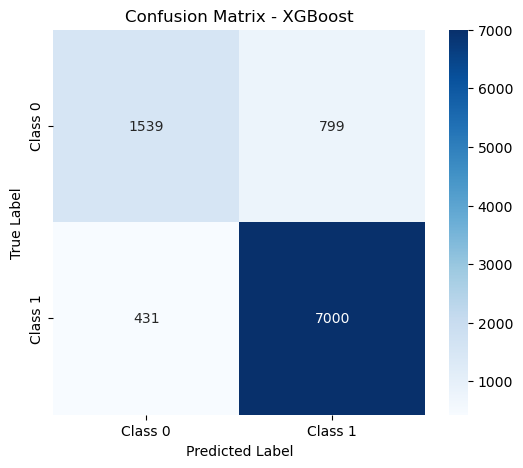


Misclassified Instances for XGBoost:
        age  workclass  education  education-num  marital-status  occupation  \
22586  61.0          5         11            9.0               2           4   
31564  45.0          4          9           13.0               4           1   
40708  57.0          4         11            9.0               2          14   
3297   76.0          0         11            9.0               2           0   
19520  63.0          4          9           13.0               2           1   

       relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
22586             0     4    1           0.0           0.0            20.0   
31564             1     2    0           0.0           0.0            40.0   
40708             0     4    1           0.0           0.0            40.0   
3297              0     4    1           0.0           0.0            40.0   
19520             0     4    1           0.0           0.0            40.0   

       nativ

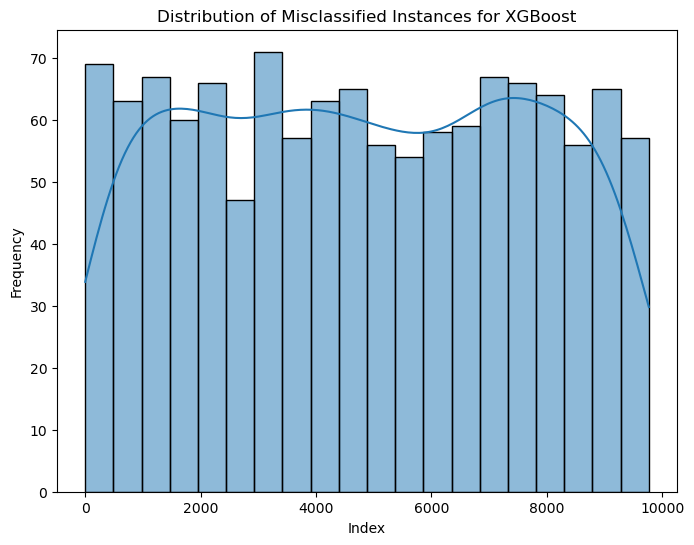


Misclassified Positive Class for XGBoost:
        age  workclass  education  education-num  marital-status  occupation  \
19520  63.0          4          9           13.0               2           1   
14248  39.0          5          9           13.0               2          10   
1711   47.0          1         15           10.0               2           3   
9532   43.0          4         15           10.0               2           1   
33336  27.0          7         14           15.0               2          10   

       relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
19520             0     4    1           0.0           0.0            40.0   
14248             5     4    0           0.0           0.0            40.0   
1711              0     4    1           0.0           0.0            40.0   
9532              5     4    0           0.0           0.0            40.0   
33336             0     4    1           0.0           0.0            60.0   

       

In [214]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train_xg and df_test_xg are already defined
# Splitting into features and target variable
X_train = df_train_xg.drop(columns=['target'])
y_train = df_train_xg['target']
X_test = df_test_xg.drop(columns=['target'])
y_test = df_test_xg['target']

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",  # Change this if it's a multi-class problem
    eval_metric="logloss",
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy (XGBoost): {accuracy:.4f}")
print(f"F1 Score (XGBoost): {f1:.4f}")
print(f"Precision (XGBoost): {precision:.4f}")
print(f"Recall (XGBoost): {recall:.4f}")
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix for XGBoost
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# ---- Error Analysis: Misclassified Instances ----
xgb_misclassified_indices = np.where(y_pred != y_test)[0]  # Get indices of misclassified instances
xgb_misclassified = X_test.iloc[xgb_misclassified_indices]  # Misclassified feature data
xgb_misclassified_actual = y_test.iloc[xgb_misclassified_indices]  # Actual labels of misclassified instances

# Display misclassified instances (first few rows)
print("\nMisclassified Instances for XGBoost:")
xgb_misclassified_data = pd.concat([xgb_misclassified, xgb_misclassified_actual], axis=1)
xgb_misclassified_data.columns = list(X_train.columns) + ["Actual"]
print(xgb_misclassified_data.head())

# Plot distribution of misclassified instances by index
plt.figure(figsize=(8, 6))
sns.histplot(xgb_misclassified_indices, bins=20, kde=True)
plt.title("Distribution of Misclassified Instances for XGBoost")
plt.xlabel("Index")
plt.ylabel("Frequency")
plt.show()

# ---- Misclassified Instances Analysis by Class ----
xgb_misclassified_positive = xgb_misclassified_data[xgb_misclassified_data["Actual"] == 1]
xgb_misclassified_negative = xgb_misclassified_data[xgb_misclassified_data["Actual"] == 0]

# Misclassified positive class
print("\nMisclassified Positive Class for XGBoost:")
print(xgb_misclassified_positive.head())

# Misclassified negative class
print("\nMisclassified Negative Class for XGBoost:")
print(xgb_misclassified_negative.head())

Epoch 1/30
1118/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.8355 - loss: 0.3567
Epoch 1: val_loss improved from inf to 0.33047, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 522us/step - accuracy: 0.8361 - loss: 0.3551 - val_accuracy: 0.8543 - val_loss: 0.3305
Epoch 2/30
1125/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8499 - loss: 0.3224
Epoch 2: val_loss improved from 0.33047 to 0.32873, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.8498 - loss: 0.3226 - val_accuracy: 0.8553 - val_loss: 0.3287
Epoch 3/30
1145/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8523 - loss: 0.3190
Epoch 3: val_loss improved from 0.32873 to 0.32713, saving model to best_mlp_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.8522 - loss: 0.3191 - val_accuracy: 0.8564 - val_loss: 0.3271
Epoch 4/30
1150/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8532 - loss: 0.3171
Epoch 4: val_loss did not improve from 0.32713
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.8531 - loss: 0.3172 - val_accuracy: 0.8566 - val_loss: 0.3308
Epoch 5/30
1152/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8548 - loss: 0.3158
Epoch 5: val_loss did not improve from 0.32713
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.8547 - loss: 0.3160 - val_accuracy: 0.8563 - val_loss: 0.3306
Epoch 6/30
1148/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8553 - loss: 0.3140
Epoch 6: val_loss did not improve from 0.32713
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.8552 - loss: 0.3142 - val_accuracy: 0.8561 - val_loss: 0.3320
Epoch 7/30
1146/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8557 - loss: 0.3132
Epoch 7: val_lo

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
Accuracy (MLP): 0.8564
F1 Score (MLP): 0.9103
Precision (MLP): 0.8668
Recall (MLP): 0.9586

Classification Report (MLP):
              precision    recall  f1-score   support

         0.0       0.80      0.53      0.64      2338
         1.0       0.87      0.96      0.91      7431

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.77      9769
weighted avg       0.85      0.86      0.85      9769



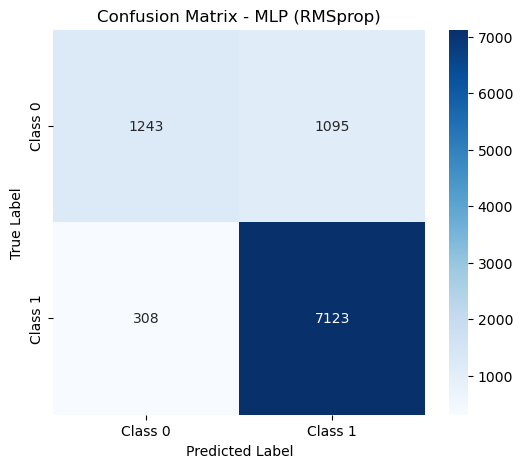


Misclassified Instances for MLP:
        age  workclass  education  education-num  marital-status  occupation  \
0  1.652710   0.770597   0.184733      -0.425510       -0.407864   -0.611561   
1  0.471444   0.088722  -0.333528       1.143421        0.918958   -1.318968   
2 -0.119189  -1.956901   1.221254      -0.033278       -0.407864    0.803254   
3  1.357393   0.088722   0.184733      -0.425510       -0.407864    1.746464   
4  2.760146  -2.638775   0.184733      -0.425510       -0.407864   -1.554771   

   relationship      race       sex  capital-gain  capital-loss  \
0     -0.900605  0.399572  0.705546     -0.248812      -0.21956   
1     -0.276060 -2.064131 -1.417341     -0.248812      -0.21956   
2     -0.900605  0.399572  0.705546     -0.248812      -0.21956   
3     -0.900605  0.399572  0.705546     -0.248812      -0.21956   
4     -0.900605  0.399572  0.705546     -0.248812      -0.21956   

   hours-per-week  native-country  Actual  
0       -1.696925        0.289534     

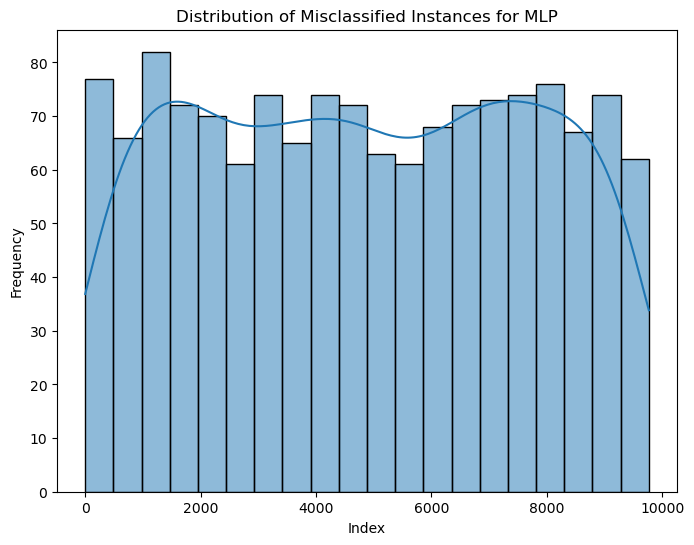


Misclassified Positive Class for MLP:
         age  workclass  education  education-num  marital-status  occupation  \
5   1.800368   0.088722  -0.333528       1.143421       -0.407864   -1.318968   
8   0.028469   0.770597  -0.333528       1.143421       -0.407864    0.803254   
12  0.619102  -1.956901   1.221254      -0.033278       -0.407864   -0.847363   
16 -0.857480   2.134346   0.962124       1.927887       -0.407864    0.803254   
19 -0.414505   0.088722  -0.333528       1.143421       -0.407864    1.746464   

    relationship      race       sex  capital-gain  capital-loss  \
5      -0.900605  0.399572  0.705546     -0.248812      -0.21956   
8       2.222117  0.399572 -1.417341     -0.248812      -0.21956   
12     -0.900605  0.399572  0.705546     -0.248812      -0.21956   
16     -0.900605  0.399572  0.705546     -0.248812      -0.21956   
19     -0.900605  0.399572  0.705546     -0.248812      -0.21956   

    hours-per-week  native-country  Actual  
5        -0.031886  

In [216]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network
model = keras.Sequential([
    layers.Dense(248, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(124, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model with RMSprop optimizer
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),  # RMSprop optimizer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_mlp_rmsprop.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_mlp_rmsprop.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy (MLP): {accuracy:.4f}")
print(f"F1 Score (MLP): {f1:.4f}")
print(f"Precision (MLP): {precision:.4f}")
print(f"Recall (MLP): {recall:.4f}")
print("\nClassification Report (MLP):")
print(classification_report(y_test, y_pred))

# Plot confusion matrix for MLP
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MLP (RMSprop)")
plt.show()

# ---- Error Analysis: Misclassified Instances ----
mlp_misclassified_indices = np.where(y_pred != y_test)[0]  # Get indices of misclassified instances
mlp_misclassified = X_test[mlp_misclassified_indices]  # Misclassified feature data
mlp_misclassified_actual = y_test[mlp_misclassified_indices]  # Actual labels of misclassified instances

# Display misclassified instances (first few rows)
print("\nMisclassified Instances for MLP:")
mlp_misclassified_data = pd.DataFrame(mlp_misclassified, columns=df_train.drop(columns=['target']).columns)  # Include feature names
mlp_misclassified_data['Actual'] = mlp_misclassified_actual
print(mlp_misclassified_data.head())

# Plot distribution of misclassified instances by index
plt.figure(figsize=(8, 6))
sns.histplot(mlp_misclassified_indices, bins=20, kde=True)
plt.title("Distribution of Misclassified Instances for MLP")
plt.xlabel("Index")
plt.ylabel("Frequency")
plt.show()

# ---- Misclassified Instances Analysis by Class ----
mlp_misclassified_positive = mlp_misclassified_data[mlp_misclassified_data["Actual"] == 1]
mlp_misclassified_negative = mlp_misclassified_data[mlp_misclassified_data["Actual"] == 0]

# Misclassified positive class
print("\nMisclassified Positive Class for MLP:")
print(mlp_misclassified_positive.head())

# Misclassified negative class
print("\nMisclassified Negative Class for MLP:")
print(mlp_misclassified_negative.head())

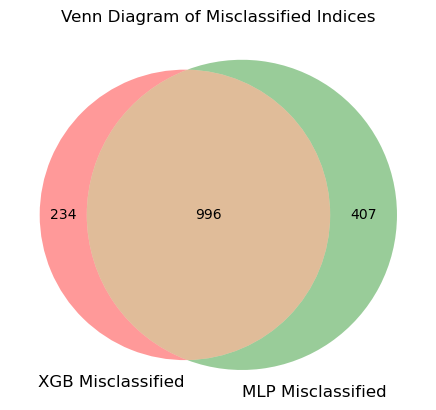

In [228]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Assuming xgb_misclassified_indices and mlp_misclassified_indices are numpy arrays
# Convert the arrays into sets
xgb_set = set(xgb_misclassified_indices)
mlp_set = set(mlp_misclassified_indices)

# Create a Venn diagram
venn2([xgb_set, mlp_set], set_labels=('XGB Misclassified', 'MLP Misclassified'))

# Display the plot
plt.title("Venn Diagram of Misclassified Indices")
plt.show()

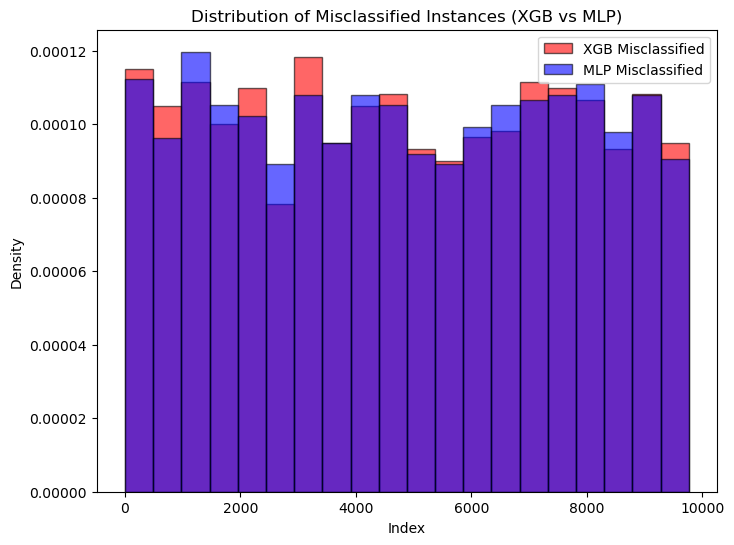

In [238]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming xgb_misclassified_indices and mlp_misclassified_indices are numpy arrays
plt.figure(figsize=(8, 6))

# Plot histograms with bins=20 for XGB misclassified indices
plt.hist(xgb_misclassified_indices, bins=20, alpha=0.6, label='XGB Misclassified', color='red', edgecolor='black', density=True)

# Plot histograms with bins=20 for MLP misclassified indices
plt.hist(mlp_misclassified_indices, bins=20, alpha=0.6, label='MLP Misclassified', color='blue', edgecolor='black', density=True)

# Adding labels and title
plt.title("Distribution of Misclassified Instances (XGB vs MLP)")
plt.xlabel("Index")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

## Exploring Models

### Neural Network with SMOTE

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1858/1858 ━━━━━━━━━━━━━━━━━━━━ 1s 350us/step - accuracy: 0.7864 - loss: 0.4437 - val_accuracy: 0.7878 - val_loss: 0.4029
Epoch 2/30
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 1s 304us/step - accuracy: 0.8291 - loss: 0.3736 - val_accuracy: 0.7934 - val_loss: 0.3952
Epoch 3/30
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 1s 300us/step - accuracy: 0.8301 - loss: 0.3669 - val_accuracy: 0.7947 - val_loss: 0.3940
Epoch 4/30
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 1s 300us/step - accuracy: 0.8321 - loss: 0.3629 - val_accuracy: 0.7938 - val_loss: 0.3939
Epoch 5/30
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 1s 299us/step - accuracy: 0.8332 - loss: 0.3599 - val_accuracy: 0.7928 - val_loss: 0.3943
Epoch 6/30
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 1s 300us/step - accuracy: 0.8350 - loss: 0.3577 - val_accuracy: 0.7949 - val_loss: 0.3928
Epoch 7/30
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 1s 300us/step - accuracy: 0.8361 - loss: 0.3557 - val_accuracy: 0.7945 - val_loss: 0.3933
Epoch 8/30
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 1s 299us/step - accuracy: 0.8372 - loss: 0.35

Epoch 1/30
1792/1858 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.8100 - loss: 0.4075
Epoch 1: val_loss improved from inf to 0.40747, saving model to best_mlp_rmsprop.h5


1858/1858 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.8104 - loss: 0.4068 - val_accuracy: 0.7887 - val_loss: 0.4075
Epoch 2/30
1785/1858 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8293 - loss: 0.3727
Epoch 2: val_loss improved from 0.40747 to 0.39952, saving model to best_mlp_rmsprop.h5


1858/1858 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.8293 - loss: 0.3727 - val_accuracy: 0.7975 - val_loss: 0.3995
Epoch 3/30
1775/1858 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8329 - loss: 0.3665
Epoch 3: val_loss improved from 0.39952 to 0.39934, saving model to best_mlp_rmsprop.h5


1858/1858 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8328 - loss: 0.3665 - val_accuracy: 0.7998 - val_loss: 0.3993
Epoch 4/30
1778/1858 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8348 - loss: 0.3625
Epoch 4: val_loss did not improve from 0.39934
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.8347 - loss: 0.3626 - val_accuracy: 0.8044 - val_loss: 0.4004
Epoch 5/30
1785/1858 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8371 - loss: 0.3594
Epoch 5: val_loss did not improve from 0.39934
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.8371 - loss: 0.3595 - val_accuracy: 0.8068 - val_loss: 0.4002
Epoch 6/30
1777/1858 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8384 - loss: 0.3575
Epoch 6: val_loss did not improve from 0.39934
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.8384 - loss: 0.3576 - val_accuracy: 0.8115 - val_loss: 0.4024
Epoch 7/30
1771/1858 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8387 - loss: 0.3559
Epoch 7: val_lo

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
Ensemble Accuracy: 0.7958
Ensemble F1 Score: 0.8522
Ensemble Precision: 0.9479
Ensemble Recall: 0.7741

Ensemble Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.86      0.67      2338
         1.0       0.95      0.77      0.85      7431

    accuracy                           0.80      9769
   macro avg       0.75      0.82      0.76      9769
weighted avg       0.85      0.80      0.81      9769



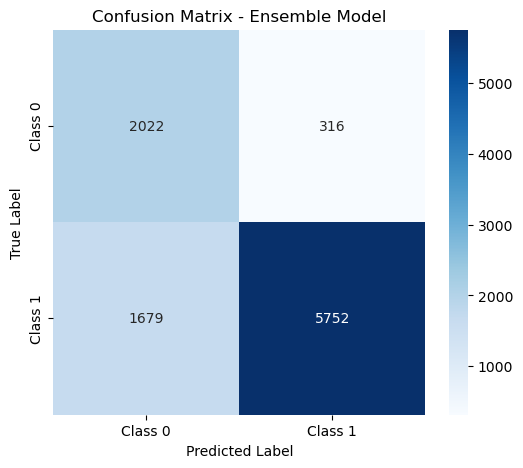

In [91]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train_resampled.drop(columns=['target']).values
y_train = df_train_resampled['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the first model (simple neural network)
model_1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the first model
model_1.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
    metrics=['accuracy']
)

# Train the first model
history_1 = model_1.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Save the first model
model_1.save("neural_network_model.h5")

# Define and train the second model (MLP with RMSprop optimizer)
model_2 = keras.Sequential([
    layers.Dense(248, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(124, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the second model with RMSprop optimizer
model_2.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),  # RMSprop optimizer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model of the second model
checkpoint = ModelCheckpoint("best_mlp_rmsprop.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the second model
history_2 = model_2.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model for the second model
model_2 = keras.models.load_model("best_mlp_rmsprop.h5")

# Make predictions with both models
y_pred_prob_1 = model_1.predict(X_test)
y_pred_prob_2 = model_2.predict(X_test)

# Average the probabilities from both models to form an ensemble
y_pred_prob_ensemble = (y_pred_prob_1 + y_pred_prob_2) / 2

# Convert averaged probabilities to binary class labels (threshold at 0.5)
y_pred_ensemble = (y_pred_prob_ensemble > 0.5).astype(int).flatten()

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble)
precision = precision_score(y_test, y_pred_ensemble)
recall = recall_score(y_test, y_pred_ensemble)
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)

# Print metrics for the ensemble
print(f"Ensemble Accuracy: {accuracy:.4f}")
print(f"Ensemble F1 Score: {f1:.4f}")
print(f"Ensemble Precision: {precision:.4f}")
print(f"Ensemble Recall: {recall:.4f}")
print("\nEnsemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Plot confusion matrix for the ensemble model
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

### Optimised for Recall

🔹 Loading dataset...

📌 Training Base Models with Stratified K-Fold...

🔄 Fold 1/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step

🔄 Fold 2/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step

🔄 Fold 3/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step

🔄 Fold 4/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step

🔄 Fold 5/5...
🚀 Training XGBoost...
🧠 Training Neural Network (MLP)...
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step

✅ Base Model Training Completed! ⏱ Total Time: 69.25 sec

🔹 Training Final XGBoost and MLP on Full Dataset...
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step

🔹 Training Meta-Model (LightGBM)...
[LightGBM] [Info] Number of positive: 29724, number of negative: 9349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.00007

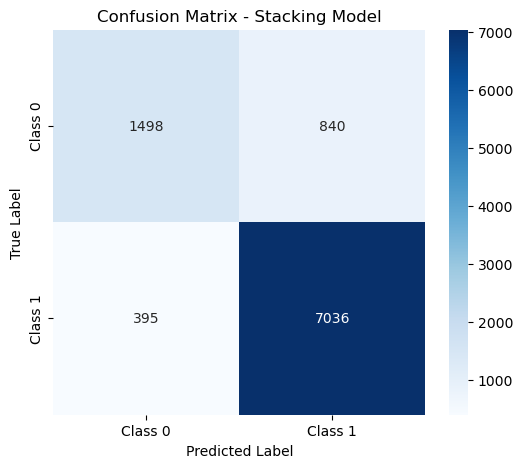


📊 Adjusted Weighted Averaging Performance:
Accuracy: 0.8686
F1 Score: 0.9170
Precision: 0.8823
Recall: 0.9545

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.60      0.68      2338
         1.0       0.88      0.95      0.92      7431

    accuracy                           0.87      9769
   macro avg       0.84      0.77      0.80      9769
weighted avg       0.86      0.87      0.86      9769



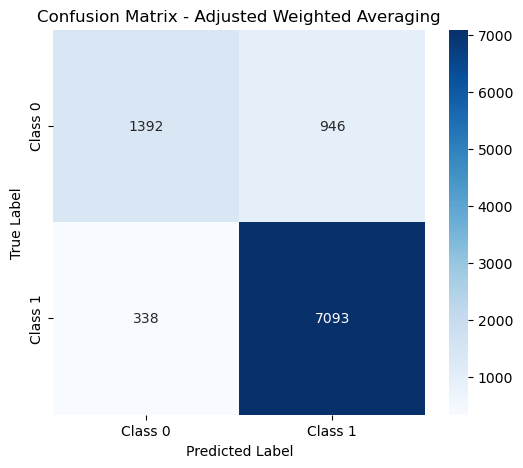


🔹 Selecting Best Model with Adjusted Weights...
✅ Using Stacking Model for Final Prediction


In [113]:
import time
import xgboost as xgb
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Progress bar

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Load data
print("🔹 Loading dataset...")
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize OOF predictions
oof_train = np.zeros((X_train.shape[0], 2))  # Two models' predictions
oof_test = np.zeros((X_test.shape[0], 2))

# Store test predictions separately
xgb_test_preds = np.zeros(X_test.shape[0])
mlp_test_preds = np.zeros(X_test.shape[0])

# ---- 1. STRATIFIED K-FOLD FOR OOF PREDICTIONS ----
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

print("\n📌 Training Base Models with Stratified K-Fold...")
start_time = time.time()

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), 1):
    print(f"\n🔄 Fold {fold}/5...")

    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    # ---- Train XGBoost ----
    print("🚀 Training XGBoost...")
    xgb_model = xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6
    )
    xgb_model.fit(X_tr, y_tr)
    oof_train[val_idx, 0] = xgb_model.predict_proba(X_val)[:, 1]

    # ---- Train MLP (Neural Network) ----
    print("🧠 Training Neural Network (MLP)...")
    mlp_model = keras.Sequential([
        layers.Dense(248, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(124, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    mlp_model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    mlp_model.fit(X_tr, y_tr, epochs=30, batch_size=32, verbose=0, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    oof_train[val_idx, 1] = mlp_model.predict(X_val).flatten()

end_time = time.time()
print(f"\n✅ Base Model Training Completed! ⏱ Total Time: {end_time - start_time:.2f} sec")

# ---- Train Final Base Models on Full Train Set ----
print("\n🔹 Training Final XGBoost and MLP on Full Dataset...")
xgb_model.fit(X_train, y_train)
mlp_model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Store test predictions
xgb_test_preds = xgb_model.predict_proba(X_test)[:, 1]
mlp_test_preds = mlp_model.predict(X_test_scaled).flatten()

# Store in OOF Test
oof_test[:, 0] = xgb_test_preds
oof_test[:, 1] = mlp_test_preds

# ---- 2. TRAIN META-MODEL (LightGBM) ----
print("\n🔹 Training Meta-Model (LightGBM)...")
meta_model = LGBMClassifier(n_estimators=50, learning_rate=0.05, max_depth=3)
meta_model.fit(oof_train, y_train)

# Final Stacking Predictions
y_pred_prob = meta_model.predict_proba(oof_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

# ---- 3. Adjusted Weighted Averaging (More Focus on MLP) ----
print("\n🔹 Computing Adjusted Weighted Averaging Model (More Weight to MLP)...")
weighted_pred_prob = 0.4 * xgb_test_preds + 0.6 * mlp_test_preds  # Increased weight for MLP
weighted_pred = (weighted_pred_prob > 0.5).astype(int)

# ---- 4. EVALUATION FUNCTION ----
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"\n📊 {model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate Stacking Model
evaluate_model(y_test, y_pred, "Stacking Model")

# Evaluate Adjusted Weighted Averaging Model
evaluate_model(y_test, weighted_pred, "Adjusted Weighted Averaging")

# ---- 5. CHOOSE THE BEST MODEL ----
stacking_f1 = f1_score(y_test, y_pred)
weighted_f1 = f1_score(y_test, weighted_pred)

print("\n🔹 Selecting Best Model with Adjusted Weights...")
if stacking_f1 > weighted_f1:
    print("✅ Using Stacking Model for Final Prediction")
    final_pred = y_pred
else:
    print("✅ Using Adjusted Weighted Averaging Model for Final Prediction")
    final_pred = weighted_pred

### Convolutional Neural Network

Epoch 1/30
1209/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.8201 - loss: 0.3937
Epoch 1: val_loss improved from inf to 0.38276, saving model to best_cnn_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.8203 - loss: 0.3934 - val_accuracy: 0.8301 - val_loss: 0.3828
Epoch 2/30
1114/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.8412 - loss: 0.3416
Epoch 2: val_loss improved from 0.38276 to 0.36380, saving model to best_cnn_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.8413 - loss: 0.3417 - val_accuracy: 0.8369 - val_loss: 0.3638
Epoch 3/30
1121/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8429 - loss: 0.3358
Epoch 3: val_loss improved from 0.36380 to 0.36007, saving model to best_cnn_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.8430 - loss: 0.3359 - val_accuracy: 0.8372 - val_loss: 0.3601
Epoch 4/30
1125/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.8450 - loss: 0.3333
Epoch 4: val_loss improved from 0.36007 to 0.35626, saving model to best_cnn_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.8450 - loss: 0.3334 - val_accuracy: 0.8408 - val_loss: 0.3563
Epoch 5/30
1116/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.8460 - loss: 0.3315
Epoch 5: val_loss improved from 0.35626 to 0.35413, saving model to best_cnn_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.8461 - loss: 0.3316 - val_accuracy: 0.8407 - val_loss: 0.3541
Epoch 6/30
1117/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.8470 - loss: 0.3302
Epoch 6: val_loss improved from 0.35413 to 0.35151, saving model to best_cnn_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.8470 - loss: 0.3303 - val_accuracy: 0.8438 - val_loss: 0.3515
Epoch 7/30
1115/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.8478 - loss: 0.3294
Epoch 7: val_loss improved from 0.35151 to 0.35120, saving model to best_cnn_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.8478 - loss: 0.3296 - val_accuracy: 0.8435 - val_loss: 0.3512
Epoch 8/30
1121/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8480 - loss: 0.3291
Epoch 8: val_loss did not improve from 0.35120
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.8480 - loss: 0.3293 - val_accuracy: 0.8455 - val_loss: 0.3556
Epoch 9/30
1111/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.8489 - loss: 0.3286
Epoch 9: val_loss did not improve from 0.35120
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.8488 - loss: 0.3288 - val_accuracy: 0.8446 - val_loss: 0.3578
Epoch 10/30
1205/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.8488 - loss: 0.3285
Epoch 10: val_loss did not improve from 0.35120
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.8488 - loss: 0.3286 - val_accuracy: 0.8436 - val_loss: 0.3622
Epoch 11/30
1115/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.8488 - loss: 0.3282
Epoch 11: va

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step
Accuracy: 0.8435
F1 Score: 0.9032
Precision: 0.8525
Recall: 0.9604

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.47      0.59      2338
         1.0       0.85      0.96      0.90      7431

    accuracy                           0.84      9769
   macro avg       0.82      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



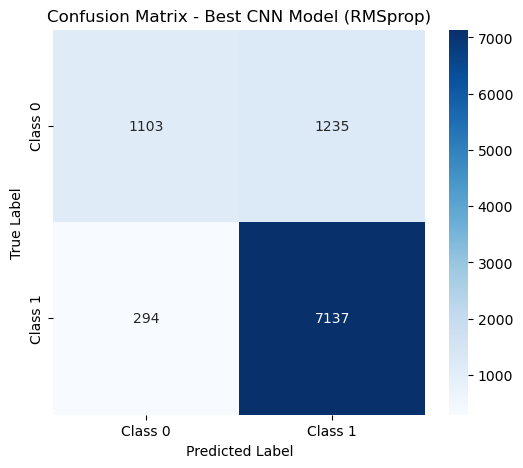

In [178]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Splitting features and target variable
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for CNN (adding a channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define CNN Model
model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),  # Conv layer
    layers.MaxPooling1D(pool_size=2),  # Pooling layer
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),  # Conv layer
    layers.MaxPooling1D(pool_size=2),  # Pooling layer
    layers.Flatten(),  # Flatten before passing to Dense layers
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(32, activation='relu'),  # Fully connected layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model with RMSprop optimizer
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_cnn_rmsprop.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
model = keras.models.load_model("best_cnn_rmsprop.h5")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best CNN Model (RMSprop)")
plt.show()

Epoch 1/30
1217/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.8202 - loss: 0.3935
Epoch 1: val_loss improved from inf to 0.38276, saving model to best_cnn_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 577us/step - accuracy: 0.8203 - loss: 0.3934 - val_accuracy: 0.8301 - val_loss: 0.3828
Epoch 2/30
1118/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.8412 - loss: 0.3416
Epoch 2: val_loss improved from 0.38276 to 0.36380, saving model to best_cnn_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.8413 - loss: 0.3417 - val_accuracy: 0.8369 - val_loss: 0.3638
Epoch 3/30
1115/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.8429 - loss: 0.3357
Epoch 3: val_loss improved from 0.36380 to 0.36007, saving model to best_cnn_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.8430 - loss: 0.3359 - val_accuracy: 0.8372 - val_loss: 0.3601
Epoch 4/30
1118/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.8450 - loss: 0.3332
Epoch 4: val_loss improved from 0.36007 to 0.35626, saving model to best_cnn_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.8450 - loss: 0.3334 - val_accuracy: 0.8408 - val_loss: 0.3563
Epoch 5/30
1126/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.8460 - loss: 0.3315
Epoch 5: val_loss improved from 0.35626 to 0.35413, saving model to best_cnn_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.8461 - loss: 0.3316 - val_accuracy: 0.8407 - val_loss: 0.3541
Epoch 6/30
1120/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8470 - loss: 0.3302
Epoch 6: val_loss improved from 0.35413 to 0.35151, saving model to best_cnn_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.8470 - loss: 0.3303 - val_accuracy: 0.8438 - val_loss: 0.3515
Epoch 7/30
1121/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8478 - loss: 0.3294
Epoch 7: val_loss improved from 0.35151 to 0.35120, saving model to best_cnn_rmsprop.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.8478 - loss: 0.3296 - val_accuracy: 0.8435 - val_loss: 0.3512
Epoch 8/30
1179/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.8480 - loss: 0.3292
Epoch 8: val_loss did not improve from 0.35120
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - accuracy: 0.8480 - loss: 0.3293 - val_accuracy: 0.8455 - val_loss: 0.3556
Epoch 9/30
1120/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8489 - loss: 0.3286
Epoch 9: val_loss did not improve from 0.35120
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.8488 - loss: 0.3288 - val_accuracy: 0.8446 - val_loss: 0.3578
Epoch 10/30
1200/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.8488 - loss: 0.3285
Epoch 10: val_loss did not improve from 0.35120
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - accuracy: 0.8488 - loss: 0.3286 - val_accuracy: 0.8436 - val_loss: 0.3622
Epoch 11/30
1180/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.8488 - loss: 0.3283
Epoch 11: va

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step
[LightGBM] [Info] Number of positive: 29724, number of negative: 9349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.760730 -> initscore=1.156685
[LightGBM] [Info] Start training from score 1.156685
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

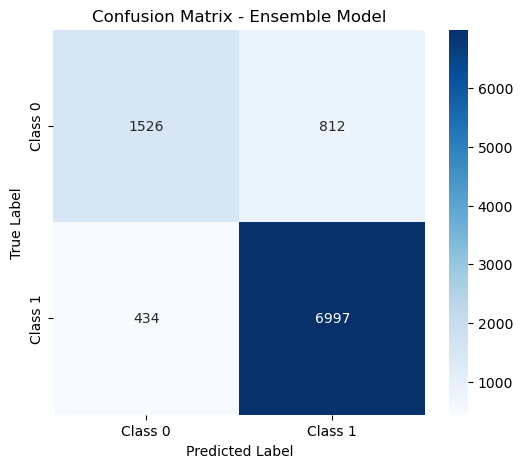

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Assuming df_train and df_test are already defined
# Splitting features and target variable for CNN model
X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values
X_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for CNN (adding a channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define CNN Model
cnn_model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),  # Conv layer
    layers.MaxPooling1D(pool_size=2),  # Pooling layer
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),  # Conv layer
    layers.MaxPooling1D(pool_size=2),  # Pooling layer
    layers.Flatten(),  # Flatten before passing to Dense layers
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(32, activation='relu'),  # Fully connected layer
    layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model with RMSprop optimizer
cnn_model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint("best_cnn_rmsprop.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with ModelCheckpoint
history = cnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

# Load the best model
cnn_model = keras.models.load_model("best_cnn_rmsprop.h5")

# Make predictions from CNN model
y_pred_prob_cnn = cnn_model.predict(X_test)  # CNN prediction probabilities
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype(int).flatten()  # CNN final predictions

# LightGBM Model
# Assuming df_train_xg and df_test_xg are already defined
X_train_lgb = df_train.drop(columns=['target'])
y_train_lgb = df_train['target']
X_test_lgb = df_test.drop(columns=['target'])
y_test_lgb = df_test['target']

# Define the LightGBM classifier
lgb_model = lgb.LGBMClassifier(
    objective="binary",
    metric="binary_logloss",
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

# Train the LightGBM model
lgb_model.fit(X_train_lgb, y_train_lgb)

# Make predictions from LightGBM model
y_pred_lgb = lgb_model.predict(X_test_lgb)  # LightGBM final predictions

# Stack the predictions from both models
X_stack = np.column_stack((y_pred_cnn, y_pred_lgb))

# Define the final classifier (Logistic Regression)
stack_model = LogisticRegression()
stack_model.fit(X_stack, y_test)

# Make final predictions using the stacked model
y_pred_stack = stack_model.predict(X_stack)

# Evaluation metrics for the ensemble model
accuracy_stack = accuracy_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)
precision_stack = precision_score(y_test, y_pred_stack)
recall_stack = recall_score(y_test, y_pred_stack)
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)

# Print ensemble model metrics
print(f"Ensemble Accuracy: {accuracy_stack:.4f}")
print(f"Ensemble F1 Score: {f1_stack:.4f}")
print(f"Ensemble Precision: {precision_stack:.4f}")
print(f"Ensemble Recall: {recall_stack:.4f}")
print("\nEnsemble Classification Report:")
print(classification_report(y_test, y_pred_stack))

# Plot confusion matrix for the stacked model
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_stack, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

### Attempt to Cluster

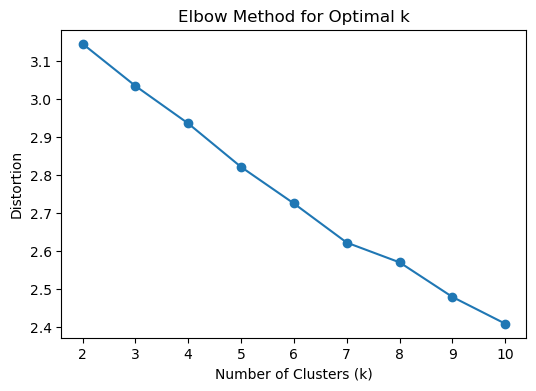

Silhouette Score (K-Means, k=3): 0.1385
DBSCAN Clusters: {-1: 19877, 0: 138, 1: 268, 2: 1245, 3: 258, 4: 8, 5: 475, 6: 142, 7: 1099, 8: 333, 9: 9, 10: 2504, 11: 289, 12: 8, 13: 21, 14: 40, 15: 471, 16: 203, 17: 16, 18: 22, 19: 552, 20: 98, 21: 5, 22: 352, 23: 5, 24: 306, 25: 72, 26: 338, 27: 200, 28: 24, 29: 142, 30: 26, 31: 14, 32: 7, 33: 130, 34: 26, 35: 21, 36: 11, 37: 350, 38: 6, 39: 22, 40: 76, 41: 113, 42: 44, 43: 9, 44: 489, 45: 292, 46: 7, 47: 43, 48: 17, 49: 144, 50: 129, 51: 50, 52: 5, 53: 130, 54: 248, 55: 458, 56: 25, 57: 155, 58: 300, 59: 19, 60: 33, 61: 25, 62: 110, 63: 40, 64: 62, 65: 8, 66: 20, 67: 82, 68: 19, 69: 25, 70: 41, 71: 11, 72: 176, 73: 31, 74: 15, 75: 155, 76: 18, 77: 14, 78: 81, 79: 50, 80: 62, 81: 41, 82: 41, 83: 42, 84: 15, 85: 6, 86: 6, 87: 162, 88: 132, 89: 81, 90: 98, 91: 12, 92: 27, 93: 12, 94: 114, 95: 8, 96: 32, 97: 8, 98: 21, 99: 28, 100: 6, 101: 18, 102: 6, 103: 13, 104: 71, 105: 18, 106: 18, 107: 18, 108: 64, 109: 46, 110: 32, 111: 5, 112: 40, 113

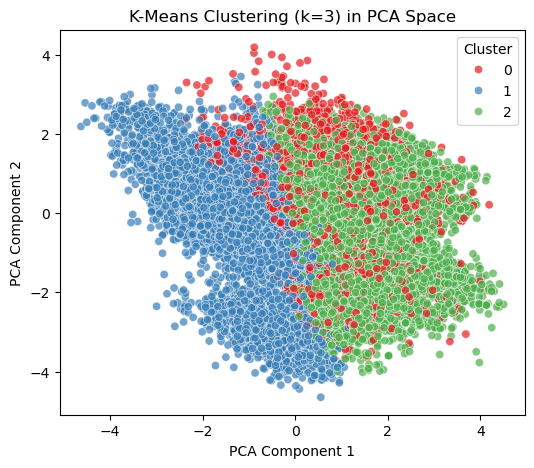

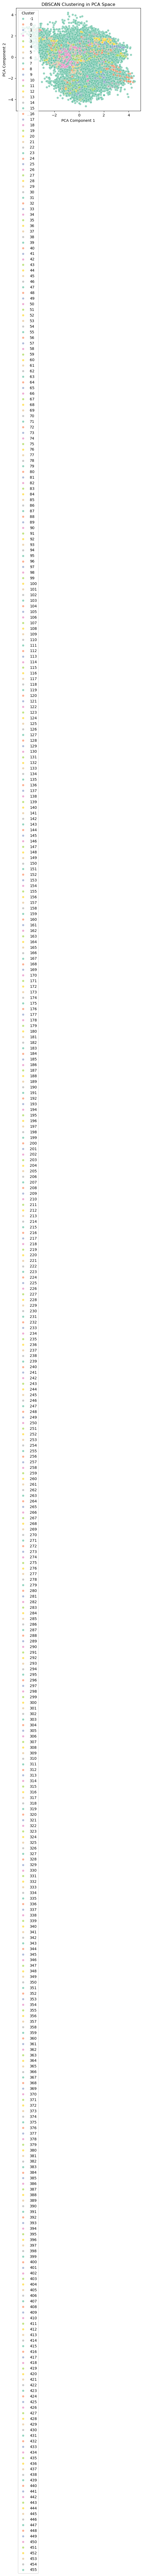

In [193]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reshape back to 2D (Fix for K-Means)
X_train_scaled = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_scaled = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Determine the optimal number of clusters (Elbow Method)
distortions = []
K_range = range(2, 11)  # Trying cluster values from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=SEED)
    kmeans.fit(X_train_scaled)
    distortions.append(sum(np.min(cdist(X_train_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_train_scaled.shape[0])

# Plot Elbow Method graph
plt.figure(figsize=(6, 4))
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose optimal k from the elbow plot (assuming k=3 for this example)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=SEED)
kmeans_labels = kmeans.fit_predict(X_train_scaled)

# Silhouette Score
sil_score = silhouette_score(X_train_scaled, kmeans_labels)
print(f"Silhouette Score (K-Means, k={optimal_k}): {sil_score:.4f}")

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples for better clustering
dbscan_labels = dbscan.fit_predict(X_train_scaled)

# Count unique clusters
unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
print(f"DBSCAN Clusters: {dict(zip(unique_labels, counts))}")

# Visualising K-Means Clusters using PCA
pca = PCA(n_components=2)  # Reduce dimensions to 2D
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set1', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"K-Means Clustering (k={optimal_k}) in PCA Space")
plt.legend(title="Cluster")
plt.show()

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='Set2', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering in PCA Space")
plt.legend(title="Cluster")
plt.show()